In [1]:
import os
import optuna
import numpy as np
import pandas as pd
import warnings
# from three_class.three_class_nested_cv import NestedCVOptimizer
from three_class_nested_cv import NestedCVOptimizer

warnings.filterwarnings('ignore')

/home/edumaba/Public/MPhil_Thesis/Code/wear_uropatch/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def nested_cv(X, y, groups, exp_name):
    """
    Run nested cross-validation with comprehensive results.
    Returns a DataFrame with all metrics, fold results, and summary statistics.
    """
    # Initialize and run optimizer
    optimizer = NestedCVOptimizer(
        X=X,
        y=y,
        groups=groups,
        n_outer_folds=5,
        n_inner_folds=3,
        n_trials=50,
        random_state=42
    )
    
    print("\nRunning nested cross-validation...")
    summaries = optimizer.run_nested_cv()
    
    print(f"\n📊 RESULTS SUMMARY:")
    if 'best_model' in summaries:
        print(f"Best performing model: {summaries['best_model'].upper()}")
        print(f"Best accuracy: {summaries['best_accuracy']:.4f}")
    else:
        print("Error: Could not determine best model due to processing issues")

    results = optimizer.get_results_dataframe()
    
    optimizer.plot_roc_curves(save_path=f'/home/edumaba/Public/MPhil_Thesis/Code/wear_uropatch/pipeline/nested_cv/results/three_class/plots/roc_curves/{exp_name}_roc_curves.png')
    optimizer.plot_auc_comparison(save_path=f'/home/edumaba/Public/MPhil_Thesis/Code/wear_uropatch/pipeline/nested_cv/results/three_class/plots/auc_comparison/{exp_name}_auc_comparison.png')

    
    return results

In [3]:
files = [
    # 'three_class_pp_1s_no.csv',
    'three_class_pp_1s_0.5.csv',
    # 'three_class_pp_1s_0.8.csv',
    # 'three_class_pp_2s_no.csv',
    # 'three_class_pp_2s_0.5.csv',
    # 'three_class_pp_2s_0.8.csv',
    'three_class_pp_3s_no.csv',
    # 'three_class_pp_3s_0.5.csv',
    # 'three_class_pp_3s_0.8.csv',
    # 'three_class_pp_4s_no.csv',
    # 'three_class_pp_4s_0.5.csv',
    # 'three_class_pp_4s_0.8.csv',
    # 'three_class_pp_5s_no.csv',
    'three_class_pp_5s_0.5.csv',
    # 'three_class_pp_5s_0.8.csv'
]

base_path ='/home/edumaba/Public/MPhil_Thesis/Code/wear_uropatch/pipeline/feature_extracted_data'

1. Loop through all files
2. Perform nested cross validation on each file
3. Store result in this format

![Output format](/home/edumaba/Public/MPhil_Thesis/Code/wear_uropatch/output_format.png)


[I 2025-09-07 15:42:23,099] A new study created in memory with name: no-name-062448be-ac5b-47c0-b9e3-bc7c5318ec4e


Nested cross-validation for 1s_0.5
Detected classes (alphabetical order): ['post-void', 'pre-void', 'void']

Running nested cross-validation...
Starting Nested Cross-Validation with separate optimization for each model...

OUTER FOLD 1/5
Train size: 4035, Test size: 747
Class distribution in test set: [189 130 428]

--- Optimizing RF ---


[I 2025-09-07 15:42:25,296] Trial 0 finished with value: 0.4899785337656586 and parameters: {'n_estimators': 218, 'max_depth': 20, 'min_samples_split': 15, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 0 with value: 0.4899785337656586.
[I 2025-09-07 15:42:27,744] Trial 1 finished with value: 0.5110037350061064 and parameters: {'n_estimators': 369, 'max_depth': 3, 'min_samples_split': 20, 'min_samples_leaf': 9, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 1 with value: 0.5110037350061064.
[I 2025-09-07 15:42:49,233] Trial 2 finished with value: 0.4881937882584939 and parameters: {'n_estimators': 244, 'max_depth': 8, 'min_samples_split': 13, 'min_samples_leaf': 2, 'max_features': None, 'bootstrap': True}. Best is trial 1 with value: 0.5110037350061064.
[I 2025-09-07 15:43:17,522] Trial 3 finished with value: 0.4854186656813979 and parameters: {'n_estimators': 281, 'max_depth': 13, 'min_samples_split': 2, 'min_samples_leaf': 7, 'max_feature

Best rf params: {'n_estimators': 227, 'max_depth': 4, 'min_samples_split': 12, 'min_samples_leaf': 5, 'max_features': 'log2', 'bootstrap': True}
Best rf CV score: 0.5164


[I 2025-09-07 15:47:25,599] A new study created in memory with name: no-name-6e5ce60c-10d9-4f90-9a8d-d9ba3dc51cff


rf test accuracy: 0.6372
rf macro AUC: 0.7514
rf micro AUC: 0.8050
rf post-void - Recall: 0.4550, AUC: 0.6607
rf pre-void - Recall: 0.0385, AUC: 0.8088
rf void - Recall: 0.8995, AUC: 0.7847

--- Optimizing XGB ---


[I 2025-09-07 15:47:38,502] Trial 0 finished with value: 0.471974137495575 and parameters: {'n_estimators': 218, 'max_depth': 12, 'learning_rate': 0.1205712628744377, 'subsample': 0.8394633936788146, 'colsample_bytree': 0.6624074561769746, 'min_child_weight': 2, 'gamma': 0.2904180608409973, 'reg_alpha': 1.7323522915498704, 'reg_lambda': 1.2022300234864176}. Best is trial 0 with value: 0.471974137495575.
[I 2025-09-07 15:47:41,797] Trial 1 finished with value: 0.4657737141043395 and parameters: {'n_estimators': 369, 'max_depth': 3, 'learning_rate': 0.2708160864249968, 'subsample': 0.9329770563201687, 'colsample_bytree': 0.6849356442713105, 'min_child_weight': 2, 'gamma': 0.9170225492671691, 'reg_alpha': 0.6084844859190754, 'reg_lambda': 1.0495128632644757}. Best is trial 0 with value: 0.471974137495575.
[I 2025-09-07 15:47:45,704] Trial 2 finished with value: 0.47178496445828794 and parameters: {'n_estimators': 244, 'max_depth': 5, 'learning_rate': 0.08012737503998542, 'subsample': 0.65

Best xgb params: {'n_estimators': 320, 'max_depth': 3, 'learning_rate': 0.03246872895057442, 'subsample': 0.7675443347893829, 'colsample_bytree': 0.6580756667938735, 'min_child_weight': 5, 'gamma': 4.759573510560103, 'reg_alpha': 1.0939820118724268, 'reg_lambda': 1.5123441363729635}
Best xgb CV score: 0.5008


[I 2025-09-07 15:56:28,712] A new study created in memory with name: no-name-49f8538f-d0aa-40b9-8d77-57b5b85bb0fe
[I 2025-09-07 15:56:28,803] Trial 0 finished with value: 0.43588048475665886 and parameters: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 13, 'min_samples_leaf': 2, 'max_features': None, 'splitter': 'random'}. Best is trial 0 with value: 0.43588048475665886.


xgb test accuracy: 0.6573
xgb macro AUC: 0.7534
xgb micro AUC: 0.8084
xgb post-void - Recall: 0.5079, AUC: 0.6843
xgb pre-void - Recall: 0.2846, AUC: 0.7944
xgb void - Recall: 0.8364, AUC: 0.7816

--- Optimizing DT ---


[I 2025-09-07 15:56:30,353] Trial 1 finished with value: 0.3981415073890308 and parameters: {'criterion': 'entropy', 'max_depth': 17, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': None, 'splitter': 'best'}. Best is trial 0 with value: 0.43588048475665886.
[I 2025-09-07 15:56:30,434] Trial 2 finished with value: 0.43570037207703355 and parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 0 with value: 0.43588048475665886.
[I 2025-09-07 15:56:30,478] Trial 3 finished with value: 0.46802890052176244 and parameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 20, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 3 with value: 0.46802890052176244.
[I 2025-09-07 15:56:30,513] Trial 4 finished with value: 0.45374487892950427 and parameters: {'criterion': 'entropy', 'max_depth': 1, 'min_samples_split': 19, 'min_samples_leaf': 3,

Best dt params: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'splitter': 'random'}
Best dt CV score: 0.4896
dt test accuracy: 0.6292
dt macro AUC: 0.7113
dt micro AUC: 0.7751
dt post-void - Recall: 0.3704, AUC: 0.6542
dt pre-void - Recall: 0.1615, AUC: 0.7186
dt void - Recall: 0.8855, AUC: 0.7612

OUTER FOLD 2/5
Train size: 3986, Test size: 796
Class distribution in test set: [243 228 325]

--- Optimizing RF ---


[I 2025-09-07 15:56:36,629] Trial 0 finished with value: 0.5423916376625102 and parameters: {'n_estimators': 218, 'max_depth': 20, 'min_samples_split': 15, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 0 with value: 0.5423916376625102.
[I 2025-09-07 15:56:39,314] Trial 1 finished with value: 0.5537724313322663 and parameters: {'n_estimators': 369, 'max_depth': 3, 'min_samples_split': 20, 'min_samples_leaf': 9, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 1 with value: 0.5537724313322663.
[I 2025-09-07 15:57:01,134] Trial 2 finished with value: 0.5264901367858338 and parameters: {'n_estimators': 244, 'max_depth': 8, 'min_samples_split': 13, 'min_samples_leaf': 2, 'max_features': None, 'bootstrap': True}. Best is trial 1 with value: 0.5537724313322663.
[I 2025-09-07 15:57:30,386] Trial 3 finished with value: 0.5222993328004718 and parameters: {'n_estimators': 281, 'max_depth': 13, 'min_samples_split': 2, 'min_samples_leaf': 7, 'max_feature

Best rf params: {'n_estimators': 87, 'max_depth': 6, 'min_samples_split': 9, 'min_samples_leaf': 3, 'max_features': 'log2', 'bootstrap': True}
Best rf CV score: 0.5623


[I 2025-09-07 16:01:34,601] A new study created in memory with name: no-name-473398ed-f11a-4627-924b-6bf05e32a87a


rf test accuracy: 0.4133
rf macro AUC: 0.6074
rf micro AUC: 0.6179
rf post-void - Recall: 0.4938, AUC: 0.5897
rf pre-void - Recall: 0.1053, AUC: 0.5852
rf void - Recall: 0.5692, AUC: 0.6473

--- Optimizing XGB ---


[I 2025-09-07 16:01:47,948] Trial 0 finished with value: 0.5263095407944527 and parameters: {'n_estimators': 218, 'max_depth': 12, 'learning_rate': 0.1205712628744377, 'subsample': 0.8394633936788146, 'colsample_bytree': 0.6624074561769746, 'min_child_weight': 2, 'gamma': 0.2904180608409973, 'reg_alpha': 1.7323522915498704, 'reg_lambda': 1.2022300234864176}. Best is trial 0 with value: 0.5263095407944527.
[I 2025-09-07 16:01:51,717] Trial 1 finished with value: 0.5200103957809227 and parameters: {'n_estimators': 369, 'max_depth': 3, 'learning_rate': 0.2708160864249968, 'subsample': 0.9329770563201687, 'colsample_bytree': 0.6849356442713105, 'min_child_weight': 2, 'gamma': 0.9170225492671691, 'reg_alpha': 0.6084844859190754, 'reg_lambda': 1.0495128632644757}. Best is trial 0 with value: 0.5263095407944527.
[I 2025-09-07 16:01:56,996] Trial 2 finished with value: 0.5278336922712215 and parameters: {'n_estimators': 244, 'max_depth': 5, 'learning_rate': 0.08012737503998542, 'subsample': 0.

Best xgb params: {'n_estimators': 80, 'max_depth': 3, 'learning_rate': 0.0371560102017086, 'subsample': 0.8540980145712544, 'colsample_bytree': 0.9419687933569367, 'min_child_weight': 4, 'gamma': 3.5044174895600615, 'reg_alpha': 0.38466459712388196, 'reg_lambda': 0.5918823573987183}
Best xgb CV score: 0.5620


[I 2025-09-07 16:07:49,395] A new study created in memory with name: no-name-1e023572-a8a7-44ce-9e7b-b415050656a9
[I 2025-09-07 16:07:49,481] Trial 0 finished with value: 0.4466183471171235 and parameters: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 13, 'min_samples_leaf': 2, 'max_features': None, 'splitter': 'random'}. Best is trial 0 with value: 0.4466183471171235.


xgb test accuracy: 0.4435
xgb macro AUC: 0.6311
xgb micro AUC: 0.6381
xgb post-void - Recall: 0.4609, AUC: 0.5945
xgb pre-void - Recall: 0.1930, AUC: 0.6435
xgb void - Recall: 0.6062, AUC: 0.6555

--- Optimizing DT ---


[I 2025-09-07 16:07:51,018] Trial 1 finished with value: 0.44252635849809024 and parameters: {'criterion': 'entropy', 'max_depth': 17, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': None, 'splitter': 'best'}. Best is trial 0 with value: 0.4466183471171235.
[I 2025-09-07 16:07:51,100] Trial 2 finished with value: 0.5062785277434035 and parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 2 with value: 0.5062785277434035.
[I 2025-09-07 16:07:51,144] Trial 3 finished with value: 0.42745920492764755 and parameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 20, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 2 with value: 0.5062785277434035.
[I 2025-09-07 16:07:51,182] Trial 4 finished with value: 0.4473253353429259 and parameters: {'criterion': 'entropy', 'max_depth': 1, 'min_samples_split': 19, 'min_samples_leaf': 3, 'ma

Best dt params: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 14, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'splitter': 'best'}
Best dt CV score: 0.5417
dt test accuracy: 0.4045
dt macro AUC: 0.5560
dt micro AUC: 0.5739
dt post-void - Recall: 0.3663, AUC: 0.5433
dt pre-void - Recall: 0.0877, AUC: 0.5341
dt void - Recall: 0.6554, AUC: 0.5906

OUTER FOLD 3/5
Train size: 3502, Test size: 1280
Class distribution in test set: [629 353 298]

--- Optimizing RF ---


[I 2025-09-07 16:07:57,034] Trial 0 finished with value: 0.5109962501266849 and parameters: {'n_estimators': 218, 'max_depth': 20, 'min_samples_split': 15, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 0 with value: 0.5109962501266849.
[I 2025-09-07 16:07:59,484] Trial 1 finished with value: 0.5303151132972419 and parameters: {'n_estimators': 369, 'max_depth': 3, 'min_samples_split': 20, 'min_samples_leaf': 9, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 1 with value: 0.5303151132972419.
[I 2025-09-07 16:08:18,600] Trial 2 finished with value: 0.49760121476579194 and parameters: {'n_estimators': 244, 'max_depth': 8, 'min_samples_split': 13, 'min_samples_leaf': 2, 'max_features': None, 'bootstrap': True}. Best is trial 1 with value: 0.5303151132972419.
[I 2025-09-07 16:08:43,539] Trial 3 finished with value: 0.49137992353516496 and parameters: {'n_estimators': 281, 'max_depth': 13, 'min_samples_split': 2, 'min_samples_leaf': 7, 'max_featu

Best rf params: {'n_estimators': 111, 'max_depth': 5, 'min_samples_split': 14, 'min_samples_leaf': 4, 'max_features': 'log2', 'bootstrap': False}
Best rf CV score: 0.5450


[I 2025-09-07 16:12:19,615] A new study created in memory with name: no-name-68861c08-5e15-49bb-b9fe-a97fc38c2bc3


rf test accuracy: 0.5398
rf macro AUC: 0.7326
rf micro AUC: 0.6926
rf post-void - Recall: 0.6137, AUC: 0.7097
rf pre-void - Recall: 0.0595, AUC: 0.6435
rf void - Recall: 0.9530, AUC: 0.8446

--- Optimizing XGB ---


[I 2025-09-07 16:12:30,323] Trial 0 finished with value: 0.49935205720748527 and parameters: {'n_estimators': 218, 'max_depth': 12, 'learning_rate': 0.1205712628744377, 'subsample': 0.8394633936788146, 'colsample_bytree': 0.6624074561769746, 'min_child_weight': 2, 'gamma': 0.2904180608409973, 'reg_alpha': 1.7323522915498704, 'reg_lambda': 1.2022300234864176}. Best is trial 0 with value: 0.49935205720748527.
[I 2025-09-07 16:12:33,779] Trial 1 finished with value: 0.47936001789029264 and parameters: {'n_estimators': 369, 'max_depth': 3, 'learning_rate': 0.2708160864249968, 'subsample': 0.9329770563201687, 'colsample_bytree': 0.6849356442713105, 'min_child_weight': 2, 'gamma': 0.9170225492671691, 'reg_alpha': 0.6084844859190754, 'reg_lambda': 1.0495128632644757}. Best is trial 0 with value: 0.49935205720748527.
[I 2025-09-07 16:12:37,283] Trial 2 finished with value: 0.499427068145393 and parameters: {'n_estimators': 244, 'max_depth': 5, 'learning_rate': 0.08012737503998542, 'subsample':

Best xgb params: {'n_estimators': 168, 'max_depth': 3, 'learning_rate': 0.01498253358615469, 'subsample': 0.7246867275592481, 'colsample_bytree': 0.8850290264205243, 'min_child_weight': 9, 'gamma': 3.3804521338207403, 'reg_alpha': 1.3858378625908734, 'reg_lambda': 0.735192367612579}
Best xgb CV score: 0.5229


[I 2025-09-07 16:17:00,642] A new study created in memory with name: no-name-eca0fbb3-7e7e-4e10-829a-72a2e4b80add
[I 2025-09-07 16:17:00,719] Trial 0 finished with value: 0.4372923118788683 and parameters: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 13, 'min_samples_leaf': 2, 'max_features': None, 'splitter': 'random'}. Best is trial 0 with value: 0.4372923118788683.


xgb test accuracy: 0.5500
xgb macro AUC: 0.7365
xgb micro AUC: 0.6997
xgb post-void - Recall: 0.6025, AUC: 0.7116
xgb pre-void - Recall: 0.1246, AUC: 0.6478
xgb void - Recall: 0.9430, AUC: 0.8502

--- Optimizing DT ---


[I 2025-09-07 16:17:01,970] Trial 1 finished with value: 0.4368269611601167 and parameters: {'criterion': 'entropy', 'max_depth': 17, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': None, 'splitter': 'best'}. Best is trial 0 with value: 0.4372923118788683.
[I 2025-09-07 16:17:02,040] Trial 2 finished with value: 0.4711182344817981 and parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 2 with value: 0.4711182344817981.
[I 2025-09-07 16:17:02,078] Trial 3 finished with value: 0.4821480444513253 and parameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 20, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 3 with value: 0.4821480444513253.
[I 2025-09-07 16:17:02,110] Trial 4 finished with value: 0.49910682216630464 and parameters: {'criterion': 'entropy', 'max_depth': 1, 'min_samples_split': 19, 'min_samples_leaf': 3, 'max

Best dt params: {'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 11, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'splitter': 'best'}
Best dt CV score: 0.5289
dt test accuracy: 0.4125
dt macro AUC: 0.6452
dt micro AUC: 0.6324
dt post-void - Recall: 0.3084, AUC: 0.5976
dt pre-void - Recall: 0.1275, AUC: 0.6009
dt void - Recall: 0.9698, AUC: 0.7372

OUTER FOLD 4/5
Train size: 3771, Test size: 1011
Class distribution in test set: [314 180 517]

--- Optimizing RF ---


[I 2025-09-07 16:17:06,390] Trial 0 finished with value: 0.5135947760231998 and parameters: {'n_estimators': 218, 'max_depth': 20, 'min_samples_split': 15, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 0 with value: 0.5135947760231998.
[I 2025-09-07 16:17:08,723] Trial 1 finished with value: 0.5042068391984033 and parameters: {'n_estimators': 369, 'max_depth': 3, 'min_samples_split': 20, 'min_samples_leaf': 9, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 0 with value: 0.5135947760231998.
[I 2025-09-07 16:17:27,403] Trial 2 finished with value: 0.5080457715626469 and parameters: {'n_estimators': 244, 'max_depth': 8, 'min_samples_split': 13, 'min_samples_leaf': 2, 'max_features': None, 'bootstrap': True}. Best is trial 0 with value: 0.5135947760231998.
[I 2025-09-07 16:17:51,673] Trial 3 finished with value: 0.5136509745560875 and parameters: {'n_estimators': 281, 'max_depth': 13, 'min_samples_split': 2, 'min_samples_leaf': 7, 'max_feature

Best rf params: {'n_estimators': 106, 'max_depth': 6, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': True}
Best rf CV score: 0.5214


[I 2025-09-07 16:21:45,249] A new study created in memory with name: no-name-e45b9de7-09ef-4f69-891c-e447c5895ded


rf test accuracy: 0.5193
rf macro AUC: 0.6807
rf micro AUC: 0.6994
rf post-void - Recall: 0.6146, AUC: 0.6423
rf pre-void - Recall: 0.1722, AUC: 0.7055
rf void - Recall: 0.5822, AUC: 0.6941

--- Optimizing XGB ---


[I 2025-09-07 16:21:55,725] Trial 0 finished with value: 0.514499588604195 and parameters: {'n_estimators': 218, 'max_depth': 12, 'learning_rate': 0.1205712628744377, 'subsample': 0.8394633936788146, 'colsample_bytree': 0.6624074561769746, 'min_child_weight': 2, 'gamma': 0.2904180608409973, 'reg_alpha': 1.7323522915498704, 'reg_lambda': 1.2022300234864176}. Best is trial 0 with value: 0.514499588604195.
[I 2025-09-07 16:21:59,630] Trial 1 finished with value: 0.49672812886107454 and parameters: {'n_estimators': 369, 'max_depth': 3, 'learning_rate': 0.2708160864249968, 'subsample': 0.9329770563201687, 'colsample_bytree': 0.6849356442713105, 'min_child_weight': 2, 'gamma': 0.9170225492671691, 'reg_alpha': 0.6084844859190754, 'reg_lambda': 1.0495128632644757}. Best is trial 0 with value: 0.514499588604195.
[I 2025-09-07 16:22:04,783] Trial 2 finished with value: 0.5034558754011479 and parameters: {'n_estimators': 244, 'max_depth': 5, 'learning_rate': 0.08012737503998542, 'subsample': 0.65

Best xgb params: {'n_estimators': 349, 'max_depth': 3, 'learning_rate': 0.01005342293486359, 'subsample': 0.8162642583041254, 'colsample_bytree': 0.8100975682674787, 'min_child_weight': 9, 'gamma': 0.043833935633074805, 'reg_alpha': 0.6470055178956842, 'reg_lambda': 1.6646134214138526}
Best xgb CV score: 0.5293


[I 2025-09-07 16:28:27,540] A new study created in memory with name: no-name-a6044894-8bbc-49e8-901b-5b2b0b2473c5
[I 2025-09-07 16:28:27,627] Trial 0 finished with value: 0.3946028815283254 and parameters: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 13, 'min_samples_leaf': 2, 'max_features': None, 'splitter': 'random'}. Best is trial 0 with value: 0.3946028815283254.


xgb test accuracy: 0.5252
xgb macro AUC: 0.6752
xgb micro AUC: 0.6930
xgb post-void - Recall: 0.6115, AUC: 0.6510
xgb pre-void - Recall: 0.2833, AUC: 0.6966
xgb void - Recall: 0.5571, AUC: 0.6781

--- Optimizing DT ---


[I 2025-09-07 16:28:29,091] Trial 1 finished with value: 0.4329193639023776 and parameters: {'criterion': 'entropy', 'max_depth': 17, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': None, 'splitter': 'best'}. Best is trial 1 with value: 0.4329193639023776.
[I 2025-09-07 16:28:29,167] Trial 2 finished with value: 0.4540595746020977 and parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 2 with value: 0.4540595746020977.
[I 2025-09-07 16:28:29,208] Trial 3 finished with value: 0.4400169562862868 and parameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 20, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 2 with value: 0.4540595746020977.
[I 2025-09-07 16:28:29,243] Trial 4 finished with value: 0.46121959792688466 and parameters: {'criterion': 'entropy', 'max_depth': 1, 'min_samples_split': 19, 'min_samples_leaf': 3, 'max

Best dt params: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 11, 'min_samples_leaf': 7, 'max_features': None, 'splitter': 'best'}
Best dt CV score: 0.5180


[I 2025-09-07 16:28:46,513] A new study created in memory with name: no-name-5ae8ff3b-1375-468c-98bb-650f1dab0806


dt test accuracy: 0.5292
dt macro AUC: 0.6381
dt micro AUC: 0.6560
dt post-void - Recall: 0.6338, AUC: 0.5835
dt pre-void - Recall: 0.1222, AUC: 0.6733
dt void - Recall: 0.6074, AUC: 0.6574

OUTER FOLD 5/5
Train size: 3834, Test size: 948
Class distribution in test set: [401 199 348]

--- Optimizing RF ---


[I 2025-09-07 16:28:48,933] Trial 0 finished with value: 0.4751363996640683 and parameters: {'n_estimators': 218, 'max_depth': 20, 'min_samples_split': 15, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 0 with value: 0.4751363996640683.
[I 2025-09-07 16:28:51,542] Trial 1 finished with value: 0.4911068843842867 and parameters: {'n_estimators': 369, 'max_depth': 3, 'min_samples_split': 20, 'min_samples_leaf': 9, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 1 with value: 0.4911068843842867.
[I 2025-09-07 16:29:12,782] Trial 2 finished with value: 0.4591261827008511 and parameters: {'n_estimators': 244, 'max_depth': 8, 'min_samples_split': 13, 'min_samples_leaf': 2, 'max_features': None, 'bootstrap': True}. Best is trial 1 with value: 0.4911068843842867.
[I 2025-09-07 16:29:39,828] Trial 3 finished with value: 0.4515419344153937 and parameters: {'n_estimators': 281, 'max_depth': 13, 'min_samples_split': 2, 'min_samples_leaf': 7, 'max_feature

Best rf params: {'n_estimators': 299, 'max_depth': 4, 'min_samples_split': 12, 'min_samples_leaf': 7, 'max_features': 'log2', 'bootstrap': True}
Best rf CV score: 0.5001


[I 2025-09-07 16:34:16,071] A new study created in memory with name: no-name-b67facbd-7ba6-4e0e-8af3-8e858989202a


rf test accuracy: 0.6624
rf macro AUC: 0.7834
rf micro AUC: 0.8098
rf post-void - Recall: 0.7182, AUC: 0.8086
rf pre-void - Recall: 0.1156, AUC: 0.6775
rf void - Recall: 0.9109, AUC: 0.8640

--- Optimizing XGB ---


[I 2025-09-07 16:34:28,219] Trial 0 finished with value: 0.4516003545133754 and parameters: {'n_estimators': 218, 'max_depth': 12, 'learning_rate': 0.1205712628744377, 'subsample': 0.8394633936788146, 'colsample_bytree': 0.6624074561769746, 'min_child_weight': 2, 'gamma': 0.2904180608409973, 'reg_alpha': 1.7323522915498704, 'reg_lambda': 1.2022300234864176}. Best is trial 0 with value: 0.4516003545133754.
[I 2025-09-07 16:34:32,397] Trial 1 finished with value: 0.4528580853532693 and parameters: {'n_estimators': 369, 'max_depth': 3, 'learning_rate': 0.2708160864249968, 'subsample': 0.9329770563201687, 'colsample_bytree': 0.6849356442713105, 'min_child_weight': 2, 'gamma': 0.9170225492671691, 'reg_alpha': 0.6084844859190754, 'reg_lambda': 1.0495128632644757}. Best is trial 1 with value: 0.4528580853532693.
[I 2025-09-07 16:34:37,330] Trial 2 finished with value: 0.4605472802623738 and parameters: {'n_estimators': 244, 'max_depth': 5, 'learning_rate': 0.08012737503998542, 'subsample': 0.

Best xgb params: {'n_estimators': 225, 'max_depth': 3, 'learning_rate': 0.017596500767757935, 'subsample': 0.7488316425775492, 'colsample_bytree': 0.8474872769250995, 'min_child_weight': 10, 'gamma': 4.8882876907584, 'reg_alpha': 1.4437972909006402, 'reg_lambda': 1.0895661334924902}
Best xgb CV score: 0.4814


[I 2025-09-07 16:39:29,567] A new study created in memory with name: no-name-20925220-c625-4b3b-89fb-dce22d117899
[I 2025-09-07 16:39:29,652] Trial 0 finished with value: 0.3874027268827788 and parameters: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 13, 'min_samples_leaf': 2, 'max_features': None, 'splitter': 'random'}. Best is trial 0 with value: 0.3874027268827788.


xgb test accuracy: 0.6508
xgb macro AUC: 0.7848
xgb micro AUC: 0.8141
xgb post-void - Recall: 0.6434, AUC: 0.7879
xgb pre-void - Recall: 0.2613, AUC: 0.6943
xgb void - Recall: 0.8822, AUC: 0.8723

--- Optimizing DT ---


[I 2025-09-07 16:39:31,109] Trial 1 finished with value: 0.39401354716736864 and parameters: {'criterion': 'entropy', 'max_depth': 17, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': None, 'splitter': 'best'}. Best is trial 1 with value: 0.39401354716736864.
[I 2025-09-07 16:39:31,187] Trial 2 finished with value: 0.44041532407868383 and parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 2 with value: 0.44041532407868383.
[I 2025-09-07 16:39:31,229] Trial 3 finished with value: 0.4325986137537585 and parameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 20, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 2 with value: 0.44041532407868383.
[I 2025-09-07 16:39:31,264] Trial 4 finished with value: 0.4513130005893469 and parameters: {'criterion': 'entropy', 'max_depth': 1, 'min_samples_split': 19, 'min_samples_leaf': 3, 

Best dt params: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 9, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'splitter': 'random'}
Best dt CV score: 0.4930
dt test accuracy: 0.5886
dt macro AUC: 0.7343
dt micro AUC: 0.7649
dt post-void - Recall: 0.5910, AUC: 0.7501
dt pre-void - Recall: 0.0302, AUC: 0.6279
dt void - Recall: 0.9052, AUC: 0.8249

NESTED CROSS-VALIDATION RESULTS SUMMARY

RF Results:
----------------------------------------
accuracy       : 0.5544 ± 0.0999
f1_macro       : 0.4493 ± 0.0664
precision_macro: 0.5776 ± 0.1271
recall_macro   : 0.4868 ± 0.0757
macro_auc      : 0.7111 ± 0.0689
micro_auc      : 0.7250 ± 0.0818

Per-class Performance:
post-void    - Recall: 0.5791±0.1054, AUC: 0.6822±0.0827
pre-void     - Recall: 0.0982±0.0522, AUC: 0.6841±0.0829
void         - Recall: 0.7830±0.1903, AUC: 0.7670±0.0940
Individual fold accuracies: ['0.6372', '0.4133', '0.5398', '0.5193', '0.6624']
Individual fold macro AUCs: ['0.7514', '0.6074', '0.7326', '0.6807', '0

[I 2025-09-07 16:39:36,287] A new study created in memory with name: no-name-7d9a243a-6fe3-4b19-87fe-c82aff548933


AUC comparison plots saved to: /home/edumaba/Public/MPhil_Thesis/Code/wear_uropatch/pipeline/nested_cv/results/three_class/plots/auc_comparison/1s_0.5_auc_comparison.png
Nested cross-validation for 3s_no
Detected classes (alphabetical order): ['post-void', 'pre-void', 'void']

Running nested cross-validation...
Starting Nested Cross-Validation with separate optimization for each model...

OUTER FOLD 1/5
Train size: 648, Test size: 138
Class distribution in test set: [37 26 75]

--- Optimizing RF ---


[I 2025-09-07 16:39:37,249] Trial 0 finished with value: 0.5298656678931879 and parameters: {'n_estimators': 218, 'max_depth': 20, 'min_samples_split': 15, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 0 with value: 0.5298656678931879.
[I 2025-09-07 16:39:38,331] Trial 1 finished with value: 0.5218713347622427 and parameters: {'n_estimators': 369, 'max_depth': 3, 'min_samples_split': 20, 'min_samples_leaf': 9, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 0 with value: 0.5298656678931879.
[I 2025-09-07 16:39:41,050] Trial 2 finished with value: 0.47711001870261865 and parameters: {'n_estimators': 244, 'max_depth': 8, 'min_samples_split': 13, 'min_samples_leaf': 2, 'max_features': None, 'bootstrap': True}. Best is trial 0 with value: 0.5298656678931879.
[I 2025-09-07 16:39:43,785] Trial 3 finished with value: 0.47528852507784625 and parameters: {'n_estimators': 281, 'max_depth': 13, 'min_samples_split': 2, 'min_samples_leaf': 7, 'max_featu

Best rf params: {'n_estimators': 456, 'max_depth': 14, 'min_samples_split': 3, 'min_samples_leaf': 9, 'max_features': 'log2', 'bootstrap': False}
Best rf CV score: 0.5509


[I 2025-09-07 16:41:05,689] A new study created in memory with name: no-name-1b446ab7-ac49-4380-89a2-3ff80d9504d5


rf test accuracy: 0.6304
rf macro AUC: 0.7240
rf micro AUC: 0.7612
rf post-void - Recall: 0.5135, AUC: 0.6864
rf pre-void - Recall: 0.3462, AUC: 0.7624
rf void - Recall: 0.7867, AUC: 0.7232

--- Optimizing XGB ---


[I 2025-09-07 16:41:08,729] Trial 0 finished with value: 0.508081506353282 and parameters: {'n_estimators': 218, 'max_depth': 12, 'learning_rate': 0.1205712628744377, 'subsample': 0.8394633936788146, 'colsample_bytree': 0.6624074561769746, 'min_child_weight': 2, 'gamma': 0.2904180608409973, 'reg_alpha': 1.7323522915498704, 'reg_lambda': 1.2022300234864176}. Best is trial 0 with value: 0.508081506353282.
[I 2025-09-07 16:41:11,660] Trial 1 finished with value: 0.504590310239135 and parameters: {'n_estimators': 369, 'max_depth': 3, 'learning_rate': 0.2708160864249968, 'subsample': 0.9329770563201687, 'colsample_bytree': 0.6849356442713105, 'min_child_weight': 2, 'gamma': 0.9170225492671691, 'reg_alpha': 0.6084844859190754, 'reg_lambda': 1.0495128632644757}. Best is trial 0 with value: 0.508081506353282.
[I 2025-09-07 16:41:13,517] Trial 2 finished with value: 0.4915195085137148 and parameters: {'n_estimators': 244, 'max_depth': 5, 'learning_rate': 0.08012737503998542, 'subsample': 0.6557

Best xgb params: {'n_estimators': 67, 'max_depth': 4, 'learning_rate': 0.06520788699936637, 'subsample': 0.8337377980053566, 'colsample_bytree': 0.6246760195587163, 'min_child_weight': 8, 'gamma': 3.4736628990834433, 'reg_alpha': 0.2061008548298361, 'reg_lambda': 1.2676052442027985}
Best xgb CV score: 0.5275


[I 2025-09-07 16:43:04,444] A new study created in memory with name: no-name-94b0a52c-5910-4935-a285-244b0b25c838
[I 2025-09-07 16:43:04,468] Trial 0 finished with value: 0.4482617781386627 and parameters: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 13, 'min_samples_leaf': 2, 'max_features': None, 'splitter': 'random'}. Best is trial 0 with value: 0.4482617781386627.
[I 2025-09-07 16:43:04,633] Trial 1 finished with value: 0.4292034562049046 and parameters: {'criterion': 'entropy', 'max_depth': 17, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': None, 'splitter': 'best'}. Best is trial 0 with value: 0.4482617781386627.


xgb test accuracy: 0.6232
xgb macro AUC: 0.7252
xgb micro AUC: 0.7644
xgb post-void - Recall: 0.4324, AUC: 0.7118
xgb pre-void - Recall: 0.4231, AUC: 0.7352
xgb void - Recall: 0.7867, AUC: 0.7285

--- Optimizing DT ---


[I 2025-09-07 16:43:04,656] Trial 2 finished with value: 0.43686006929966376 and parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 0 with value: 0.4482617781386627.
[I 2025-09-07 16:43:04,676] Trial 3 finished with value: 0.44393085395620124 and parameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 20, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 0 with value: 0.4482617781386627.
[I 2025-09-07 16:43:04,694] Trial 4 finished with value: 0.41477720231258974 and parameters: {'criterion': 'entropy', 'max_depth': 1, 'min_samples_split': 19, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 0 with value: 0.4482617781386627.
[I 2025-09-07 16:43:04,711] Trial 5 finished with value: 0.38486611899937334 and parameters: {'criterion': 'gini', 'max_depth': 19, 'min_samples_split': 19, 'min_samples_leaf': 6, '

Best dt params: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 12, 'min_samples_leaf': 2, 'max_features': None, 'splitter': 'random'}
Best dt CV score: 0.5258
dt test accuracy: 0.5652
dt macro AUC: 0.6310
dt micro AUC: 0.7074
dt post-void - Recall: 0.3514, AUC: 0.5939
dt pre-void - Recall: 0.1154, AUC: 0.6398
dt void - Recall: 0.8267, AUC: 0.6594

OUTER FOLD 2/5
Train size: 668, Test size: 118
Class distribution in test set: [27 30 61]

--- Optimizing RF ---


[I 2025-09-07 16:43:06,844] Trial 0 finished with value: 0.5827768603225586 and parameters: {'n_estimators': 218, 'max_depth': 20, 'min_samples_split': 15, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 0 with value: 0.5827768603225586.
[I 2025-09-07 16:43:07,929] Trial 1 finished with value: 0.5491899468297018 and parameters: {'n_estimators': 369, 'max_depth': 3, 'min_samples_split': 20, 'min_samples_leaf': 9, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 0 with value: 0.5827768603225586.
[I 2025-09-07 16:43:10,752] Trial 2 finished with value: 0.5716393792158625 and parameters: {'n_estimators': 244, 'max_depth': 8, 'min_samples_split': 13, 'min_samples_leaf': 2, 'max_features': None, 'bootstrap': True}. Best is trial 0 with value: 0.5827768603225586.
[I 2025-09-07 16:43:13,484] Trial 3 finished with value: 0.58054749466516 and parameters: {'n_estimators': 281, 'max_depth': 13, 'min_samples_split': 2, 'min_samples_leaf': 7, 'max_features'

Best rf params: {'n_estimators': 390, 'max_depth': 13, 'min_samples_split': 10, 'min_samples_leaf': 7, 'max_features': 'sqrt', 'bootstrap': False}
Best rf CV score: 0.5934


[I 2025-09-07 16:44:35,953] A new study created in memory with name: no-name-d706f0f1-42b2-46f5-86a1-baea0ef0acac


rf test accuracy: 0.5932
rf macro AUC: 0.7104
rf micro AUC: 0.7632
rf post-void - Recall: 0.3704, AUC: 0.6654
rf pre-void - Recall: 0.4000, AUC: 0.6572
rf void - Recall: 0.7869, AUC: 0.8085

--- Optimizing XGB ---


[I 2025-09-07 16:44:39,117] Trial 0 finished with value: 0.5593680472451964 and parameters: {'n_estimators': 218, 'max_depth': 12, 'learning_rate': 0.1205712628744377, 'subsample': 0.8394633936788146, 'colsample_bytree': 0.6624074561769746, 'min_child_weight': 2, 'gamma': 0.2904180608409973, 'reg_alpha': 1.7323522915498704, 'reg_lambda': 1.2022300234864176}. Best is trial 0 with value: 0.5593680472451964.
[I 2025-09-07 16:44:42,163] Trial 1 finished with value: 0.5374317940043144 and parameters: {'n_estimators': 369, 'max_depth': 3, 'learning_rate': 0.2708160864249968, 'subsample': 0.9329770563201687, 'colsample_bytree': 0.6849356442713105, 'min_child_weight': 2, 'gamma': 0.9170225492671691, 'reg_alpha': 0.6084844859190754, 'reg_lambda': 1.0495128632644757}. Best is trial 0 with value: 0.5593680472451964.
[I 2025-09-07 16:44:44,053] Trial 2 finished with value: 0.5690868095370544 and parameters: {'n_estimators': 244, 'max_depth': 5, 'learning_rate': 0.08012737503998542, 'subsample': 0.

Best xgb params: {'n_estimators': 319, 'max_depth': 12, 'learning_rate': 0.01351182947645082, 'subsample': 0.6783931449676581, 'colsample_bytree': 0.6180909155642152, 'min_child_weight': 4, 'gamma': 1.9433864484474102, 'reg_alpha': 0.5426980635477918, 'reg_lambda': 1.6574750183038587}
Best xgb CV score: 0.5837


[I 2025-09-07 16:47:02,250] A new study created in memory with name: no-name-5c68fe3e-6391-4ac0-bba5-af8cd1292bd4
[I 2025-09-07 16:47:02,276] Trial 0 finished with value: 0.4379125864329973 and parameters: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 13, 'min_samples_leaf': 2, 'max_features': None, 'splitter': 'random'}. Best is trial 0 with value: 0.4379125864329973.
[I 2025-09-07 16:47:02,443] Trial 1 finished with value: 0.4890102422359668 and parameters: {'criterion': 'entropy', 'max_depth': 17, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': None, 'splitter': 'best'}. Best is trial 1 with value: 0.4890102422359668.


xgb test accuracy: 0.6525
xgb macro AUC: 0.7321
xgb micro AUC: 0.7704
xgb post-void - Recall: 0.5185, AUC: 0.7245
xgb pre-void - Recall: 0.4667, AUC: 0.6917
xgb void - Recall: 0.8033, AUC: 0.7803

--- Optimizing DT ---


[I 2025-09-07 16:47:02,468] Trial 2 finished with value: 0.45205720701705454 and parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 1 with value: 0.4890102422359668.
[I 2025-09-07 16:47:02,488] Trial 3 finished with value: 0.42943058872330914 and parameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 20, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 1 with value: 0.4890102422359668.
[I 2025-09-07 16:47:02,506] Trial 4 finished with value: 0.48789154896166714 and parameters: {'criterion': 'entropy', 'max_depth': 1, 'min_samples_split': 19, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 1 with value: 0.4890102422359668.
[I 2025-09-07 16:47:02,523] Trial 5 finished with value: 0.4633510955021621 and parameters: {'criterion': 'gini', 'max_depth': 19, 'min_samples_split': 19, 'min_samples_leaf': 6, 'm

Best dt params: {'criterion': 'entropy', 'max_depth': 13, 'min_samples_split': 6, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'splitter': 'random'}
Best dt CV score: 0.5211
dt test accuracy: 0.5254
dt macro AUC: 0.6614
dt micro AUC: 0.7025
dt post-void - Recall: 0.4074, AUC: 0.6412
dt pre-void - Recall: 0.2333, AUC: 0.6513
dt void - Recall: 0.7213, AUC: 0.6917

OUTER FOLD 3/5
Train size: 631, Test size: 155
Class distribution in test set: [49 44 62]

--- Optimizing RF ---


[I 2025-09-07 16:47:04,760] Trial 0 finished with value: 0.6015659115409232 and parameters: {'n_estimators': 218, 'max_depth': 20, 'min_samples_split': 15, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 0 with value: 0.6015659115409232.
[I 2025-09-07 16:47:05,881] Trial 1 finished with value: 0.5725307857452907 and parameters: {'n_estimators': 369, 'max_depth': 3, 'min_samples_split': 20, 'min_samples_leaf': 9, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 0 with value: 0.6015659115409232.
[I 2025-09-07 16:47:08,578] Trial 2 finished with value: 0.5911471402420453 and parameters: {'n_estimators': 244, 'max_depth': 8, 'min_samples_split': 13, 'min_samples_leaf': 2, 'max_features': None, 'bootstrap': True}. Best is trial 0 with value: 0.6015659115409232.
[I 2025-09-07 16:47:11,205] Trial 3 finished with value: 0.6103507278605727 and parameters: {'n_estimators': 281, 'max_depth': 13, 'min_samples_split': 2, 'min_samples_leaf': 7, 'max_feature

Best rf params: {'n_estimators': 402, 'max_depth': 7, 'min_samples_split': 3, 'min_samples_leaf': 7, 'max_features': None, 'bootstrap': True}
Best rf CV score: 0.6153


[I 2025-09-07 16:49:05,929] A new study created in memory with name: no-name-0c299fea-286d-4e97-adc0-7bdb80da7d50


rf test accuracy: 0.5226
rf macro AUC: 0.7033
rf micro AUC: 0.7094
rf post-void - Recall: 0.6327, AUC: 0.6244
rf pre-void - Recall: 0.1364, AUC: 0.6554
rf void - Recall: 0.7097, AUC: 0.8300

--- Optimizing XGB ---


[I 2025-09-07 16:49:08,850] Trial 0 finished with value: 0.5939036381514257 and parameters: {'n_estimators': 218, 'max_depth': 12, 'learning_rate': 0.1205712628744377, 'subsample': 0.8394633936788146, 'colsample_bytree': 0.6624074561769746, 'min_child_weight': 2, 'gamma': 0.2904180608409973, 'reg_alpha': 1.7323522915498704, 'reg_lambda': 1.2022300234864176}. Best is trial 0 with value: 0.5939036381514257.
[I 2025-09-07 16:49:11,239] Trial 1 finished with value: 0.5836606240096008 and parameters: {'n_estimators': 369, 'max_depth': 3, 'learning_rate': 0.2708160864249968, 'subsample': 0.9329770563201687, 'colsample_bytree': 0.6849356442713105, 'min_child_weight': 2, 'gamma': 0.9170225492671691, 'reg_alpha': 0.6084844859190754, 'reg_lambda': 1.0495128632644757}. Best is trial 0 with value: 0.5939036381514257.
[I 2025-09-07 16:49:13,190] Trial 2 finished with value: 0.584959793106235 and parameters: {'n_estimators': 244, 'max_depth': 5, 'learning_rate': 0.08012737503998542, 'subsample': 0.6

Best xgb params: {'n_estimators': 139, 'max_depth': 8, 'learning_rate': 0.10036282443683882, 'subsample': 0.7664125867669591, 'colsample_bytree': 0.9994891134515507, 'min_child_weight': 6, 'gamma': 0.6001738393935236, 'reg_alpha': 0.6467516089381147, 'reg_lambda': 0.7927651813750762}
Best xgb CV score: 0.6116


[I 2025-09-07 16:51:40,821] A new study created in memory with name: no-name-3cbbd4fb-c9ef-4651-ab2f-2e8801a54532
[I 2025-09-07 16:51:40,849] Trial 0 finished with value: 0.45371047473550613 and parameters: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 13, 'min_samples_leaf': 2, 'max_features': None, 'splitter': 'random'}. Best is trial 0 with value: 0.45371047473550613.
[I 2025-09-07 16:51:41,010] Trial 1 finished with value: 0.49173658933786263 and parameters: {'criterion': 'entropy', 'max_depth': 17, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': None, 'splitter': 'best'}. Best is trial 1 with value: 0.49173658933786263.


xgb test accuracy: 0.4968
xgb macro AUC: 0.6617
xgb micro AUC: 0.6660
xgb post-void - Recall: 0.5714, AUC: 0.5626
xgb pre-void - Recall: 0.1591, AUC: 0.6290
xgb void - Recall: 0.6774, AUC: 0.7936

--- Optimizing DT ---


[I 2025-09-07 16:51:41,034] Trial 2 finished with value: 0.4894378421453062 and parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 1 with value: 0.49173658933786263.
[I 2025-09-07 16:51:41,053] Trial 3 finished with value: 0.4940992087234643 and parameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 20, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 3 with value: 0.4940992087234643.
[I 2025-09-07 16:51:41,072] Trial 4 finished with value: 0.446313466474268 and parameters: {'criterion': 'entropy', 'max_depth': 1, 'min_samples_split': 19, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 3 with value: 0.4940992087234643.
[I 2025-09-07 16:51:41,089] Trial 5 finished with value: 0.4591771958021631 and parameters: {'criterion': 'gini', 'max_depth': 19, 'min_samples_split': 19, 'min_samples_leaf': 6, 'max_

Best dt params: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 7, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'splitter': 'best'}
Best dt CV score: 0.5424
dt test accuracy: 0.4903
dt macro AUC: 0.6424
dt micro AUC: 0.6668
dt post-void - Recall: 0.6327, AUC: 0.6464
dt pre-void - Recall: 0.0000, AUC: 0.5627
dt void - Recall: 0.7258, AUC: 0.7181

OUTER FOLD 4/5
Train size: 630, Test size: 156
Class distribution in test set: [62 34 60]

--- Optimizing RF ---


[I 2025-09-07 16:51:43,228] Trial 0 finished with value: 0.5388417166861014 and parameters: {'n_estimators': 218, 'max_depth': 20, 'min_samples_split': 15, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 0 with value: 0.5388417166861014.
[I 2025-09-07 16:51:44,260] Trial 1 finished with value: 0.5392773982693239 and parameters: {'n_estimators': 369, 'max_depth': 3, 'min_samples_split': 20, 'min_samples_leaf': 9, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 1 with value: 0.5392773982693239.
[I 2025-09-07 16:51:46,883] Trial 2 finished with value: 0.5190471729375571 and parameters: {'n_estimators': 244, 'max_depth': 8, 'min_samples_split': 13, 'min_samples_leaf': 2, 'max_features': None, 'bootstrap': True}. Best is trial 1 with value: 0.5392773982693239.
[I 2025-09-07 16:51:49,423] Trial 3 finished with value: 0.5340262209848704 and parameters: {'n_estimators': 281, 'max_depth': 13, 'min_samples_split': 2, 'min_samples_leaf': 7, 'max_feature

Best rf params: {'n_estimators': 302, 'max_depth': 6, 'min_samples_split': 18, 'min_samples_leaf': 5, 'max_features': 'log2', 'bootstrap': True}
Best rf CV score: 0.5504


[I 2025-09-07 16:52:45,723] A new study created in memory with name: no-name-33151d67-096f-44ce-b46b-65d8aadc6b39


rf test accuracy: 0.5385
rf macro AUC: 0.7410
rf micro AUC: 0.7673
rf post-void - Recall: 0.5323, AUC: 0.7938
rf pre-void - Recall: 0.2941, AUC: 0.6827
rf void - Recall: 0.6833, AUC: 0.7465

--- Optimizing XGB ---


[I 2025-09-07 16:52:48,680] Trial 0 finished with value: 0.5270521928828755 and parameters: {'n_estimators': 218, 'max_depth': 12, 'learning_rate': 0.1205712628744377, 'subsample': 0.8394633936788146, 'colsample_bytree': 0.6624074561769746, 'min_child_weight': 2, 'gamma': 0.2904180608409973, 'reg_alpha': 1.7323522915498704, 'reg_lambda': 1.2022300234864176}. Best is trial 0 with value: 0.5270521928828755.
[I 2025-09-07 16:52:50,883] Trial 1 finished with value: 0.5234792659064741 and parameters: {'n_estimators': 369, 'max_depth': 3, 'learning_rate': 0.2708160864249968, 'subsample': 0.9329770563201687, 'colsample_bytree': 0.6849356442713105, 'min_child_weight': 2, 'gamma': 0.9170225492671691, 'reg_alpha': 0.6084844859190754, 'reg_lambda': 1.0495128632644757}. Best is trial 0 with value: 0.5270521928828755.
[I 2025-09-07 16:52:52,670] Trial 2 finished with value: 0.541036326269994 and parameters: {'n_estimators': 244, 'max_depth': 5, 'learning_rate': 0.08012737503998542, 'subsample': 0.6

Best xgb params: {'n_estimators': 441, 'max_depth': 6, 'learning_rate': 0.020056650211730098, 'subsample': 0.7271333551341463, 'colsample_bytree': 0.7700972845736102, 'min_child_weight': 8, 'gamma': 3.2726125204984027, 'reg_alpha': 1.3696318429880094, 'reg_lambda': 0.6114081578973476}
Best xgb CV score: 0.5423


[I 2025-09-07 16:55:05,102] A new study created in memory with name: no-name-ed774fa2-cd0b-49a0-878c-f7f01fe573c4
[I 2025-09-07 16:55:05,126] Trial 0 finished with value: 0.43704472762461505 and parameters: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 13, 'min_samples_leaf': 2, 'max_features': None, 'splitter': 'random'}. Best is trial 0 with value: 0.43704472762461505.
[I 2025-09-07 16:55:05,278] Trial 1 finished with value: 0.45600365474356175 and parameters: {'criterion': 'entropy', 'max_depth': 17, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': None, 'splitter': 'best'}. Best is trial 1 with value: 0.45600365474356175.
[I 2025-09-07 16:55:05,300] Trial 2 finished with value: 0.4630876411033005 and parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 2 with value: 0.4630876411033005.


xgb test accuracy: 0.5577
xgb macro AUC: 0.7449
xgb micro AUC: 0.7749
xgb post-void - Recall: 0.6613, AUC: 0.8056
xgb pre-void - Recall: 0.2941, AUC: 0.6724
xgb void - Recall: 0.6000, AUC: 0.7568

--- Optimizing DT ---


[I 2025-09-07 16:55:05,318] Trial 3 finished with value: 0.4588657289538131 and parameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 20, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 2 with value: 0.4630876411033005.
[I 2025-09-07 16:55:05,337] Trial 4 finished with value: 0.46785486244747315 and parameters: {'criterion': 'entropy', 'max_depth': 1, 'min_samples_split': 19, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 4 with value: 0.46785486244747315.
[I 2025-09-07 16:55:05,355] Trial 5 finished with value: 0.45465774068661274 and parameters: {'criterion': 'gini', 'max_depth': 19, 'min_samples_split': 19, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'splitter': 'random'}. Best is trial 4 with value: 0.46785486244747315.
[I 2025-09-07 16:55:05,380] Trial 6 finished with value: 0.47657701743828484 and parameters: {'criterion': 'gini', 'max_depth': 17, 'min_samples_split': 8, 'min_samples_leaf': 

Best dt params: {'criterion': 'gini', 'max_depth': 15, 'min_samples_split': 20, 'min_samples_leaf': 9, 'max_features': None, 'splitter': 'best'}
Best dt CV score: 0.4932
dt test accuracy: 0.5128
dt macro AUC: 0.6918
dt micro AUC: 0.7074
dt post-void - Recall: 0.6774, AUC: 0.7315
dt pre-void - Recall: 0.3235, AUC: 0.6064
dt void - Recall: 0.4500, AUC: 0.7374

OUTER FOLD 5/5
Train size: 567, Test size: 219
Class distribution in test set: [104  51  64]

--- Optimizing RF ---


[I 2025-09-07 16:55:09,154] Trial 0 finished with value: 0.5432695731177382 and parameters: {'n_estimators': 218, 'max_depth': 20, 'min_samples_split': 15, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 0 with value: 0.5432695731177382.
[I 2025-09-07 16:55:10,202] Trial 1 finished with value: 0.5408233217342387 and parameters: {'n_estimators': 369, 'max_depth': 3, 'min_samples_split': 20, 'min_samples_leaf': 9, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 0 with value: 0.5432695731177382.
[I 2025-09-07 16:55:12,765] Trial 2 finished with value: 0.5425570241554563 and parameters: {'n_estimators': 244, 'max_depth': 8, 'min_samples_split': 13, 'min_samples_leaf': 2, 'max_features': None, 'bootstrap': True}. Best is trial 0 with value: 0.5432695731177382.
[I 2025-09-07 16:55:15,148] Trial 3 finished with value: 0.560029349654051 and parameters: {'n_estimators': 281, 'max_depth': 13, 'min_samples_split': 2, 'min_samples_leaf': 7, 'max_features

Best rf params: {'n_estimators': 107, 'max_depth': 9, 'min_samples_split': 10, 'min_samples_leaf': 8, 'max_features': None, 'bootstrap': True}
Best rf CV score: 0.5669


[I 2025-09-07 16:56:26,822] A new study created in memory with name: no-name-d2fd858c-5b5c-4e94-ac7e-e45c418f1ee5


rf test accuracy: 0.5662
rf macro AUC: 0.7389
rf micro AUC: 0.7310
rf post-void - Recall: 0.4038, AUC: 0.7073
rf pre-void - Recall: 0.5294, AUC: 0.6978
rf void - Recall: 0.8594, AUC: 0.8117

--- Optimizing XGB ---


[I 2025-09-07 16:56:29,294] Trial 0 finished with value: 0.5282342692273879 and parameters: {'n_estimators': 218, 'max_depth': 12, 'learning_rate': 0.1205712628744377, 'subsample': 0.8394633936788146, 'colsample_bytree': 0.6624074561769746, 'min_child_weight': 2, 'gamma': 0.2904180608409973, 'reg_alpha': 1.7323522915498704, 'reg_lambda': 1.2022300234864176}. Best is trial 0 with value: 0.5282342692273879.
[I 2025-09-07 16:56:31,945] Trial 1 finished with value: 0.5292148426129958 and parameters: {'n_estimators': 369, 'max_depth': 3, 'learning_rate': 0.2708160864249968, 'subsample': 0.9329770563201687, 'colsample_bytree': 0.6849356442713105, 'min_child_weight': 2, 'gamma': 0.9170225492671691, 'reg_alpha': 0.6084844859190754, 'reg_lambda': 1.0495128632644757}. Best is trial 1 with value: 0.5292148426129958.
[I 2025-09-07 16:56:33,758] Trial 2 finished with value: 0.5424137821685383 and parameters: {'n_estimators': 244, 'max_depth': 5, 'learning_rate': 0.08012737503998542, 'subsample': 0.

Best xgb params: {'n_estimators': 361, 'max_depth': 6, 'learning_rate': 0.0481128895779737, 'subsample': 0.9097616325128091, 'colsample_bytree': 0.7732184490441271, 'min_child_weight': 7, 'gamma': 4.550528874022892, 'reg_alpha': 0.6861625959438125, 'reg_lambda': 0.08841166957300284}
Best xgb CV score: 0.5766


[I 2025-09-07 16:58:27,735] A new study created in memory with name: no-name-3d1a8d72-7d0a-479a-923a-68e7f3637fcd
[I 2025-09-07 16:58:27,759] Trial 0 finished with value: 0.44829740295265147 and parameters: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 13, 'min_samples_leaf': 2, 'max_features': None, 'splitter': 'random'}. Best is trial 0 with value: 0.44829740295265147.
[I 2025-09-07 16:58:27,907] Trial 1 finished with value: 0.4096191273943597 and parameters: {'criterion': 'entropy', 'max_depth': 17, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': None, 'splitter': 'best'}. Best is trial 0 with value: 0.44829740295265147.
[I 2025-09-07 16:58:27,929] Trial 2 finished with value: 0.4829962016123231 and parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 2 with value: 0.4829962016123231.


xgb test accuracy: 0.5342
xgb macro AUC: 0.7392
xgb micro AUC: 0.7216
xgb post-void - Recall: 0.3750, AUC: 0.6936
xgb pre-void - Recall: 0.4314, AUC: 0.7123
xgb void - Recall: 0.8750, AUC: 0.8116

--- Optimizing DT ---


[I 2025-09-07 16:58:27,947] Trial 3 finished with value: 0.4545781361061847 and parameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 20, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 2 with value: 0.4829962016123231.
[I 2025-09-07 16:58:27,965] Trial 4 finished with value: 0.4388505990717115 and parameters: {'criterion': 'entropy', 'max_depth': 1, 'min_samples_split': 19, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 2 with value: 0.4829962016123231.
[I 2025-09-07 16:58:27,982] Trial 5 finished with value: 0.4182249904672921 and parameters: {'criterion': 'gini', 'max_depth': 19, 'min_samples_split': 19, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'splitter': 'random'}. Best is trial 2 with value: 0.4829962016123231.
[I 2025-09-07 16:58:28,007] Trial 6 finished with value: 0.42367014536380393 and parameters: {'criterion': 'gini', 'max_depth': 17, 'min_samples_split': 8, 'min_samples_leaf': 3, '

Best dt params: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 16, 'min_samples_leaf': 7, 'max_features': 'sqrt', 'splitter': 'best'}
Best dt CV score: 0.5214
dt test accuracy: 0.4840
dt macro AUC: 0.6855
dt micro AUC: 0.6748
dt post-void - Recall: 0.3846, AUC: 0.6627
dt pre-void - Recall: 0.3725, AUC: 0.6446
dt void - Recall: 0.7344, AUC: 0.7492

NESTED CROSS-VALIDATION RESULTS SUMMARY

RF Results:
----------------------------------------
accuracy       : 0.5702 ± 0.0432
f1_macro       : 0.5231 ± 0.0381
precision_macro: 0.5593 ± 0.0271
recall_macro   : 0.5323 ± 0.0421
macro_auc      : 0.7235 ± 0.0168
micro_auc      : 0.7464 ± 0.0252

Per-class Performance:
post-void    - Recall: 0.4905±0.1054, AUC: 0.6954±0.0629
pre-void     - Recall: 0.3412±0.1441, AUC: 0.6911±0.0436
void         - Recall: 0.7652±0.0700, AUC: 0.7840±0.0463
Individual fold accuracies: ['0.6304', '0.5932', '0.5226', '0.5385', '0.5662']
Individual fold macro AUCs: ['0.7240', '0.7104', '0.7033', '0.7410', '0

[I 2025-09-07 16:58:31,585] A new study created in memory with name: no-name-6c0d606f-c66c-4dfc-9565-53d4093a00b9


AUC comparison plots saved to: /home/edumaba/Public/MPhil_Thesis/Code/wear_uropatch/pipeline/nested_cv/results/three_class/plots/auc_comparison/3s_no_auc_comparison.png
Nested cross-validation for 5s_0.5
Detected classes (alphabetical order): ['post-void', 'pre-void', 'void']

Running nested cross-validation...
Starting Nested Cross-Validation with separate optimization for each model...

OUTER FOLD 1/5
Train size: 732, Test size: 173
Class distribution in test set: [49 28 96]

--- Optimizing RF ---


[I 2025-09-07 16:58:32,455] Trial 0 finished with value: 0.5171892462610708 and parameters: {'n_estimators': 218, 'max_depth': 20, 'min_samples_split': 15, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 0 with value: 0.5171892462610708.
[I 2025-09-07 16:58:33,586] Trial 1 finished with value: 0.5127957587091919 and parameters: {'n_estimators': 369, 'max_depth': 3, 'min_samples_split': 20, 'min_samples_leaf': 9, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 0 with value: 0.5171892462610708.
[I 2025-09-07 16:58:36,539] Trial 2 finished with value: 0.5386342916299279 and parameters: {'n_estimators': 244, 'max_depth': 8, 'min_samples_split': 13, 'min_samples_leaf': 2, 'max_features': None, 'bootstrap': True}. Best is trial 2 with value: 0.5386342916299279.
[I 2025-09-07 16:58:39,583] Trial 3 finished with value: 0.5368799105914331 and parameters: {'n_estimators': 281, 'max_depth': 13, 'min_samples_split': 2, 'min_samples_leaf': 7, 'max_feature

Best rf params: {'n_estimators': 319, 'max_depth': 8, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_features': None, 'bootstrap': True}
Best rf CV score: 0.5438


[I 2025-09-07 17:01:01,409] A new study created in memory with name: no-name-d586bb8d-5f62-45e4-bef4-48636ba147b6


rf test accuracy: 0.7283
rf macro AUC: 0.7922
rf micro AUC: 0.8490
rf post-void - Recall: 0.4694, AUC: 0.7177
rf pre-void - Recall: 0.5000, AUC: 0.8552
rf void - Recall: 0.9271, AUC: 0.8036

--- Optimizing XGB ---


[I 2025-09-07 17:01:04,501] Trial 0 finished with value: 0.5208500178779693 and parameters: {'n_estimators': 218, 'max_depth': 12, 'learning_rate': 0.1205712628744377, 'subsample': 0.8394633936788146, 'colsample_bytree': 0.6624074561769746, 'min_child_weight': 2, 'gamma': 0.2904180608409973, 'reg_alpha': 1.7323522915498704, 'reg_lambda': 1.2022300234864176}. Best is trial 0 with value: 0.5208500178779693.
[I 2025-09-07 17:01:06,793] Trial 1 finished with value: 0.5342311630789046 and parameters: {'n_estimators': 369, 'max_depth': 3, 'learning_rate': 0.2708160864249968, 'subsample': 0.9329770563201687, 'colsample_bytree': 0.6849356442713105, 'min_child_weight': 2, 'gamma': 0.9170225492671691, 'reg_alpha': 0.6084844859190754, 'reg_lambda': 1.0495128632644757}. Best is trial 1 with value: 0.5342311630789046.
[I 2025-09-07 17:01:08,578] Trial 2 finished with value: 0.4907262012404128 and parameters: {'n_estimators': 244, 'max_depth': 5, 'learning_rate': 0.08012737503998542, 'subsample': 0.

Best xgb params: {'n_estimators': 189, 'max_depth': 9, 'learning_rate': 0.02500942104810365, 'subsample': 0.6224732416009338, 'colsample_bytree': 0.815782973788926, 'min_child_weight': 3, 'gamma': 4.246163242170886, 'reg_alpha': 1.473697322474995, 'reg_lambda': 0.3733624988893293}
Best xgb CV score: 0.5389


[I 2025-09-07 17:03:03,488] A new study created in memory with name: no-name-0aca59e9-151a-49ae-b3f1-f0ebf65a25f5
[I 2025-09-07 17:03:03,514] Trial 0 finished with value: 0.4531820913292785 and parameters: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 13, 'min_samples_leaf': 2, 'max_features': None, 'splitter': 'random'}. Best is trial 0 with value: 0.4531820913292785.


xgb test accuracy: 0.7688
xgb macro AUC: 0.8128
xgb micro AUC: 0.8701
xgb post-void - Recall: 0.5306, AUC: 0.7577
xgb pre-void - Recall: 0.4286, AUC: 0.8559
xgb void - Recall: 0.9896, AUC: 0.8247

--- Optimizing DT ---


[I 2025-09-07 17:03:03,715] Trial 1 finished with value: 0.4500869561961672 and parameters: {'criterion': 'entropy', 'max_depth': 17, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': None, 'splitter': 'best'}. Best is trial 0 with value: 0.4531820913292785.
[I 2025-09-07 17:03:03,741] Trial 2 finished with value: 0.46456783051310707 and parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 2 with value: 0.46456783051310707.
[I 2025-09-07 17:03:03,761] Trial 3 finished with value: 0.45457292245828634 and parameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 20, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 2 with value: 0.46456783051310707.
[I 2025-09-07 17:03:03,780] Trial 4 finished with value: 0.4750942103460089 and parameters: {'criterion': 'entropy', 'max_depth': 1, 'min_samples_split': 19, 'min_samples_leaf': 3, '

Best dt params: {'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 3, 'min_samples_leaf': 4, 'max_features': 'log2', 'splitter': 'best'}
Best dt CV score: 0.5014
dt test accuracy: 0.5549
dt macro AUC: 0.6182
dt micro AUC: 0.6976
dt post-void - Recall: 0.2449, AUC: 0.5097
dt pre-void - Recall: 0.5000, AUC: 0.7198
dt void - Recall: 0.7292, AUC: 0.6249

OUTER FOLD 2/5
Train size: 747, Test size: 158
Class distribution in test set: [40 52 66]

--- Optimizing RF ---


[I 2025-09-07 17:03:06,537] Trial 0 finished with value: 0.568755380632256 and parameters: {'n_estimators': 218, 'max_depth': 20, 'min_samples_split': 15, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 0 with value: 0.568755380632256.
[I 2025-09-07 17:03:07,724] Trial 1 finished with value: 0.5659014915253283 and parameters: {'n_estimators': 369, 'max_depth': 3, 'min_samples_split': 20, 'min_samples_leaf': 9, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 0 with value: 0.568755380632256.
[I 2025-09-07 17:03:10,904] Trial 2 finished with value: 0.5853173535588838 and parameters: {'n_estimators': 244, 'max_depth': 8, 'min_samples_split': 13, 'min_samples_leaf': 2, 'max_features': None, 'bootstrap': True}. Best is trial 2 with value: 0.5853173535588838.
[I 2025-09-07 17:03:13,918] Trial 3 finished with value: 0.5734017148391507 and parameters: {'n_estimators': 281, 'max_depth': 13, 'min_samples_split': 2, 'min_samples_leaf': 7, 'max_features':

Best rf params: {'n_estimators': 71, 'max_depth': 6, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_features': None, 'bootstrap': True}
Best rf CV score: 0.5988


[I 2025-09-07 17:04:30,924] A new study created in memory with name: no-name-b0a53a41-0bd6-4f4c-a357-b173cf0fcd12


rf test accuracy: 0.5696
rf macro AUC: 0.7188
rf micro AUC: 0.7131
rf post-void - Recall: 0.6250, AUC: 0.6629
rf pre-void - Recall: 0.2308, AUC: 0.6604
rf void - Recall: 0.8030, AUC: 0.8330

--- Optimizing XGB ---


[I 2025-09-07 17:04:34,003] Trial 0 finished with value: 0.5612257924299779 and parameters: {'n_estimators': 218, 'max_depth': 12, 'learning_rate': 0.1205712628744377, 'subsample': 0.8394633936788146, 'colsample_bytree': 0.6624074561769746, 'min_child_weight': 2, 'gamma': 0.2904180608409973, 'reg_alpha': 1.7323522915498704, 'reg_lambda': 1.2022300234864176}. Best is trial 0 with value: 0.5612257924299779.
[I 2025-09-07 17:04:36,249] Trial 1 finished with value: 0.5690415124570428 and parameters: {'n_estimators': 369, 'max_depth': 3, 'learning_rate': 0.2708160864249968, 'subsample': 0.9329770563201687, 'colsample_bytree': 0.6849356442713105, 'min_child_weight': 2, 'gamma': 0.9170225492671691, 'reg_alpha': 0.6084844859190754, 'reg_lambda': 1.0495128632644757}. Best is trial 1 with value: 0.5690415124570428.
[I 2025-09-07 17:04:38,211] Trial 2 finished with value: 0.577280078085986 and parameters: {'n_estimators': 244, 'max_depth': 5, 'learning_rate': 0.08012737503998542, 'subsample': 0.6

Best xgb params: {'n_estimators': 54, 'max_depth': 8, 'learning_rate': 0.017500235481239766, 'subsample': 0.6204172430889494, 'colsample_bytree': 0.7652976517354538, 'min_child_weight': 7, 'gamma': 2.691483623945335, 'reg_alpha': 0.7270861637566448, 'reg_lambda': 1.9591322885698645}
Best xgb CV score: 0.5943


[I 2025-09-07 17:06:35,830] A new study created in memory with name: no-name-e93b8e2a-8197-4a59-92b8-23dbd74460a2
[I 2025-09-07 17:06:35,855] Trial 0 finished with value: 0.44124222094212406 and parameters: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 13, 'min_samples_leaf': 2, 'max_features': None, 'splitter': 'random'}. Best is trial 0 with value: 0.44124222094212406.


xgb test accuracy: 0.5506
xgb macro AUC: 0.7448
xgb micro AUC: 0.7318
xgb post-void - Recall: 0.5750, AUC: 0.6466
xgb pre-void - Recall: 0.1538, AUC: 0.7478
xgb void - Recall: 0.8485, AUC: 0.8401

--- Optimizing DT ---


[I 2025-09-07 17:06:36,037] Trial 1 finished with value: 0.46754907277287544 and parameters: {'criterion': 'entropy', 'max_depth': 17, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': None, 'splitter': 'best'}. Best is trial 1 with value: 0.46754907277287544.
[I 2025-09-07 17:06:36,062] Trial 2 finished with value: 0.46906852991279857 and parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 2 with value: 0.46906852991279857.
[I 2025-09-07 17:06:36,080] Trial 3 finished with value: 0.5123597167185036 and parameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 20, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 3 with value: 0.5123597167185036.
[I 2025-09-07 17:06:36,099] Trial 4 finished with value: 0.5309428116159761 and parameters: {'criterion': 'entropy', 'max_depth': 1, 'min_samples_split': 19, 'min_samples_leaf': 3, '

Best dt params: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'splitter': 'best'}
Best dt CV score: 0.5312
dt test accuracy: 0.4937
dt macro AUC: 0.6757
dt micro AUC: 0.6910
dt post-void - Recall: 0.6250, AUC: 0.6219
dt pre-void - Recall: 0.0000, AUC: 0.6099
dt void - Recall: 0.8030, AUC: 0.7952

OUTER FOLD 3/5
Train size: 676, Test size: 229
Class distribution in test set: [113  55  61]

--- Optimizing RF ---


[I 2025-09-07 17:06:39,014] Trial 0 finished with value: 0.5507150271018337 and parameters: {'n_estimators': 218, 'max_depth': 20, 'min_samples_split': 15, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 0 with value: 0.5507150271018337.
[I 2025-09-07 17:06:40,154] Trial 1 finished with value: 0.5405028255103218 and parameters: {'n_estimators': 369, 'max_depth': 3, 'min_samples_split': 20, 'min_samples_leaf': 9, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 0 with value: 0.5507150271018337.
[I 2025-09-07 17:06:43,028] Trial 2 finished with value: 0.5664119863145349 and parameters: {'n_estimators': 244, 'max_depth': 8, 'min_samples_split': 13, 'min_samples_leaf': 2, 'max_features': None, 'bootstrap': True}. Best is trial 2 with value: 0.5664119863145349.
[I 2025-09-07 17:06:45,767] Trial 3 finished with value: 0.5724416637834929 and parameters: {'n_estimators': 281, 'max_depth': 13, 'min_samples_split': 2, 'min_samples_leaf': 7, 'max_feature

Best rf params: {'n_estimators': 129, 'max_depth': 13, 'min_samples_split': 7, 'min_samples_leaf': 8, 'max_features': None, 'bootstrap': True}
Best rf CV score: 0.5814


[I 2025-09-07 17:08:22,256] A new study created in memory with name: no-name-b7537808-636b-458b-b74a-78595557b717


rf test accuracy: 0.5764
rf macro AUC: 0.7228
rf micro AUC: 0.7100
rf post-void - Recall: 0.5310, AUC: 0.7243
rf pre-void - Recall: 0.3818, AUC: 0.5890
rf void - Recall: 0.8361, AUC: 0.8551

--- Optimizing XGB ---


[I 2025-09-07 17:08:25,236] Trial 0 finished with value: 0.5673163418290854 and parameters: {'n_estimators': 218, 'max_depth': 12, 'learning_rate': 0.1205712628744377, 'subsample': 0.8394633936788146, 'colsample_bytree': 0.6624074561769746, 'min_child_weight': 2, 'gamma': 0.2904180608409973, 'reg_alpha': 1.7323522915498704, 'reg_lambda': 1.2022300234864176}. Best is trial 0 with value: 0.5673163418290854.
[I 2025-09-07 17:08:27,311] Trial 1 finished with value: 0.5293324491600354 and parameters: {'n_estimators': 369, 'max_depth': 3, 'learning_rate': 0.2708160864249968, 'subsample': 0.9329770563201687, 'colsample_bytree': 0.6849356442713105, 'min_child_weight': 2, 'gamma': 0.9170225492671691, 'reg_alpha': 0.6084844859190754, 'reg_lambda': 1.0495128632644757}. Best is trial 0 with value: 0.5673163418290854.
[I 2025-09-07 17:08:29,176] Trial 2 finished with value: 0.575258524583862 and parameters: {'n_estimators': 244, 'max_depth': 5, 'learning_rate': 0.08012737503998542, 'subsample': 0.6

Best xgb params: {'n_estimators': 154, 'max_depth': 5, 'learning_rate': 0.04465378952492724, 'subsample': 0.6080164944969302, 'colsample_bytree': 0.9562160119476198, 'min_child_weight': 4, 'gamma': 4.720397475840843, 'reg_alpha': 1.2143685480664512, 'reg_lambda': 0.2557189856812261}
Best xgb CV score: 0.5864


[I 2025-09-07 17:10:01,631] A new study created in memory with name: no-name-4983ea8b-fb05-485a-ba3d-52670eb22d71
[I 2025-09-07 17:10:01,655] Trial 0 finished with value: 0.46931918656056587 and parameters: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 13, 'min_samples_leaf': 2, 'max_features': None, 'splitter': 'random'}. Best is trial 0 with value: 0.46931918656056587.
[I 2025-09-07 17:10:01,818] Trial 1 finished with value: 0.4206925383462115 and parameters: {'criterion': 'entropy', 'max_depth': 17, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': None, 'splitter': 'best'}. Best is trial 0 with value: 0.46931918656056587.


xgb test accuracy: 0.5590
xgb macro AUC: 0.7325
xgb micro AUC: 0.7195
xgb post-void - Recall: 0.5044, AUC: 0.7338
xgb pre-void - Recall: 0.3091, AUC: 0.6179
xgb void - Recall: 0.8852, AUC: 0.8459

--- Optimizing DT ---


[I 2025-09-07 17:10:01,842] Trial 2 finished with value: 0.48188117479721676 and parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 2 with value: 0.48188117479721676.
[I 2025-09-07 17:10:01,861] Trial 3 finished with value: 0.5227741898281629 and parameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 20, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 3 with value: 0.5227741898281629.
[I 2025-09-07 17:10:01,879] Trial 4 finished with value: 0.4666243801176335 and parameters: {'criterion': 'entropy', 'max_depth': 1, 'min_samples_split': 19, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 3 with value: 0.5227741898281629.
[I 2025-09-07 17:10:01,896] Trial 5 finished with value: 0.4727126821204782 and parameters: {'criterion': 'gini', 'max_depth': 19, 'min_samples_split': 19, 'min_samples_leaf': 6, 'ma

Best dt params: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 8, 'min_samples_leaf': 4, 'max_features': None, 'splitter': 'best'}
Best dt CV score: 0.5652
dt test accuracy: 0.5721
dt macro AUC: 0.6657
dt micro AUC: 0.6518
dt post-void - Recall: 0.6637, AUC: 0.6333
dt pre-void - Recall: 0.1636, AUC: 0.5663
dt void - Recall: 0.7705, AUC: 0.7975

OUTER FOLD 4/5
Train size: 693, Test size: 212
Class distribution in test set: [76 42 94]

--- Optimizing RF ---


[I 2025-09-07 17:10:05,671] Trial 0 finished with value: 0.5672009355430346 and parameters: {'n_estimators': 218, 'max_depth': 20, 'min_samples_split': 15, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 0 with value: 0.5672009355430346.
[I 2025-09-07 17:10:06,749] Trial 1 finished with value: 0.5599539992687254 and parameters: {'n_estimators': 369, 'max_depth': 3, 'min_samples_split': 20, 'min_samples_leaf': 9, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 0 with value: 0.5672009355430346.
[I 2025-09-07 17:10:09,687] Trial 2 finished with value: 0.547077414899356 and parameters: {'n_estimators': 244, 'max_depth': 8, 'min_samples_split': 13, 'min_samples_leaf': 2, 'max_features': None, 'bootstrap': True}. Best is trial 0 with value: 0.5672009355430346.
[I 2025-09-07 17:10:12,500] Trial 3 finished with value: 0.5421648652512477 and parameters: {'n_estimators': 281, 'max_depth': 13, 'min_samples_split': 2, 'min_samples_leaf': 7, 'max_features

Best rf params: {'n_estimators': 134, 'max_depth': 6, 'min_samples_split': 19, 'min_samples_leaf': 3, 'max_features': 'log2', 'bootstrap': True}
Best rf CV score: 0.5823


[I 2025-09-07 17:11:02,912] A new study created in memory with name: no-name-6302507c-5afe-4e63-b49a-d14c16877d3c


rf test accuracy: 0.5377
rf macro AUC: 0.6825
rf micro AUC: 0.6953
rf post-void - Recall: 0.5789, AUC: 0.6998
rf pre-void - Recall: 0.3095, AUC: 0.6814
rf void - Recall: 0.6064, AUC: 0.6664

--- Optimizing XGB ---


[I 2025-09-07 17:11:05,834] Trial 0 finished with value: 0.540208002168743 and parameters: {'n_estimators': 218, 'max_depth': 12, 'learning_rate': 0.1205712628744377, 'subsample': 0.8394633936788146, 'colsample_bytree': 0.6624074561769746, 'min_child_weight': 2, 'gamma': 0.2904180608409973, 'reg_alpha': 1.7323522915498704, 'reg_lambda': 1.2022300234864176}. Best is trial 0 with value: 0.540208002168743.
[I 2025-09-07 17:11:08,375] Trial 1 finished with value: 0.5122104657770327 and parameters: {'n_estimators': 369, 'max_depth': 3, 'learning_rate': 0.2708160864249968, 'subsample': 0.9329770563201687, 'colsample_bytree': 0.6849356442713105, 'min_child_weight': 2, 'gamma': 0.9170225492671691, 'reg_alpha': 0.6084844859190754, 'reg_lambda': 1.0495128632644757}. Best is trial 0 with value: 0.540208002168743.
[I 2025-09-07 17:11:10,478] Trial 2 finished with value: 0.5523674880911605 and parameters: {'n_estimators': 244, 'max_depth': 5, 'learning_rate': 0.08012737503998542, 'subsample': 0.655

Best xgb params: {'n_estimators': 217, 'max_depth': 9, 'learning_rate': 0.01815093231817897, 'subsample': 0.7241830074615928, 'colsample_bytree': 0.6016385576812968, 'min_child_weight': 6, 'gamma': 0.5824039482660692, 'reg_alpha': 1.2499413193246558, 'reg_lambda': 0.25622407155671567}
Best xgb CV score: 0.5691


[I 2025-09-07 17:14:36,395] A new study created in memory with name: no-name-27cb5315-2841-4b41-a2a7-07b508c802ed
[I 2025-09-07 17:14:36,421] Trial 0 finished with value: 0.4864771982649619 and parameters: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 13, 'min_samples_leaf': 2, 'max_features': None, 'splitter': 'random'}. Best is trial 0 with value: 0.4864771982649619.
[I 2025-09-07 17:14:36,593] Trial 1 finished with value: 0.4696406514560228 and parameters: {'criterion': 'entropy', 'max_depth': 17, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': None, 'splitter': 'best'}. Best is trial 0 with value: 0.4864771982649619.


xgb test accuracy: 0.5613
xgb macro AUC: 0.7346
xgb micro AUC: 0.7430
xgb post-void - Recall: 0.6184, AUC: 0.7517
xgb pre-void - Recall: 0.4762, AUC: 0.7417
xgb void - Recall: 0.5532, AUC: 0.7104

--- Optimizing DT ---


[I 2025-09-07 17:14:36,616] Trial 2 finished with value: 0.46691707316966785 and parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 0 with value: 0.4864771982649619.
[I 2025-09-07 17:14:36,635] Trial 3 finished with value: 0.5426204670321731 and parameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 20, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 3 with value: 0.5426204670321731.
[I 2025-09-07 17:14:36,652] Trial 4 finished with value: 0.5328707197777519 and parameters: {'criterion': 'entropy', 'max_depth': 1, 'min_samples_split': 19, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 3 with value: 0.5426204670321731.
[I 2025-09-07 17:14:36,668] Trial 5 finished with value: 0.46446965848077415 and parameters: {'criterion': 'gini', 'max_depth': 19, 'min_samples_split': 19, 'min_samples_leaf': 6, 'ma

Best dt params: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 12, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'splitter': 'best'}
Best dt CV score: 0.5468
dt test accuracy: 0.4528
dt macro AUC: 0.6342
dt micro AUC: 0.6471
dt post-void - Recall: 0.5789, AUC: 0.6323
dt pre-void - Recall: 0.3571, AUC: 0.6335
dt void - Recall: 0.3936, AUC: 0.6367

OUTER FOLD 5/5
Train size: 772, Test size: 133
Class distribution in test set: [46 33 54]

--- Optimizing RF ---


[I 2025-09-07 17:14:39,331] Trial 0 finished with value: 0.5759380053142191 and parameters: {'n_estimators': 218, 'max_depth': 20, 'min_samples_split': 15, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 0 with value: 0.5759380053142191.
[I 2025-09-07 17:14:40,487] Trial 1 finished with value: 0.5685281446633415 and parameters: {'n_estimators': 369, 'max_depth': 3, 'min_samples_split': 20, 'min_samples_leaf': 9, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 0 with value: 0.5759380053142191.
[I 2025-09-07 17:14:43,798] Trial 2 finished with value: 0.5784255675032739 and parameters: {'n_estimators': 244, 'max_depth': 8, 'min_samples_split': 13, 'min_samples_leaf': 2, 'max_features': None, 'bootstrap': True}. Best is trial 2 with value: 0.5784255675032739.
[I 2025-09-07 17:14:47,037] Trial 3 finished with value: 0.5884488397314946 and parameters: {'n_estimators': 281, 'max_depth': 13, 'min_samples_split': 2, 'min_samples_leaf': 7, 'max_feature

Best rf params: {'n_estimators': 356, 'max_depth': 13, 'min_samples_split': 6, 'min_samples_leaf': 10, 'max_features': None, 'bootstrap': True}
Best rf CV score: 0.5974


[I 2025-09-07 17:17:40,657] A new study created in memory with name: no-name-0441272f-cf16-4bcc-baab-0fcbe31c1e9a


rf test accuracy: 0.5789
rf macro AUC: 0.7124
rf micro AUC: 0.7240
rf post-void - Recall: 0.5435, AUC: 0.6882
rf pre-void - Recall: 0.5152, AUC: 0.7703
rf void - Recall: 0.6481, AUC: 0.6786

--- Optimizing XGB ---


[I 2025-09-07 17:17:43,962] Trial 0 finished with value: 0.5670194733262152 and parameters: {'n_estimators': 218, 'max_depth': 12, 'learning_rate': 0.1205712628744377, 'subsample': 0.8394633936788146, 'colsample_bytree': 0.6624074561769746, 'min_child_weight': 2, 'gamma': 0.2904180608409973, 'reg_alpha': 1.7323522915498704, 'reg_lambda': 1.2022300234864176}. Best is trial 0 with value: 0.5670194733262152.
[I 2025-09-07 17:17:46,098] Trial 1 finished with value: 0.5787363376246634 and parameters: {'n_estimators': 369, 'max_depth': 3, 'learning_rate': 0.2708160864249968, 'subsample': 0.9329770563201687, 'colsample_bytree': 0.6849356442713105, 'min_child_weight': 2, 'gamma': 0.9170225492671691, 'reg_alpha': 0.6084844859190754, 'reg_lambda': 1.0495128632644757}. Best is trial 1 with value: 0.5787363376246634.
[I 2025-09-07 17:17:47,983] Trial 2 finished with value: 0.5804654005261373 and parameters: {'n_estimators': 244, 'max_depth': 5, 'learning_rate': 0.08012737503998542, 'subsample': 0.

Best xgb params: {'n_estimators': 483, 'max_depth': 11, 'learning_rate': 0.02733941070293996, 'subsample': 0.9058377495379836, 'colsample_bytree': 0.8085088179862427, 'min_child_weight': 10, 'gamma': 2.674793613837899, 'reg_alpha': 0.31159094410649163, 'reg_lambda': 1.820207627202853}
Best xgb CV score: 0.6065


[I 2025-09-07 17:20:23,657] A new study created in memory with name: no-name-c12d33d5-5835-4a07-8ff5-70cb7347a5bb
[I 2025-09-07 17:20:23,685] Trial 0 finished with value: 0.4185453596265874 and parameters: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 13, 'min_samples_leaf': 2, 'max_features': None, 'splitter': 'random'}. Best is trial 0 with value: 0.4185453596265874.


xgb test accuracy: 0.5714
xgb macro AUC: 0.7377
xgb micro AUC: 0.7435
xgb post-void - Recall: 0.5435, AUC: 0.7281
xgb pre-void - Recall: 0.3939, AUC: 0.7800
xgb void - Recall: 0.7037, AUC: 0.7049

--- Optimizing DT ---


[I 2025-09-07 17:20:23,888] Trial 1 finished with value: 0.5062374015494268 and parameters: {'criterion': 'entropy', 'max_depth': 17, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': None, 'splitter': 'best'}. Best is trial 1 with value: 0.5062374015494268.
[I 2025-09-07 17:20:23,914] Trial 2 finished with value: 0.47245567847573106 and parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 1 with value: 0.5062374015494268.
[I 2025-09-07 17:20:23,935] Trial 3 finished with value: 0.45409862252269667 and parameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 20, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 1 with value: 0.5062374015494268.
[I 2025-09-07 17:20:23,954] Trial 4 finished with value: 0.5462672554984793 and parameters: {'criterion': 'entropy', 'max_depth': 1, 'min_samples_split': 19, 'min_samples_leaf': 3, 'ma

Best dt params: {'criterion': 'entropy', 'max_depth': 1, 'min_samples_split': 19, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'splitter': 'best'}
Best dt CV score: 0.5463
dt test accuracy: 0.4737
dt macro AUC: 0.5447
dt micro AUC: 0.5886
dt post-void - Recall: 0.4348, AUC: 0.6139
dt pre-void - Recall: 0.0000, AUC: 0.4511
dt void - Recall: 0.7963, AUC: 0.5690

NESTED CROSS-VALIDATION RESULTS SUMMARY

RF Results:
----------------------------------------
accuracy       : 0.5982 ± 0.0746
f1_macro       : 0.5620 ± 0.0575
precision_macro: 0.5934 ± 0.0690
recall_macro   : 0.5671 ± 0.0485
macro_auc      : 0.7257 ± 0.0404
micro_auc      : 0.7383 ± 0.0627

Per-class Performance:
post-void    - Recall: 0.5496±0.0578, AUC: 0.6986±0.0245
pre-void     - Recall: 0.3875±0.1221, AUC: 0.7113±0.1032
void         - Recall: 0.7641±0.1338, AUC: 0.7673±0.0886
Individual fold accuracies: ['0.7283', '0.5696', '0.5764', '0.5377', '0.5789']
Individual fold macro AUCs: ['0.7922', '0.7188', '0.7228', '0.6825', 

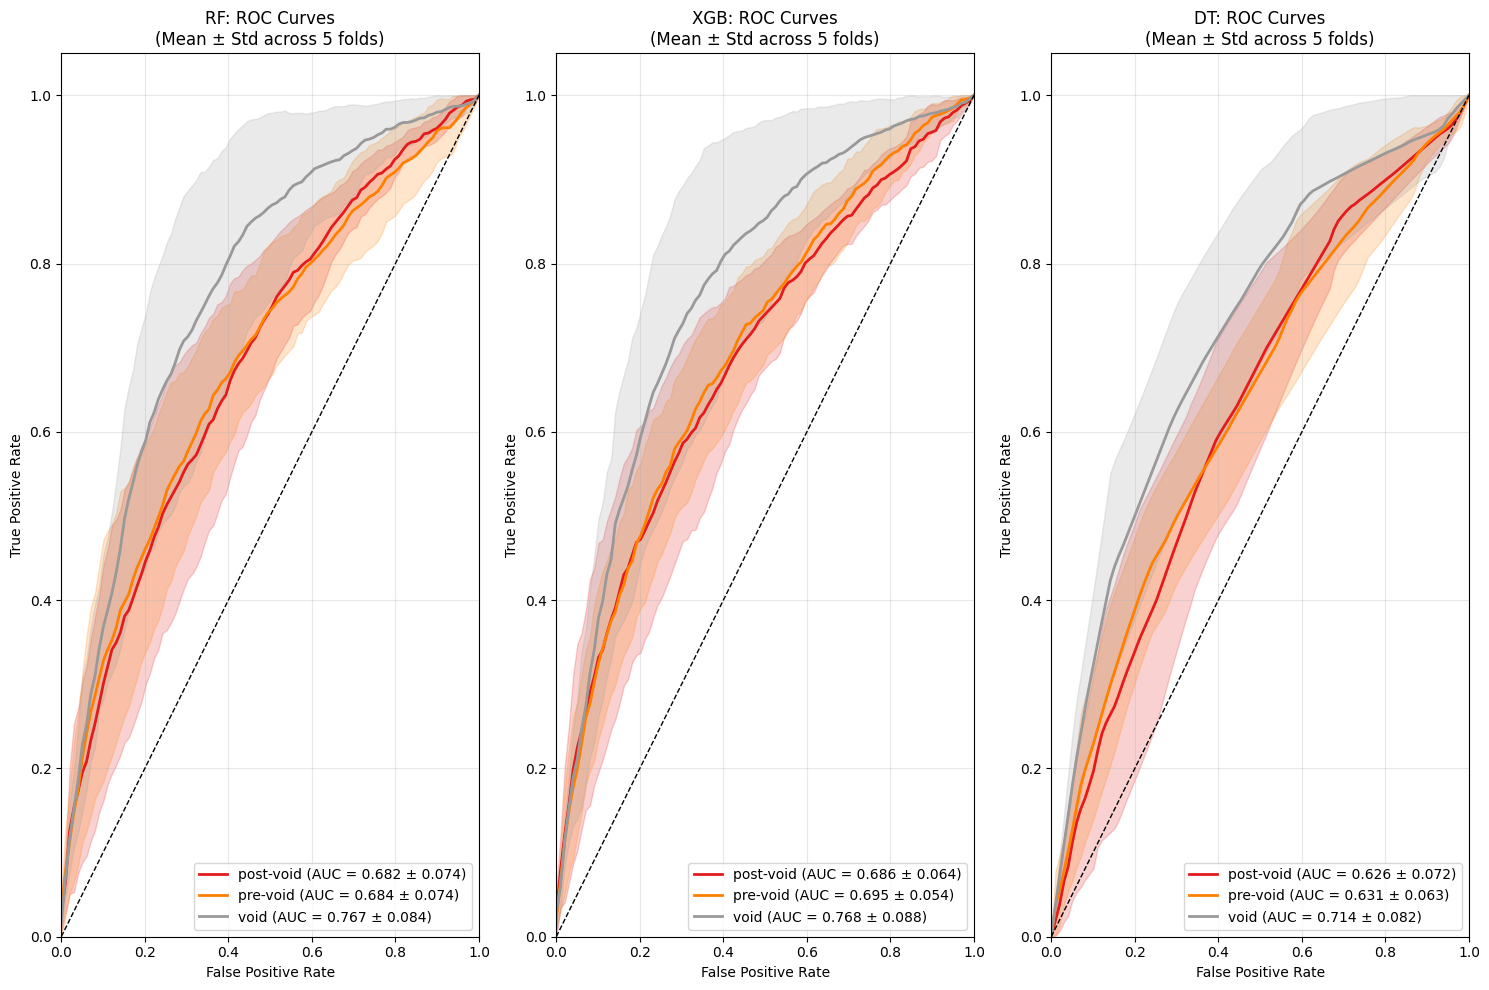

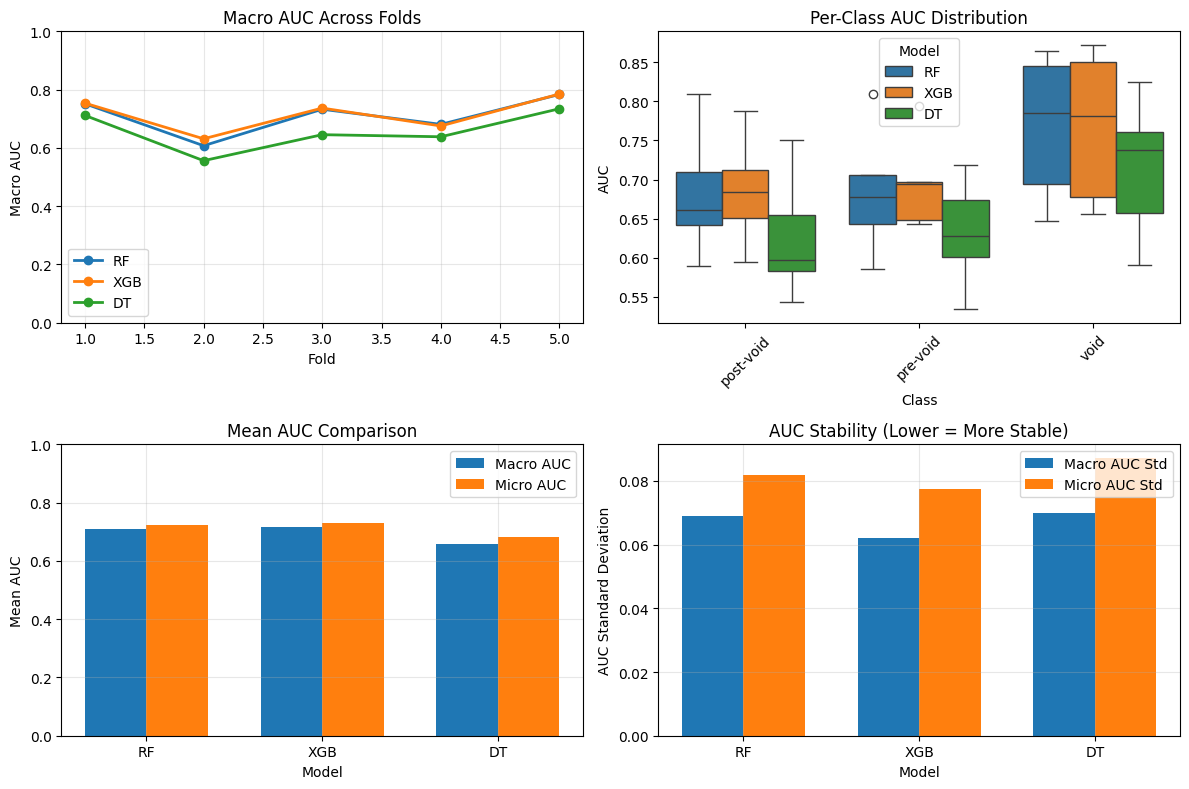

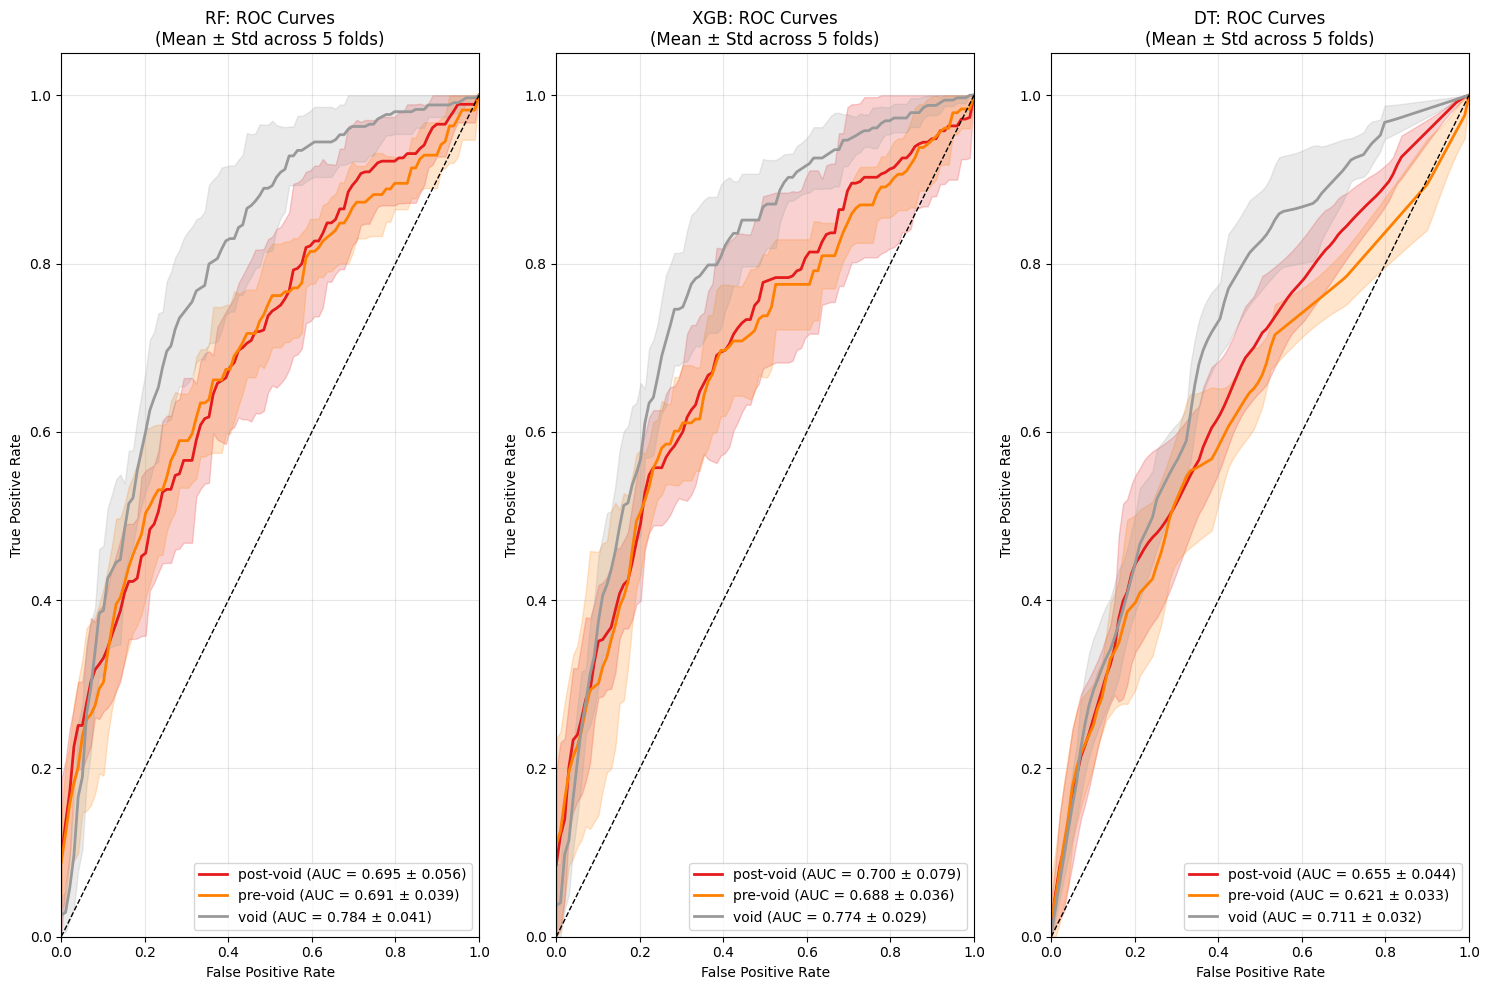

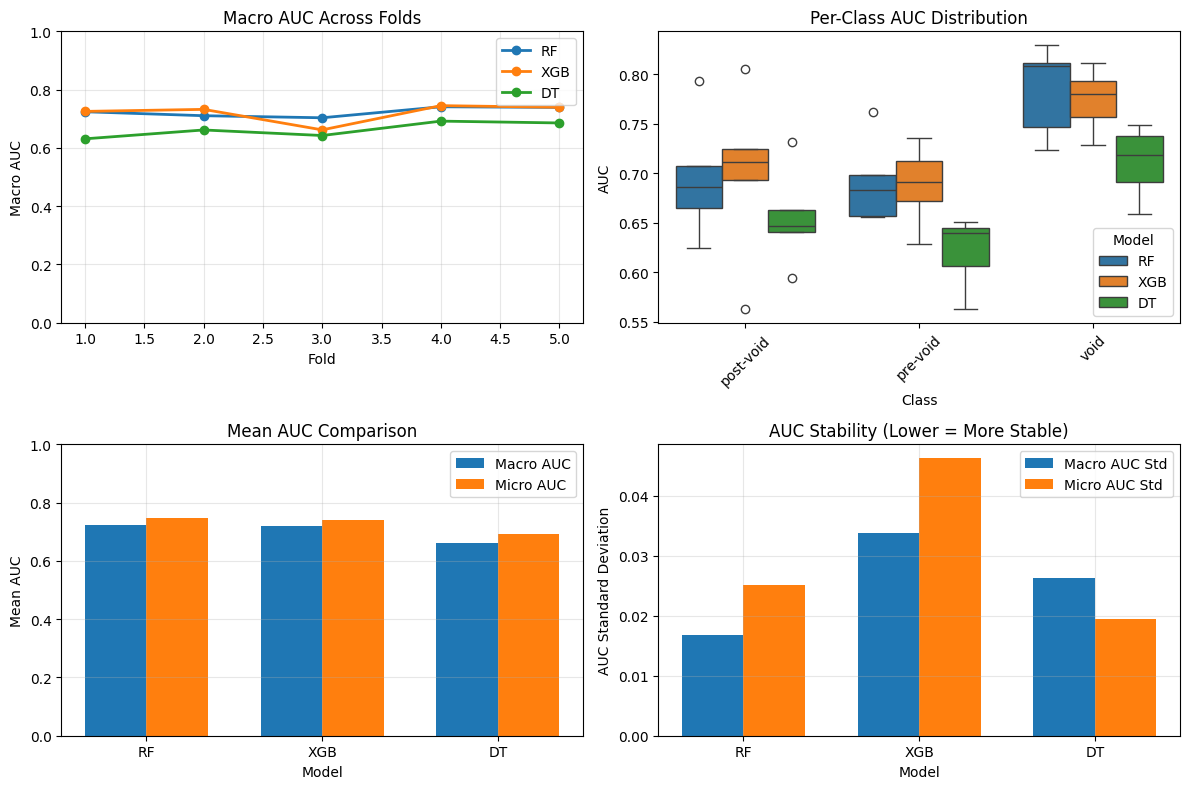

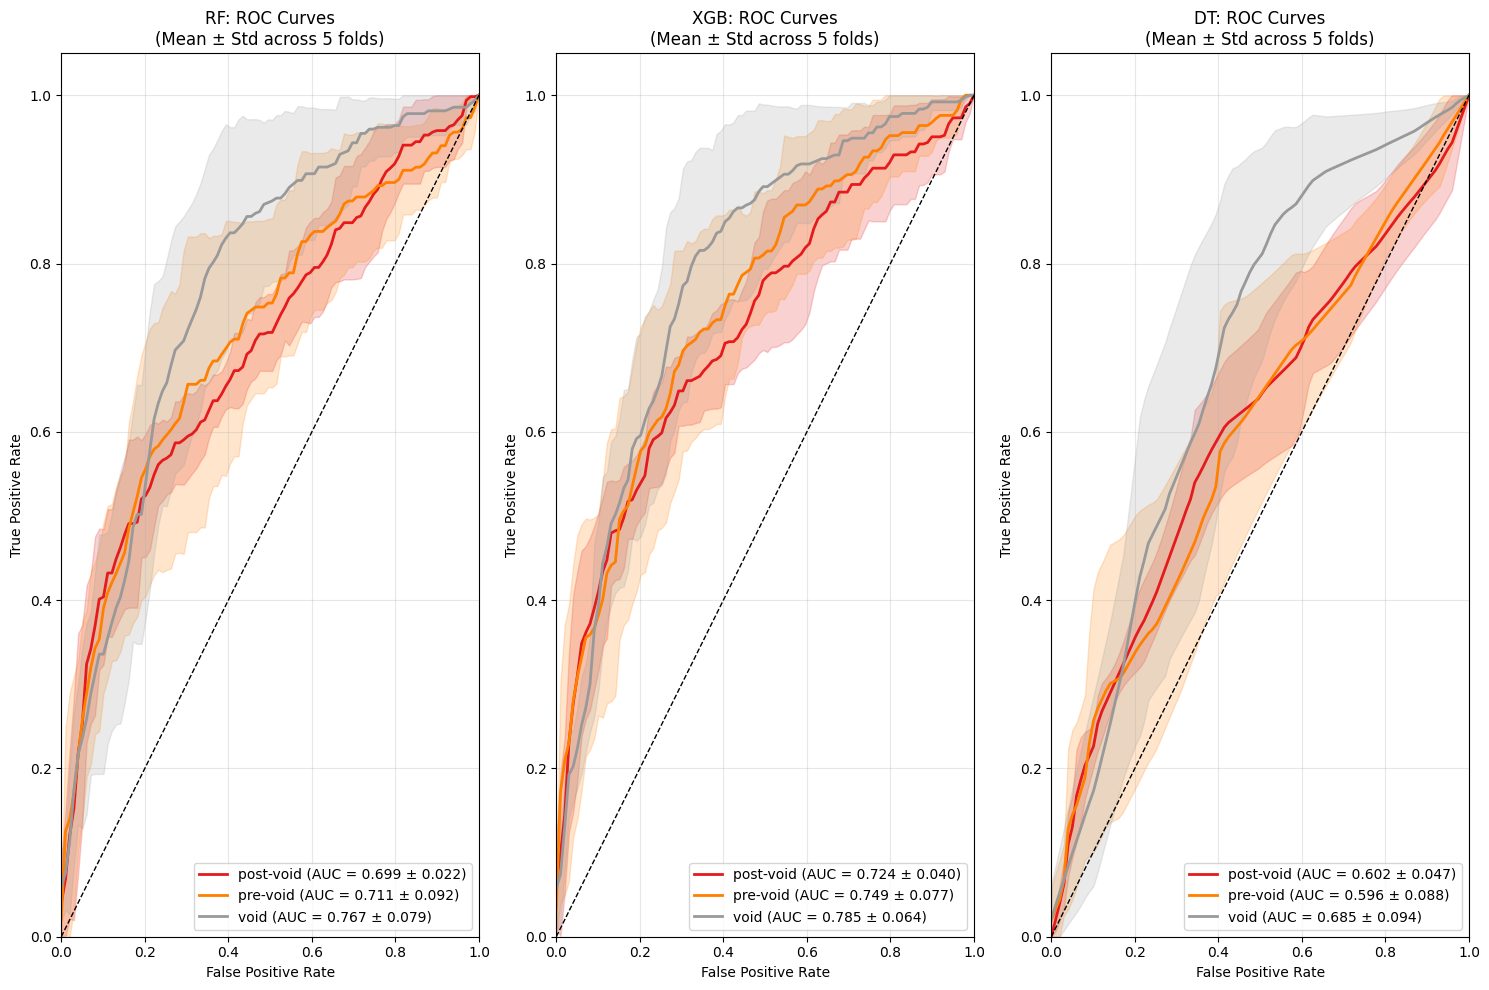

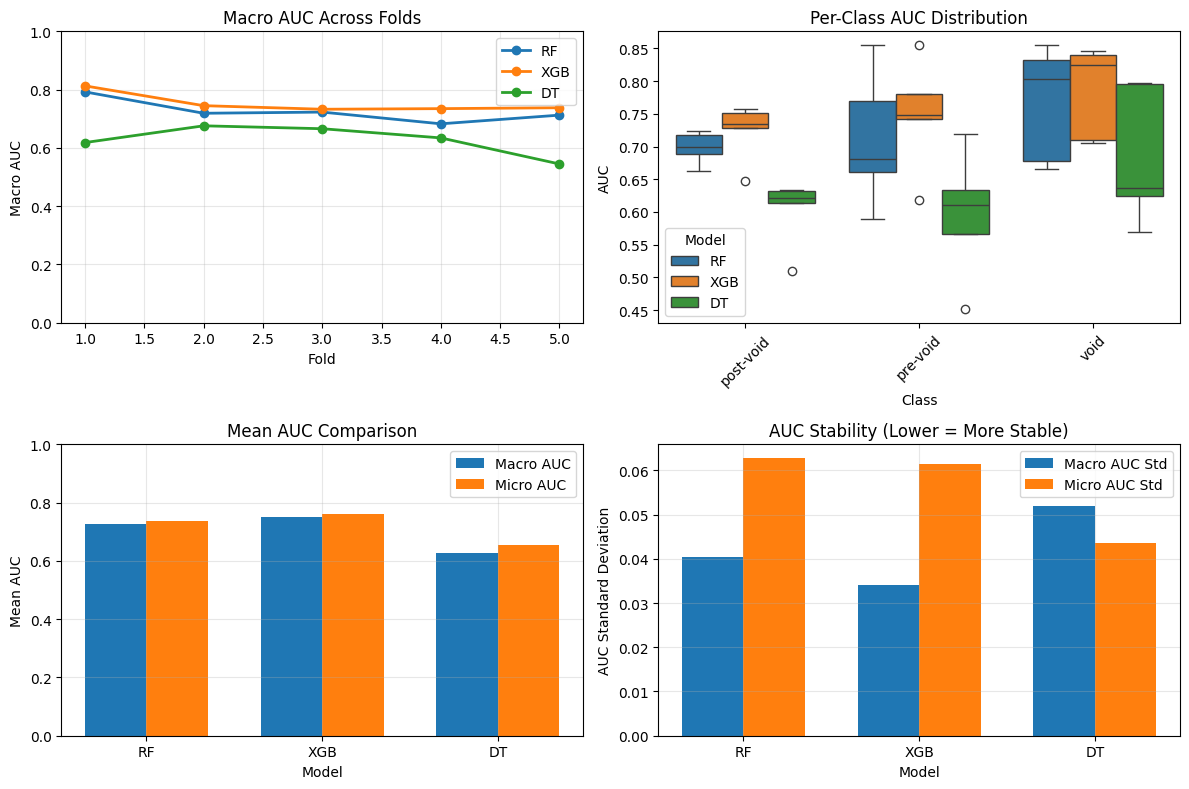

In [4]:
all_results = {}
for file in files:
    data_path = os.path.join(base_path, file)
    features = pd.read_csv(data_path)
    features.drop(columns=['center_time', 'start_time', 'end_time'], inplace=True)
    details = file.split('_')
    exp_name = f"{details[3]}_{details[-1].replace('.csv', '')}"
    print(f"Nested cross-validation for {exp_name}")
    
    X = features.drop(columns=['label', 'experiment_id'])
    y = features['label']
    groups = features['experiment_id']
    
    results_df = nested_cv(X, y, groups, exp_name)

    # Save to csv
    results_df.to_csv(f'/home/edumaba/Public/MPhil_Thesis/Code/wear_uropatch/pipeline/nested_cv/results/three_class/metrics/{exp_name}_nested_cv.csv')
    


## Two Class

In [5]:
from two_class_nested_cv import NestedCVOptimizer


In [6]:
def nested_cv(X, y, groups, exp_name):
    """
    Run nested cross-validation with comprehensive results.
    Returns a DataFrame with all metrics, fold results, and summary statistics.
    """
    # Initialize and run optimizer
    optimizer = NestedCVOptimizer(
        X=X,
        y=y,
        groups=groups,
        n_outer_folds=5,
        n_inner_folds=3,
        n_trials=50,
        random_state=42
    )
    
    print("\nRunning nested cross-validation...")
    summaries = optimizer.run_nested_cv()
    
    print(f"\n📊 RESULTS SUMMARY:")
    if 'best_model' in summaries:
        print(f"Best performing model: {summaries['best_model'].upper()}")
        print(f"Best accuracy: {summaries['best_accuracy']:.4f}")
    else:
        print("Error: Could not determine best model due to processing issues")

    results = optimizer.get_results_dataframe()
    
    optimizer.plot_roc_curves(save_path=f'/home/edumaba/Public/MPhil_Thesis/Code/wear_uropatch/pipeline/nested_cv/results/two_class/plots/roc_curves/{exp_name}_roc_curves.png')
    optimizer.plot_auc_comparison(save_path=f'/home/edumaba/Public/MPhil_Thesis/Code/wear_uropatch/pipeline/nested_cv/results/two_class/plots/auc_comparison/{exp_name}_auc_comparison.png')

    
    return results

In [7]:
files = [
    # 'two_class_pp_1s_no.csv',
    'two_class_pp_1s_0.5.csv',
    # 'two_class_pp_1s_0.8.csv',
    # 'two_class_pp_2s_no.csv',
    # 'two_class_pp_2s_0.5.csv',
    # 'two_class_pp_2s_0.8.csv',
    'two_class_pp_3s_no.csv',
    # 'two_class_pp_3s_0.5.csv',
    # 'two_class_pp_3s_0.8.csv',
    # 'two_class_pp_4s_no.csv',
    # 'two_class_pp_4s_0.5.csv',
    # 'two_class_pp_4s_0.8.csv',
    # 'two_class_pp_5s_no.csv',
    'two_class_pp_5s_0.5.csv',
    # 'two_class_pp_5s_0.8.csv'
]

base_path ='/home/edumaba/Public/MPhil_Thesis/Code/wear_uropatch/pipeline/feature_extracted_data'

[I 2025-09-07 17:20:31,548] A new study created in memory with name: no-name-32c20d6a-a793-4a0f-b780-6bccbc58ac98


Nested cross-validation for 1s_0.5
Positive class 'void' is encoded as: 1
Label mapping: {'non-void': np.int64(0), 'void': np.int64(1)}

Running nested cross-validation...
Starting Binary Nested Cross-Validation with separate optimization for each model...
Positive class: 'void' (encoded as 1)

OUTER FOLD 1/5
Train size: 4224, Test size: 558
Class distribution in test set: {'non-void': np.int64(266), 'void': np.int64(292)}

--- Optimizing RF ---


[I 2025-09-07 17:20:33,819] Trial 0 finished with value: 0.5618091326344338 and parameters: {'n_estimators': 218, 'max_depth': 20, 'min_samples_split': 15, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 0 with value: 0.5618091326344338.
[I 2025-09-07 17:20:36,277] Trial 1 finished with value: 0.5860153454434031 and parameters: {'n_estimators': 369, 'max_depth': 3, 'min_samples_split': 20, 'min_samples_leaf': 9, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 1 with value: 0.5860153454434031.
[I 2025-09-07 17:20:56,952] Trial 2 finished with value: 0.5632498831877696 and parameters: {'n_estimators': 244, 'max_depth': 8, 'min_samples_split': 13, 'min_samples_leaf': 2, 'max_features': None, 'bootstrap': True}. Best is trial 1 with value: 0.5860153454434031.
[I 2025-09-07 17:21:23,325] Trial 3 finished with value: 0.5512705989045347 and parameters: {'n_estimators': 281, 'max_depth': 13, 'min_samples_split': 2, 'min_samples_leaf': 7, 'max_feature

Best rf params: {'n_estimators': 59, 'max_depth': 3, 'min_samples_split': 19, 'min_samples_leaf': 9, 'max_features': 'sqrt', 'bootstrap': False}
Best rf F1 score (positive class): 0.5966


[I 2025-09-07 17:25:22,959] A new study created in memory with name: no-name-9a4648f6-c410-4a1e-a355-53c51d4f4225


rf test accuracy: 0.6828
rf test F1 (positive): 0.6523
rf test AUC: 0.7904

--- Optimizing XGB ---


[I 2025-09-07 17:25:28,370] Trial 0 finished with value: 0.5323306540981431 and parameters: {'n_estimators': 218, 'max_depth': 12, 'learning_rate': 0.1205712628744377, 'subsample': 0.8394633936788146, 'colsample_bytree': 0.6624074561769746, 'min_child_weight': 2, 'gamma': 0.2904180608409973, 'reg_alpha': 1.7323522915498704, 'reg_lambda': 1.2022300234864176}. Best is trial 0 with value: 0.5323306540981431.
[I 2025-09-07 17:25:30,983] Trial 1 finished with value: 0.5149702939126889 and parameters: {'n_estimators': 369, 'max_depth': 3, 'learning_rate': 0.2708160864249968, 'subsample': 0.9329770563201687, 'colsample_bytree': 0.6849356442713105, 'min_child_weight': 2, 'gamma': 0.9170225492671691, 'reg_alpha': 0.6084844859190754, 'reg_lambda': 1.0495128632644757}. Best is trial 0 with value: 0.5323306540981431.
[I 2025-09-07 17:25:33,778] Trial 2 finished with value: 0.5329853473190519 and parameters: {'n_estimators': 244, 'max_depth': 5, 'learning_rate': 0.08012737503998542, 'subsample': 0.

Best xgb params: {'n_estimators': 269, 'max_depth': 3, 'learning_rate': 0.012445641776055364, 'subsample': 0.9279459076791344, 'colsample_bytree': 0.6218758390461046, 'min_child_weight': 10, 'gamma': 0.8854413543463402, 'reg_alpha': 0.1309407057508567, 'reg_lambda': 0.20718943397744516}
Best xgb F1 score (positive class): 0.5812


[I 2025-09-07 17:28:50,086] A new study created in memory with name: no-name-6fceca03-28a3-4dd5-8657-1d009ba36db7
[I 2025-09-07 17:28:50,175] Trial 0 finished with value: 0.48312396651912975 and parameters: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 13, 'min_samples_leaf': 2, 'max_features': None, 'splitter': 'random'}. Best is trial 0 with value: 0.48312396651912975.


xgb test accuracy: 0.6846
xgb test F1 (positive): 0.6452
xgb test AUC: 0.7734

--- Optimizing DT ---


[I 2025-09-07 17:28:51,480] Trial 1 finished with value: 0.4968197351704271 and parameters: {'criterion': 'entropy', 'max_depth': 17, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': None, 'splitter': 'best'}. Best is trial 1 with value: 0.4968197351704271.
[I 2025-09-07 17:28:51,566] Trial 2 finished with value: 0.5325597735094187 and parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 2 with value: 0.5325597735094187.
[I 2025-09-07 17:28:51,612] Trial 3 finished with value: 0.5540145470817993 and parameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 20, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 3 with value: 0.5540145470817993.
[I 2025-09-07 17:28:51,651] Trial 4 finished with value: 0.17645171639396853 and parameters: {'criterion': 'entropy', 'max_depth': 1, 'min_samples_split': 19, 'min_samples_leaf': 3, 'max

Best dt params: {'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'splitter': 'random'}
Best dt F1 score (positive class): 0.5922
dt test accuracy: 0.6326
dt test F1 (positive): 0.6346
dt test AUC: 0.6796

OUTER FOLD 2/5
Train size: 3776, Test size: 1006
Class distribution in test set: {'non-void': np.int64(560), 'void': np.int64(446)}

--- Optimizing RF ---


[I 2025-09-07 17:28:55,800] Trial 0 finished with value: 0.6156058940698235 and parameters: {'n_estimators': 218, 'max_depth': 20, 'min_samples_split': 15, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 0 with value: 0.6156058940698235.
[I 2025-09-07 17:28:58,112] Trial 1 finished with value: 0.6690931359714197 and parameters: {'n_estimators': 369, 'max_depth': 3, 'min_samples_split': 20, 'min_samples_leaf': 9, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 1 with value: 0.6690931359714197.
[I 2025-09-07 17:29:16,190] Trial 2 finished with value: 0.6300663305892945 and parameters: {'n_estimators': 244, 'max_depth': 8, 'min_samples_split': 13, 'min_samples_leaf': 2, 'max_features': None, 'bootstrap': True}. Best is trial 1 with value: 0.6690931359714197.
[I 2025-09-07 17:29:40,554] Trial 3 finished with value: 0.611736077895345 and parameters: {'n_estimators': 281, 'max_depth': 13, 'min_samples_split': 2, 'min_samples_leaf': 7, 'max_features

Best rf params: {'n_estimators': 353, 'max_depth': 4, 'min_samples_split': 16, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'bootstrap': False}
Best rf F1 score (positive class): 0.6702


[I 2025-09-07 17:34:29,162] A new study created in memory with name: no-name-73d274c1-f960-4a25-aaa8-eba5ceff9cc9


rf test accuracy: 0.6014
rf test F1 (positive): 0.5221
rf test AUC: 0.6160

--- Optimizing XGB ---


[I 2025-09-07 17:34:34,054] Trial 0 finished with value: 0.5811342278368773 and parameters: {'n_estimators': 218, 'max_depth': 12, 'learning_rate': 0.1205712628744377, 'subsample': 0.8394633936788146, 'colsample_bytree': 0.6624074561769746, 'min_child_weight': 2, 'gamma': 0.2904180608409973, 'reg_alpha': 1.7323522915498704, 'reg_lambda': 1.2022300234864176}. Best is trial 0 with value: 0.5811342278368773.
[I 2025-09-07 17:34:37,084] Trial 1 finished with value: 0.5704709320458835 and parameters: {'n_estimators': 369, 'max_depth': 3, 'learning_rate': 0.2708160864249968, 'subsample': 0.9329770563201687, 'colsample_bytree': 0.6849356442713105, 'min_child_weight': 2, 'gamma': 0.9170225492671691, 'reg_alpha': 0.6084844859190754, 'reg_lambda': 1.0495128632644757}. Best is trial 0 with value: 0.5811342278368773.
[I 2025-09-07 17:34:39,913] Trial 2 finished with value: 0.5713775845056035 and parameters: {'n_estimators': 244, 'max_depth': 5, 'learning_rate': 0.08012737503998542, 'subsample': 0.

Best xgb params: {'n_estimators': 146, 'max_depth': 3, 'learning_rate': 0.032869776594679906, 'subsample': 0.6200911342127061, 'colsample_bytree': 0.9767059374977014, 'min_child_weight': 3, 'gamma': 4.260012145654116, 'reg_alpha': 1.641366322758961, 'reg_lambda': 0.4556059832849962}
Best xgb F1 score (positive class): 0.6436


[I 2025-09-07 17:37:27,098] A new study created in memory with name: no-name-ea57a0ee-0eb6-45cd-a43a-aae821c3de9d
[I 2025-09-07 17:37:27,177] Trial 0 finished with value: 0.5772381310815695 and parameters: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 13, 'min_samples_leaf': 2, 'max_features': None, 'splitter': 'random'}. Best is trial 0 with value: 0.5772381310815695.


xgb test accuracy: 0.5696
xgb test F1 (positive): 0.4789
xgb test AUC: 0.5847

--- Optimizing DT ---


[I 2025-09-07 17:37:28,357] Trial 1 finished with value: 0.5413673091235687 and parameters: {'criterion': 'entropy', 'max_depth': 17, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': None, 'splitter': 'best'}. Best is trial 0 with value: 0.5772381310815695.
[I 2025-09-07 17:37:28,437] Trial 2 finished with value: 0.6107931196756969 and parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 2 with value: 0.6107931196756969.
[I 2025-09-07 17:37:28,483] Trial 3 finished with value: 0.6297903530258345 and parameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 20, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 3 with value: 0.6297903530258345.
[I 2025-09-07 17:37:28,520] Trial 4 finished with value: 0.3895375646736808 and parameters: {'criterion': 'entropy', 'max_depth': 1, 'min_samples_split': 19, 'min_samples_leaf': 3, 'max_

Best dt params: {'criterion': 'entropy', 'max_depth': 2, 'min_samples_split': 18, 'min_samples_leaf': 10, 'max_features': None, 'splitter': 'random'}
Best dt F1 score (positive class): 0.6742
dt test accuracy: 0.5378
dt test F1 (positive): 0.5161
dt test AUC: 0.5556

OUTER FOLD 3/5
Train size: 3691, Test size: 1091
Class distribution in test set: {'non-void': np.int64(641), 'void': np.int64(450)}

--- Optimizing RF ---


[I 2025-09-07 17:37:35,810] Trial 0 finished with value: 0.5670764899684421 and parameters: {'n_estimators': 218, 'max_depth': 20, 'min_samples_split': 15, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 0 with value: 0.5670764899684421.
[I 2025-09-07 17:37:38,087] Trial 1 finished with value: 0.5942348291471434 and parameters: {'n_estimators': 369, 'max_depth': 3, 'min_samples_split': 20, 'min_samples_leaf': 9, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 1 with value: 0.5942348291471434.
[I 2025-09-07 17:37:56,614] Trial 2 finished with value: 0.572810000998087 and parameters: {'n_estimators': 244, 'max_depth': 8, 'min_samples_split': 13, 'min_samples_leaf': 2, 'max_features': None, 'bootstrap': True}. Best is trial 1 with value: 0.5942348291471434.
[I 2025-09-07 17:38:19,524] Trial 3 finished with value: 0.545207387078146 and parameters: {'n_estimators': 281, 'max_depth': 13, 'min_samples_split': 2, 'min_samples_leaf': 7, 'max_features'

Best rf params: {'n_estimators': 393, 'max_depth': 4, 'min_samples_split': 16, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'bootstrap': False}
Best rf F1 score (positive class): 0.5994


[I 2025-09-07 17:42:40,828] A new study created in memory with name: no-name-09a4ee31-4c2b-4258-967c-24e566a56735


rf test accuracy: 0.7223
rf test F1 (positive): 0.6371
rf test AUC: 0.8075

--- Optimizing XGB ---


[I 2025-09-07 17:42:45,457] Trial 0 finished with value: 0.5109586555787534 and parameters: {'n_estimators': 218, 'max_depth': 12, 'learning_rate': 0.1205712628744377, 'subsample': 0.8394633936788146, 'colsample_bytree': 0.6624074561769746, 'min_child_weight': 2, 'gamma': 0.2904180608409973, 'reg_alpha': 1.7323522915498704, 'reg_lambda': 1.2022300234864176}. Best is trial 0 with value: 0.5109586555787534.
[I 2025-09-07 17:42:47,860] Trial 1 finished with value: 0.48606486199519905 and parameters: {'n_estimators': 369, 'max_depth': 3, 'learning_rate': 0.2708160864249968, 'subsample': 0.9329770563201687, 'colsample_bytree': 0.6849356442713105, 'min_child_weight': 2, 'gamma': 0.9170225492671691, 'reg_alpha': 0.6084844859190754, 'reg_lambda': 1.0495128632644757}. Best is trial 0 with value: 0.5109586555787534.
[I 2025-09-07 17:42:50,605] Trial 2 finished with value: 0.5054710272481883 and parameters: {'n_estimators': 244, 'max_depth': 5, 'learning_rate': 0.08012737503998542, 'subsample': 0

Best xgb params: {'n_estimators': 51, 'max_depth': 3, 'learning_rate': 0.04710118689830017, 'subsample': 0.6761386420710609, 'colsample_bytree': 0.9668459618846198, 'min_child_weight': 9, 'gamma': 0.9507791906911283, 'reg_alpha': 0.7603995840241606, 'reg_lambda': 1.7247467783874255}
Best xgb F1 score (positive class): 0.5790


[I 2025-09-07 17:45:05,520] A new study created in memory with name: no-name-d6574d54-fca5-4ead-a7fd-e94684863251
[I 2025-09-07 17:45:05,597] Trial 0 finished with value: 0.45939941411843743 and parameters: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 13, 'min_samples_leaf': 2, 'max_features': None, 'splitter': 'random'}. Best is trial 0 with value: 0.45939941411843743.


xgb test accuracy: 0.7360
xgb test F1 (positive): 0.6628
xgb test AUC: 0.8061

--- Optimizing DT ---


[I 2025-09-07 17:45:06,710] Trial 1 finished with value: 0.4868023983758274 and parameters: {'criterion': 'entropy', 'max_depth': 17, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': None, 'splitter': 'best'}. Best is trial 1 with value: 0.4868023983758274.
[I 2025-09-07 17:45:06,786] Trial 2 finished with value: 0.5435319891323086 and parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 2 with value: 0.5435319891323086.
[I 2025-09-07 17:45:06,829] Trial 3 finished with value: 0.5417842037979338 and parameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 20, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 2 with value: 0.5435319891323086.
[I 2025-09-07 17:45:06,864] Trial 4 finished with value: 0.18887262079062958 and parameters: {'criterion': 'entropy', 'max_depth': 1, 'min_samples_split': 19, 'min_samples_leaf': 3, 'max

Best dt params: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 8, 'max_features': 'log2', 'splitter': 'best'}
Best dt F1 score (positive class): 0.6145
dt test accuracy: 0.7076
dt test F1 (positive): 0.6404
dt test AUC: 0.7545

OUTER FOLD 4/5
Train size: 3884, Test size: 898
Class distribution in test set: {'non-void': np.int64(593), 'void': np.int64(305)}

--- Optimizing RF ---


[I 2025-09-07 17:45:13,740] Trial 0 finished with value: 0.5946165510252541 and parameters: {'n_estimators': 218, 'max_depth': 20, 'min_samples_split': 15, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 0 with value: 0.5946165510252541.
[I 2025-09-07 17:45:16,044] Trial 1 finished with value: 0.5954728392012655 and parameters: {'n_estimators': 369, 'max_depth': 3, 'min_samples_split': 20, 'min_samples_leaf': 9, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 1 with value: 0.5954728392012655.
[I 2025-09-07 17:45:34,466] Trial 2 finished with value: 0.5990488985133187 and parameters: {'n_estimators': 244, 'max_depth': 8, 'min_samples_split': 13, 'min_samples_leaf': 2, 'max_features': None, 'bootstrap': True}. Best is trial 2 with value: 0.5990488985133187.
[I 2025-09-07 17:45:57,945] Trial 3 finished with value: 0.588764290230492 and parameters: {'n_estimators': 281, 'max_depth': 13, 'min_samples_split': 2, 'min_samples_leaf': 7, 'max_features

Best rf params: {'n_estimators': 153, 'max_depth': 4, 'min_samples_split': 19, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'bootstrap': True}
Best rf F1 score (positive class): 0.6069


[I 2025-09-07 17:49:24,271] A new study created in memory with name: no-name-e5b866f9-e597-4ac3-99c5-37103ae9495e


rf test accuracy: 0.7517
rf test F1 (positive): 0.6421
rf test AUC: 0.8123

--- Optimizing XGB ---


[I 2025-09-07 17:49:29,138] Trial 0 finished with value: 0.571701315637742 and parameters: {'n_estimators': 218, 'max_depth': 12, 'learning_rate': 0.1205712628744377, 'subsample': 0.8394633936788146, 'colsample_bytree': 0.6624074561769746, 'min_child_weight': 2, 'gamma': 0.2904180608409973, 'reg_alpha': 1.7323522915498704, 'reg_lambda': 1.2022300234864176}. Best is trial 0 with value: 0.571701315637742.
[I 2025-09-07 17:49:31,451] Trial 1 finished with value: 0.5665725163546343 and parameters: {'n_estimators': 369, 'max_depth': 3, 'learning_rate': 0.2708160864249968, 'subsample': 0.9329770563201687, 'colsample_bytree': 0.6849356442713105, 'min_child_weight': 2, 'gamma': 0.9170225492671691, 'reg_alpha': 0.6084844859190754, 'reg_lambda': 1.0495128632644757}. Best is trial 0 with value: 0.571701315637742.
[I 2025-09-07 17:49:33,963] Trial 2 finished with value: 0.5786757128240368 and parameters: {'n_estimators': 244, 'max_depth': 5, 'learning_rate': 0.08012737503998542, 'subsample': 0.655

Best xgb params: {'n_estimators': 107, 'max_depth': 4, 'learning_rate': 0.026118314368433263, 'subsample': 0.8044770518726299, 'colsample_bytree': 0.7124452577103785, 'min_child_weight': 4, 'gamma': 0.3386857397973206, 'reg_alpha': 0.4394733869249534, 'reg_lambda': 0.2143491127556627}
Best xgb F1 score (positive class): 0.6053


[I 2025-09-07 17:51:49,406] A new study created in memory with name: no-name-fead61f2-5c86-48ff-976a-a65a76d6f617
[I 2025-09-07 17:51:49,484] Trial 0 finished with value: 0.4962370546261239 and parameters: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 13, 'min_samples_leaf': 2, 'max_features': None, 'splitter': 'random'}. Best is trial 0 with value: 0.4962370546261239.


xgb test accuracy: 0.7450
xgb test F1 (positive): 0.6371
xgb test AUC: 0.7956

--- Optimizing DT ---


[I 2025-09-07 17:51:50,669] Trial 1 finished with value: 0.5091097938135656 and parameters: {'criterion': 'entropy', 'max_depth': 17, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': None, 'splitter': 'best'}. Best is trial 1 with value: 0.5091097938135656.
[I 2025-09-07 17:51:50,760] Trial 2 finished with value: 0.5231863622877028 and parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 2 with value: 0.5231863622877028.
[I 2025-09-07 17:51:50,810] Trial 3 finished with value: 0.5955358244376915 and parameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 20, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 3 with value: 0.5955358244376915.
[I 2025-09-07 17:51:50,845] Trial 4 finished with value: 0.5966666516133209 and parameters: {'criterion': 'entropy', 'max_depth': 1, 'min_samples_split': 19, 'min_samples_leaf': 3, 'max_

Best dt params: {'criterion': 'entropy', 'max_depth': 2, 'min_samples_split': 11, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'splitter': 'best'}
Best dt F1 score (positive class): 0.6009
dt test accuracy: 0.7138
dt test F1 (positive): 0.4911
dt test AUC: 0.7076

OUTER FOLD 5/5
Train size: 3553, Test size: 1229
Class distribution in test set: {'non-void': np.int64(806), 'void': np.int64(423)}

--- Optimizing RF ---


[I 2025-09-07 17:51:58,191] Trial 0 finished with value: 0.6067339809533965 and parameters: {'n_estimators': 218, 'max_depth': 20, 'min_samples_split': 15, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 0 with value: 0.6067339809533965.
[I 2025-09-07 17:52:00,382] Trial 1 finished with value: 0.6210960768754564 and parameters: {'n_estimators': 369, 'max_depth': 3, 'min_samples_split': 20, 'min_samples_leaf': 9, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 1 with value: 0.6210960768754564.
[I 2025-09-07 17:52:17,730] Trial 2 finished with value: 0.6174211218790583 and parameters: {'n_estimators': 244, 'max_depth': 8, 'min_samples_split': 13, 'min_samples_leaf': 2, 'max_features': None, 'bootstrap': True}. Best is trial 1 with value: 0.6210960768754564.
[I 2025-09-07 17:52:39,868] Trial 3 finished with value: 0.6075838794665743 and parameters: {'n_estimators': 281, 'max_depth': 13, 'min_samples_split': 2, 'min_samples_leaf': 7, 'max_feature

Best rf params: {'n_estimators': 402, 'max_depth': 4, 'min_samples_split': 18, 'min_samples_leaf': 10, 'max_features': None, 'bootstrap': False}
Best rf F1 score (positive class): 0.6423


[I 2025-09-07 18:04:33,138] A new study created in memory with name: no-name-f2ad69cd-b515-4fc5-9373-23ead14b8eaf


rf test accuracy: 0.7217
rf test F1 (positive): 0.6510
rf test AUC: 0.7651

--- Optimizing XGB ---


[I 2025-09-07 18:04:40,464] Trial 0 finished with value: 0.5992548252131228 and parameters: {'n_estimators': 218, 'max_depth': 12, 'learning_rate': 0.1205712628744377, 'subsample': 0.8394633936788146, 'colsample_bytree': 0.6624074561769746, 'min_child_weight': 2, 'gamma': 0.2904180608409973, 'reg_alpha': 1.7323522915498704, 'reg_lambda': 1.2022300234864176}. Best is trial 0 with value: 0.5992548252131228.
[I 2025-09-07 18:04:43,607] Trial 1 finished with value: 0.5899679850647759 and parameters: {'n_estimators': 369, 'max_depth': 3, 'learning_rate': 0.2708160864249968, 'subsample': 0.9329770563201687, 'colsample_bytree': 0.6849356442713105, 'min_child_weight': 2, 'gamma': 0.9170225492671691, 'reg_alpha': 0.6084844859190754, 'reg_lambda': 1.0495128632644757}. Best is trial 0 with value: 0.5992548252131228.
[I 2025-09-07 18:04:47,025] Trial 2 finished with value: 0.609743095472462 and parameters: {'n_estimators': 244, 'max_depth': 5, 'learning_rate': 0.08012737503998542, 'subsample': 0.6

Best xgb params: {'n_estimators': 258, 'max_depth': 3, 'learning_rate': 0.022995565987867637, 'subsample': 0.7552895883696085, 'colsample_bytree': 0.8135023842969531, 'min_child_weight': 9, 'gamma': 3.0774512794282627, 'reg_alpha': 1.5082536013584142, 'reg_lambda': 1.423064122505727}
Best xgb F1 score (positive class): 0.6253


[I 2025-09-07 18:10:21,463] A new study created in memory with name: no-name-20b4afab-4803-4b72-98cc-51425a82413e
[I 2025-09-07 18:10:21,555] Trial 0 finished with value: 0.5154836547088494 and parameters: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 13, 'min_samples_leaf': 2, 'max_features': None, 'splitter': 'random'}. Best is trial 0 with value: 0.5154836547088494.


xgb test accuracy: 0.7079
xgb test F1 (positive): 0.6333
xgb test AUC: 0.8000

--- Optimizing DT ---


[I 2025-09-07 18:10:22,745] Trial 1 finished with value: 0.5393756808701479 and parameters: {'criterion': 'entropy', 'max_depth': 17, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': None, 'splitter': 'best'}. Best is trial 1 with value: 0.5393756808701479.
[I 2025-09-07 18:10:22,836] Trial 2 finished with value: 0.5864945382323734 and parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 2 with value: 0.5864945382323734.
[I 2025-09-07 18:10:22,890] Trial 3 finished with value: 0.47023585195122536 and parameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 20, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 2 with value: 0.5864945382323734.
[I 2025-09-07 18:10:22,938] Trial 4 finished with value: 0.41732589727001823 and parameters: {'criterion': 'entropy', 'max_depth': 1, 'min_samples_split': 19, 'min_samples_leaf': 3, 'ma

Best dt params: {'criterion': 'entropy', 'max_depth': 1, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': None, 'splitter': 'best'}
Best dt F1 score (positive class): 0.6595
dt test accuracy: 0.6469
dt test F1 (positive): 0.6193
dt test AUC: 0.6915

BINARY NESTED CROSS-VALIDATION RESULTS SUMMARY
Positive class: 'void'

RF Results:
----------------------------------------
accuracy          : 0.6960 ± 0.0583
f1_positive       : 0.6209 ± 0.0556
precision_positive: 0.6430 ± 0.0861
recall_positive   : 0.6121 ± 0.0988
f1_macro          : 0.6825 ± 0.0542
auc               : 0.7583 ± 0.0816
Individual fold accuracies: ['0.6828', '0.6014', '0.7223', '0.7517', '0.7217']
Individual fold F1 (pos): ['0.6523', '0.5221', '0.6371', '0.6421', '0.6510']
Individual fold AUCs: ['0.7904', '0.6160', '0.8075', '0.8123', '0.7651']

XGB Results:
----------------------------------------
accuracy          : 0.6886 ± 0.0707
f1_positive       : 0.6114 ± 0.0749
precision_positive: 0.6352 ± 0.1083
reca

[I 2025-09-07 18:10:35,354] A new study created in memory with name: no-name-7dd0f649-8182-408d-aab7-10a24cd26af8


AUC comparison plots saved to: /home/edumaba/Public/MPhil_Thesis/Code/wear_uropatch/pipeline/nested_cv/results/two_class/plots/auc_comparison/1s_0.5_auc_comparison.png
Nested cross-validation for 3s_no
Positive class 'void' is encoded as: 1
Label mapping: {'non-void': np.int64(0), 'void': np.int64(1)}

Running nested cross-validation...
Starting Binary Nested Cross-Validation with separate optimization for each model...
Positive class: 'void' (encoded as 1)

OUTER FOLD 1/5
Train size: 614, Test size: 172
Class distribution in test set: {'non-void': np.int64(114), 'void': np.int64(58)}

--- Optimizing RF ---


[I 2025-09-07 18:10:36,312] Trial 0 finished with value: 0.6274299776715867 and parameters: {'n_estimators': 218, 'max_depth': 20, 'min_samples_split': 15, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 0 with value: 0.6274299776715867.
[I 2025-09-07 18:10:37,779] Trial 1 finished with value: 0.6678959313481975 and parameters: {'n_estimators': 369, 'max_depth': 3, 'min_samples_split': 20, 'min_samples_leaf': 9, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 1 with value: 0.6678959313481975.
[I 2025-09-07 18:10:40,903] Trial 2 finished with value: 0.622160728698259 and parameters: {'n_estimators': 244, 'max_depth': 8, 'min_samples_split': 13, 'min_samples_leaf': 2, 'max_features': None, 'bootstrap': True}. Best is trial 1 with value: 0.6678959313481975.
[I 2025-09-07 18:10:43,960] Trial 3 finished with value: 0.6446612740141556 and parameters: {'n_estimators': 281, 'max_depth': 13, 'min_samples_split': 2, 'min_samples_leaf': 7, 'max_features

Best rf params: {'n_estimators': 95, 'max_depth': 3, 'min_samples_split': 17, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'bootstrap': True}
Best rf F1 score (positive class): 0.6752


[I 2025-09-07 18:11:35,672] A new study created in memory with name: no-name-53e1d365-0113-42f5-b04f-9ef93194d472


rf test accuracy: 0.6802
rf test F1 (positive): 0.5217
rf test AUC: 0.7086

--- Optimizing XGB ---


[I 2025-09-07 18:11:40,599] Trial 0 finished with value: 0.582760287213477 and parameters: {'n_estimators': 218, 'max_depth': 12, 'learning_rate': 0.1205712628744377, 'subsample': 0.8394633936788146, 'colsample_bytree': 0.6624074561769746, 'min_child_weight': 2, 'gamma': 0.2904180608409973, 'reg_alpha': 1.7323522915498704, 'reg_lambda': 1.2022300234864176}. Best is trial 0 with value: 0.582760287213477.
[I 2025-09-07 18:11:44,775] Trial 1 finished with value: 0.5813387983704418 and parameters: {'n_estimators': 369, 'max_depth': 3, 'learning_rate': 0.2708160864249968, 'subsample': 0.9329770563201687, 'colsample_bytree': 0.6849356442713105, 'min_child_weight': 2, 'gamma': 0.9170225492671691, 'reg_alpha': 0.6084844859190754, 'reg_lambda': 1.0495128632644757}. Best is trial 0 with value: 0.582760287213477.
[I 2025-09-07 18:11:47,860] Trial 2 finished with value: 0.5876346417985975 and parameters: {'n_estimators': 244, 'max_depth': 5, 'learning_rate': 0.08012737503998542, 'subsample': 0.655

Best xgb params: {'n_estimators': 270, 'max_depth': 3, 'learning_rate': 0.012856335678889228, 'subsample': 0.7082994046744213, 'colsample_bytree': 0.840383391059547, 'min_child_weight': 2, 'gamma': 4.985811179856299, 'reg_alpha': 1.8080156658657442, 'reg_lambda': 1.364041880457118}
Best xgb F1 score (positive class): 0.6725


[I 2025-09-07 18:14:23,048] A new study created in memory with name: no-name-36a9f2e4-054d-4cef-b2c8-41bea210f7e7
[I 2025-09-07 18:14:23,080] Trial 0 finished with value: 0.5235057340320498 and parameters: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 13, 'min_samples_leaf': 2, 'max_features': None, 'splitter': 'random'}. Best is trial 0 with value: 0.5235057340320498.
[I 2025-09-07 18:14:23,223] Trial 1 finished with value: 0.601314007505958 and parameters: {'criterion': 'entropy', 'max_depth': 17, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': None, 'splitter': 'best'}. Best is trial 1 with value: 0.601314007505958.


xgb test accuracy: 0.6860
xgb test F1 (positive): 0.5263
xgb test AUC: 0.6932

--- Optimizing DT ---


[I 2025-09-07 18:14:23,249] Trial 2 finished with value: 0.563769727916951 and parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 1 with value: 0.601314007505958.
[I 2025-09-07 18:14:23,275] Trial 3 finished with value: 0.46210808316952984 and parameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 20, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 1 with value: 0.601314007505958.
[I 2025-09-07 18:14:23,299] Trial 4 finished with value: 0.4894228775719696 and parameters: {'criterion': 'entropy', 'max_depth': 1, 'min_samples_split': 19, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 1 with value: 0.601314007505958.
[I 2025-09-07 18:14:23,321] Trial 5 finished with value: 0.5885608873063847 and parameters: {'criterion': 'gini', 'max_depth': 19, 'min_samples_split': 19, 'min_samples_leaf': 6, 'max_fea

Best dt params: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 7, 'min_samples_leaf': 9, 'max_features': None, 'splitter': 'best'}
Best dt F1 score (positive class): 0.6789
dt test accuracy: 0.6860
dt test F1 (positive): 0.5345
dt test AUC: 0.6774

OUTER FOLD 2/5
Train size: 614, Test size: 172
Class distribution in test set: {'non-void': np.int64(95), 'void': np.int64(77)}

--- Optimizing RF ---


[I 2025-09-07 18:14:28,007] Trial 0 finished with value: 0.5716558667942194 and parameters: {'n_estimators': 218, 'max_depth': 20, 'min_samples_split': 15, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 0 with value: 0.5716558667942194.
[I 2025-09-07 18:14:29,278] Trial 1 finished with value: 0.6401417318034704 and parameters: {'n_estimators': 369, 'max_depth': 3, 'min_samples_split': 20, 'min_samples_leaf': 9, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 1 with value: 0.6401417318034704.
[I 2025-09-07 18:14:32,398] Trial 2 finished with value: 0.5944540478248344 and parameters: {'n_estimators': 244, 'max_depth': 8, 'min_samples_split': 13, 'min_samples_leaf': 2, 'max_features': None, 'bootstrap': True}. Best is trial 1 with value: 0.6401417318034704.
[I 2025-09-07 18:14:35,318] Trial 3 finished with value: 0.592688518193347 and parameters: {'n_estimators': 281, 'max_depth': 13, 'min_samples_split': 2, 'min_samples_leaf': 7, 'max_features

Best rf params: {'n_estimators': 415, 'max_depth': 3, 'min_samples_split': 18, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'bootstrap': False}
Best rf F1 score (positive class): 0.6406


[I 2025-09-07 18:15:58,791] A new study created in memory with name: no-name-56033cea-e8be-45e1-aa91-6bcbf93074ee


rf test accuracy: 0.7326
rf test F1 (positive): 0.6849
rf test AUC: 0.8087

--- Optimizing XGB ---


[I 2025-09-07 18:16:01,762] Trial 0 finished with value: 0.5830711294125929 and parameters: {'n_estimators': 218, 'max_depth': 12, 'learning_rate': 0.1205712628744377, 'subsample': 0.8394633936788146, 'colsample_bytree': 0.6624074561769746, 'min_child_weight': 2, 'gamma': 0.2904180608409973, 'reg_alpha': 1.7323522915498704, 'reg_lambda': 1.2022300234864176}. Best is trial 0 with value: 0.5830711294125929.
[I 2025-09-07 18:16:04,549] Trial 1 finished with value: 0.587131449289869 and parameters: {'n_estimators': 369, 'max_depth': 3, 'learning_rate': 0.2708160864249968, 'subsample': 0.9329770563201687, 'colsample_bytree': 0.6849356442713105, 'min_child_weight': 2, 'gamma': 0.9170225492671691, 'reg_alpha': 0.6084844859190754, 'reg_lambda': 1.0495128632644757}. Best is trial 1 with value: 0.587131449289869.
[I 2025-09-07 18:16:07,014] Trial 2 finished with value: 0.5808744765799981 and parameters: {'n_estimators': 244, 'max_depth': 5, 'learning_rate': 0.08012737503998542, 'subsample': 0.65

Best xgb params: {'n_estimators': 435, 'max_depth': 9, 'learning_rate': 0.019660119452090414, 'subsample': 0.6829301392693443, 'colsample_bytree': 0.9951335095476329, 'min_child_weight': 7, 'gamma': 4.992483437747104, 'reg_alpha': 1.3421742732589848, 'reg_lambda': 0.21164602700576385}
Best xgb F1 score (positive class): 0.6327


[I 2025-09-07 18:18:39,669] A new study created in memory with name: no-name-1ee082d6-022e-468c-aca0-d69f90ada5bf
[I 2025-09-07 18:18:39,700] Trial 0 finished with value: 0.5012324412207313 and parameters: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 13, 'min_samples_leaf': 2, 'max_features': None, 'splitter': 'random'}. Best is trial 0 with value: 0.5012324412207313.
[I 2025-09-07 18:18:39,851] Trial 1 finished with value: 0.4967902141397049 and parameters: {'criterion': 'entropy', 'max_depth': 17, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': None, 'splitter': 'best'}. Best is trial 0 with value: 0.5012324412207313.


xgb test accuracy: 0.7326
xgb test F1 (positive): 0.6667
xgb test AUC: 0.8074

--- Optimizing DT ---


[I 2025-09-07 18:18:39,880] Trial 2 finished with value: 0.5007407407407407 and parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 0 with value: 0.5012324412207313.
[I 2025-09-07 18:18:39,908] Trial 3 finished with value: 0.6074580689965305 and parameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 20, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 3 with value: 0.6074580689965305.
[I 2025-09-07 18:18:39,933] Trial 4 finished with value: 0.6265554493773422 and parameters: {'criterion': 'entropy', 'max_depth': 1, 'min_samples_split': 19, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 4 with value: 0.6265554493773422.
[I 2025-09-07 18:18:39,957] Trial 5 finished with value: 0.5251464652418538 and parameters: {'criterion': 'gini', 'max_depth': 19, 'min_samples_split': 19, 'min_samples_leaf': 6, 'max_

Best dt params: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 6, 'min_samples_leaf': 9, 'max_features': None, 'splitter': 'best'}
Best dt F1 score (positive class): 0.6457
dt test accuracy: 0.7151
dt test F1 (positive): 0.7351
dt test AUC: 0.7148

OUTER FOLD 3/5
Train size: 643, Test size: 143
Class distribution in test set: {'non-void': np.int64(78), 'void': np.int64(65)}

--- Optimizing RF ---


[I 2025-09-07 18:18:43,727] Trial 0 finished with value: 0.6355300161614771 and parameters: {'n_estimators': 218, 'max_depth': 20, 'min_samples_split': 15, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 0 with value: 0.6355300161614771.
[I 2025-09-07 18:18:45,025] Trial 1 finished with value: 0.6461451383865177 and parameters: {'n_estimators': 369, 'max_depth': 3, 'min_samples_split': 20, 'min_samples_leaf': 9, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 1 with value: 0.6461451383865177.
[I 2025-09-07 18:18:48,193] Trial 2 finished with value: 0.6320053198007646 and parameters: {'n_estimators': 244, 'max_depth': 8, 'min_samples_split': 13, 'min_samples_leaf': 2, 'max_features': None, 'bootstrap': True}. Best is trial 1 with value: 0.6461451383865177.
[I 2025-09-07 18:18:51,097] Trial 3 finished with value: 0.6494260206003704 and parameters: {'n_estimators': 281, 'max_depth': 13, 'min_samples_split': 2, 'min_samples_leaf': 7, 'max_feature

Best rf params: {'n_estimators': 254, 'max_depth': 4, 'min_samples_split': 14, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'bootstrap': False}
Best rf F1 score (positive class): 0.6539


[I 2025-09-07 18:20:41,192] A new study created in memory with name: no-name-2d940176-baa8-4d31-862e-52ea74d94fa5


rf test accuracy: 0.7343
rf test F1 (positive): 0.7031
rf test AUC: 0.8215

--- Optimizing XGB ---


[I 2025-09-07 18:20:45,339] Trial 0 finished with value: 0.6132548804962598 and parameters: {'n_estimators': 218, 'max_depth': 12, 'learning_rate': 0.1205712628744377, 'subsample': 0.8394633936788146, 'colsample_bytree': 0.6624074561769746, 'min_child_weight': 2, 'gamma': 0.2904180608409973, 'reg_alpha': 1.7323522915498704, 'reg_lambda': 1.2022300234864176}. Best is trial 0 with value: 0.6132548804962598.
[I 2025-09-07 18:20:51,337] Trial 1 finished with value: 0.6271601829703303 and parameters: {'n_estimators': 369, 'max_depth': 3, 'learning_rate': 0.2708160864249968, 'subsample': 0.9329770563201687, 'colsample_bytree': 0.6849356442713105, 'min_child_weight': 2, 'gamma': 0.9170225492671691, 'reg_alpha': 0.6084844859190754, 'reg_lambda': 1.0495128632644757}. Best is trial 1 with value: 0.6271601829703303.
[I 2025-09-07 18:20:55,026] Trial 2 finished with value: 0.6220749290516733 and parameters: {'n_estimators': 244, 'max_depth': 5, 'learning_rate': 0.08012737503998542, 'subsample': 0.

Best xgb params: {'n_estimators': 310, 'max_depth': 4, 'learning_rate': 0.018993885081901588, 'subsample': 0.7108183331180387, 'colsample_bytree': 0.7554907240357214, 'min_child_weight': 4, 'gamma': 2.739966411159732, 'reg_alpha': 1.659342035862811, 'reg_lambda': 1.0775168319451227}
Best xgb F1 score (positive class): 0.6571


[I 2025-09-07 18:24:03,323] A new study created in memory with name: no-name-cf8f00cd-ab19-4864-a184-72eda159e4c4
[I 2025-09-07 18:24:03,355] Trial 0 finished with value: 0.4872030162346041 and parameters: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 13, 'min_samples_leaf': 2, 'max_features': None, 'splitter': 'random'}. Best is trial 0 with value: 0.4872030162346041.
[I 2025-09-07 18:24:03,500] Trial 1 finished with value: 0.531692235639604 and parameters: {'criterion': 'entropy', 'max_depth': 17, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': None, 'splitter': 'best'}. Best is trial 1 with value: 0.531692235639604.


xgb test accuracy: 0.7203
xgb test F1 (positive): 0.6774
xgb test AUC: 0.8209

--- Optimizing DT ---


[I 2025-09-07 18:24:03,529] Trial 2 finished with value: 0.5691014827448143 and parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 2 with value: 0.5691014827448143.
[I 2025-09-07 18:24:03,553] Trial 3 finished with value: 0.611301893500417 and parameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 20, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 3 with value: 0.611301893500417.
[I 2025-09-07 18:24:03,579] Trial 4 finished with value: 0.6221185698463777 and parameters: {'criterion': 'entropy', 'max_depth': 1, 'min_samples_split': 19, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 4 with value: 0.6221185698463777.
[I 2025-09-07 18:24:03,603] Trial 5 finished with value: 0.5502414084662858 and parameters: {'criterion': 'gini', 'max_depth': 19, 'min_samples_split': 19, 'min_samples_leaf': 6, 'max_fe

Best dt params: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 15, 'min_samples_leaf': 7, 'max_features': 'sqrt', 'splitter': 'best'}
Best dt F1 score (positive class): 0.6928
dt test accuracy: 0.6084
dt test F1 (positive): 0.3778
dt test AUC: 0.7299

OUTER FOLD 4/5
Train size: 658, Test size: 128
Class distribution in test set: {'non-void': np.int64(70), 'void': np.int64(58)}

--- Optimizing RF ---


[I 2025-09-07 18:24:06,652] Trial 0 finished with value: 0.6157803174247699 and parameters: {'n_estimators': 218, 'max_depth': 20, 'min_samples_split': 15, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 0 with value: 0.6157803174247699.
[I 2025-09-07 18:24:07,972] Trial 1 finished with value: 0.6142266168903239 and parameters: {'n_estimators': 369, 'max_depth': 3, 'min_samples_split': 20, 'min_samples_leaf': 9, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 0 with value: 0.6157803174247699.
[I 2025-09-07 18:24:11,509] Trial 2 finished with value: 0.6235992813470103 and parameters: {'n_estimators': 244, 'max_depth': 8, 'min_samples_split': 13, 'min_samples_leaf': 2, 'max_features': None, 'bootstrap': True}. Best is trial 2 with value: 0.6235992813470103.
[I 2025-09-07 18:24:14,712] Trial 3 finished with value: 0.6329749103942652 and parameters: {'n_estimators': 281, 'max_depth': 13, 'min_samples_split': 2, 'min_samples_leaf': 7, 'max_feature

Best rf params: {'n_estimators': 160, 'max_depth': 5, 'min_samples_split': 19, 'min_samples_leaf': 10, 'max_features': None, 'bootstrap': True}
Best rf F1 score (positive class): 0.6615


[I 2025-09-07 18:26:57,320] A new study created in memory with name: no-name-53208488-1af3-4c77-94bf-f2f3d658763f


rf test accuracy: 0.7266
rf test F1 (positive): 0.6535
rf test AUC: 0.8030

--- Optimizing XGB ---


[I 2025-09-07 18:27:00,636] Trial 0 finished with value: 0.5929775613087811 and parameters: {'n_estimators': 218, 'max_depth': 12, 'learning_rate': 0.1205712628744377, 'subsample': 0.8394633936788146, 'colsample_bytree': 0.6624074561769746, 'min_child_weight': 2, 'gamma': 0.2904180608409973, 'reg_alpha': 1.7323522915498704, 'reg_lambda': 1.2022300234864176}. Best is trial 0 with value: 0.5929775613087811.
[I 2025-09-07 18:27:03,690] Trial 1 finished with value: 0.5528213006308521 and parameters: {'n_estimators': 369, 'max_depth': 3, 'learning_rate': 0.2708160864249968, 'subsample': 0.9329770563201687, 'colsample_bytree': 0.6849356442713105, 'min_child_weight': 2, 'gamma': 0.9170225492671691, 'reg_alpha': 0.6084844859190754, 'reg_lambda': 1.0495128632644757}. Best is trial 0 with value: 0.5929775613087811.
[I 2025-09-07 18:27:06,242] Trial 2 finished with value: 0.6132340721523509 and parameters: {'n_estimators': 244, 'max_depth': 5, 'learning_rate': 0.08012737503998542, 'subsample': 0.

Best xgb params: {'n_estimators': 251, 'max_depth': 3, 'learning_rate': 0.012268535787936935, 'subsample': 0.9141393890743393, 'colsample_bytree': 0.7265561974721699, 'min_child_weight': 4, 'gamma': 2.8440884993407276, 'reg_alpha': 1.5087784008668277, 'reg_lambda': 1.8870821080895925}
Best xgb F1 score (positive class): 0.6393


[I 2025-09-07 18:29:26,186] A new study created in memory with name: no-name-1483343b-9674-4130-a7ff-574d10d864d6
[I 2025-09-07 18:29:26,218] Trial 0 finished with value: 0.4475920297196893 and parameters: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 13, 'min_samples_leaf': 2, 'max_features': None, 'splitter': 'random'}. Best is trial 0 with value: 0.4475920297196893.
[I 2025-09-07 18:29:26,376] Trial 1 finished with value: 0.5666916729182296 and parameters: {'criterion': 'entropy', 'max_depth': 17, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': None, 'splitter': 'best'}. Best is trial 1 with value: 0.5666916729182296.


xgb test accuracy: 0.7422
xgb test F1 (positive): 0.6796
xgb test AUC: 0.8002

--- Optimizing DT ---


[I 2025-09-07 18:29:26,407] Trial 2 finished with value: 0.4801729024943311 and parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 1 with value: 0.5666916729182296.
[I 2025-09-07 18:29:26,437] Trial 3 finished with value: 0.6080497459529718 and parameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 20, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 3 with value: 0.6080497459529718.
[I 2025-09-07 18:29:26,463] Trial 4 finished with value: 0.3753649356365825 and parameters: {'criterion': 'entropy', 'max_depth': 1, 'min_samples_split': 19, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 3 with value: 0.6080497459529718.
[I 2025-09-07 18:29:26,484] Trial 5 finished with value: 0.5232654340285862 and parameters: {'criterion': 'gini', 'max_depth': 19, 'min_samples_split': 19, 'min_samples_leaf': 6, 'max_

Best dt params: {'criterion': 'entropy', 'max_depth': 2, 'min_samples_split': 10, 'min_samples_leaf': 9, 'max_features': None, 'splitter': 'best'}
Best dt F1 score (positive class): 0.6798
dt test accuracy: 0.6328
dt test F1 (positive): 0.4835
dt test AUC: 0.7466

OUTER FOLD 5/5
Train size: 615, Test size: 171
Class distribution in test set: {'non-void': np.int64(107), 'void': np.int64(64)}

--- Optimizing RF ---


[I 2025-09-07 18:29:29,380] Trial 0 finished with value: 0.6458001365809243 and parameters: {'n_estimators': 218, 'max_depth': 20, 'min_samples_split': 15, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 0 with value: 0.6458001365809243.
[I 2025-09-07 18:29:30,720] Trial 1 finished with value: 0.6596100759144238 and parameters: {'n_estimators': 369, 'max_depth': 3, 'min_samples_split': 20, 'min_samples_leaf': 9, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 1 with value: 0.6596100759144238.
[I 2025-09-07 18:29:33,999] Trial 2 finished with value: 0.6378054865577689 and parameters: {'n_estimators': 244, 'max_depth': 8, 'min_samples_split': 13, 'min_samples_leaf': 2, 'max_features': None, 'bootstrap': True}. Best is trial 1 with value: 0.6596100759144238.
[I 2025-09-07 18:29:37,119] Trial 3 finished with value: 0.6120656710926063 and parameters: {'n_estimators': 281, 'max_depth': 13, 'min_samples_split': 2, 'min_samples_leaf': 7, 'max_feature

Best rf params: {'n_estimators': 357, 'max_depth': 3, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'log2', 'bootstrap': False}
Best rf F1 score (positive class): 0.6715


[I 2025-09-07 18:31:01,184] A new study created in memory with name: no-name-d94a8f3e-39cd-4599-a4c2-14685e612cc9


rf test accuracy: 0.7135
rf test F1 (positive): 0.6621
rf test AUC: 0.8179

--- Optimizing XGB ---


[I 2025-09-07 18:31:04,482] Trial 0 finished with value: 0.6173186404625931 and parameters: {'n_estimators': 218, 'max_depth': 12, 'learning_rate': 0.1205712628744377, 'subsample': 0.8394633936788146, 'colsample_bytree': 0.6624074561769746, 'min_child_weight': 2, 'gamma': 0.2904180608409973, 'reg_alpha': 1.7323522915498704, 'reg_lambda': 1.2022300234864176}. Best is trial 0 with value: 0.6173186404625931.
[I 2025-09-07 18:31:07,680] Trial 1 finished with value: 0.6054427251235762 and parameters: {'n_estimators': 369, 'max_depth': 3, 'learning_rate': 0.2708160864249968, 'subsample': 0.9329770563201687, 'colsample_bytree': 0.6849356442713105, 'min_child_weight': 2, 'gamma': 0.9170225492671691, 'reg_alpha': 0.6084844859190754, 'reg_lambda': 1.0495128632644757}. Best is trial 0 with value: 0.6173186404625931.
[I 2025-09-07 18:31:10,074] Trial 2 finished with value: 0.6282544946966196 and parameters: {'n_estimators': 244, 'max_depth': 5, 'learning_rate': 0.08012737503998542, 'subsample': 0.

Best xgb params: {'n_estimators': 296, 'max_depth': 11, 'learning_rate': 0.017508202241309404, 'subsample': 0.8980856939932257, 'colsample_bytree': 0.8526333921184072, 'min_child_weight': 7, 'gamma': 4.97842682965498, 'reg_alpha': 1.6319631849002305, 'reg_lambda': 0.5558383229531773}
Best xgb F1 score (positive class): 0.6476


[I 2025-09-07 18:33:45,201] A new study created in memory with name: no-name-b0e2449c-e362-4cb3-ae58-8ed04596f3c0
[I 2025-09-07 18:33:45,234] Trial 0 finished with value: 0.5184843045814712 and parameters: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 13, 'min_samples_leaf': 2, 'max_features': None, 'splitter': 'random'}. Best is trial 0 with value: 0.5184843045814712.
[I 2025-09-07 18:33:45,398] Trial 1 finished with value: 0.49414249507426494 and parameters: {'criterion': 'entropy', 'max_depth': 17, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': None, 'splitter': 'best'}. Best is trial 0 with value: 0.5184843045814712.


xgb test accuracy: 0.7251
xgb test F1 (positive): 0.6759
xgb test AUC: 0.8141

--- Optimizing DT ---


[I 2025-09-07 18:33:45,428] Trial 2 finished with value: 0.5022217539243891 and parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 0 with value: 0.5184843045814712.
[I 2025-09-07 18:33:45,455] Trial 3 finished with value: 0.43825927159260497 and parameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 20, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 0 with value: 0.5184843045814712.
[I 2025-09-07 18:33:45,480] Trial 4 finished with value: 0.6193477545695466 and parameters: {'criterion': 'entropy', 'max_depth': 1, 'min_samples_split': 19, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 4 with value: 0.6193477545695466.
[I 2025-09-07 18:33:45,504] Trial 5 finished with value: 0.5434840672612412 and parameters: {'criterion': 'gini', 'max_depth': 19, 'min_samples_split': 19, 'min_samples_leaf': 6, 'max

Best dt params: {'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 16, 'min_samples_leaf': 9, 'max_features': 'log2', 'splitter': 'best'}
Best dt F1 score (positive class): 0.6858
dt test accuracy: 0.7485
dt test F1 (positive): 0.7114
dt test AUC: 0.7648

BINARY NESTED CROSS-VALIDATION RESULTS SUMMARY
Positive class: 'void'

RF Results:
----------------------------------------
accuracy          : 0.7174 ± 0.0223
f1_positive       : 0.6451 ± 0.0716
precision_positive: 0.6651 ± 0.1012
recall_positive   : 0.6356 ± 0.0935
f1_macro          : 0.7038 ± 0.0365
auc               : 0.7919 ± 0.0472
Individual fold accuracies: ['0.6802', '0.7326', '0.7343', '0.7266', '0.7135']
Individual fold F1 (pos): ['0.5217', '0.6849', '0.7031', '0.6535', '0.6621']
Individual fold AUCs: ['0.7086', '0.8087', '0.8215', '0.8030', '0.8179']

XGB Results:
----------------------------------------
accuracy          : 0.7212 ± 0.0213
f1_positive       : 0.6452 ± 0.0666
precision_positive: 0.6769 ± 0.1030
reca

[I 2025-09-07 18:33:48,790] A new study created in memory with name: no-name-ef7768c9-a75c-45da-a81c-499235cf68b3


AUC comparison plots saved to: /home/edumaba/Public/MPhil_Thesis/Code/wear_uropatch/pipeline/nested_cv/results/two_class/plots/auc_comparison/3s_no_auc_comparison.png
Nested cross-validation for 5s_0.5
Positive class 'void' is encoded as: 1
Label mapping: {'non-void': np.int64(0), 'void': np.int64(1)}

Running nested cross-validation...
Starting Binary Nested Cross-Validation with separate optimization for each model...
Positive class: 'void' (encoded as 1)

OUTER FOLD 1/5
Train size: 718, Test size: 187
Class distribution in test set: {'non-void': np.int64(110), 'void': np.int64(77)}

--- Optimizing RF ---


[I 2025-09-07 18:33:49,859] Trial 0 finished with value: 0.6330303030303029 and parameters: {'n_estimators': 218, 'max_depth': 20, 'min_samples_split': 15, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 0 with value: 0.6330303030303029.
[I 2025-09-07 18:33:51,285] Trial 1 finished with value: 0.6384762466832683 and parameters: {'n_estimators': 369, 'max_depth': 3, 'min_samples_split': 20, 'min_samples_leaf': 9, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 1 with value: 0.6384762466832683.
[I 2025-09-07 18:33:54,894] Trial 2 finished with value: 0.6213635997746115 and parameters: {'n_estimators': 244, 'max_depth': 8, 'min_samples_split': 13, 'min_samples_leaf': 2, 'max_features': None, 'bootstrap': True}. Best is trial 1 with value: 0.6384762466832683.
[I 2025-09-07 18:33:58,394] Trial 3 finished with value: 0.630190025758559 and parameters: {'n_estimators': 281, 'max_depth': 13, 'min_samples_split': 2, 'min_samples_leaf': 7, 'max_features

Best rf params: {'n_estimators': 295, 'max_depth': 3, 'min_samples_split': 10, 'min_samples_leaf': 8, 'max_features': None, 'bootstrap': True}
Best rf F1 score (positive class): 0.6672


[I 2025-09-07 18:35:09,787] A new study created in memory with name: no-name-66c9af8e-9924-4799-8ea1-b9fa468abe16


rf test accuracy: 0.6898
rf test F1 (positive): 0.6282
rf test AUC: 0.7424

--- Optimizing XGB ---


[I 2025-09-07 18:35:12,998] Trial 0 finished with value: 0.6133084558511938 and parameters: {'n_estimators': 218, 'max_depth': 12, 'learning_rate': 0.1205712628744377, 'subsample': 0.8394633936788146, 'colsample_bytree': 0.6624074561769746, 'min_child_weight': 2, 'gamma': 0.2904180608409973, 'reg_alpha': 1.7323522915498704, 'reg_lambda': 1.2022300234864176}. Best is trial 0 with value: 0.6133084558511938.
[I 2025-09-07 18:35:16,242] Trial 1 finished with value: 0.5962871133833482 and parameters: {'n_estimators': 369, 'max_depth': 3, 'learning_rate': 0.2708160864249968, 'subsample': 0.9329770563201687, 'colsample_bytree': 0.6849356442713105, 'min_child_weight': 2, 'gamma': 0.9170225492671691, 'reg_alpha': 0.6084844859190754, 'reg_lambda': 1.0495128632644757}. Best is trial 0 with value: 0.6133084558511938.
[I 2025-09-07 18:35:18,767] Trial 2 finished with value: 0.6184523501285968 and parameters: {'n_estimators': 244, 'max_depth': 5, 'learning_rate': 0.08012737503998542, 'subsample': 0.

Best xgb params: {'n_estimators': 261, 'max_depth': 6, 'learning_rate': 0.1991266186754082, 'subsample': 0.9965108784574399, 'colsample_bytree': 0.6449099497025037, 'min_child_weight': 5, 'gamma': 4.550747766763836, 'reg_alpha': 1.2005232453260006, 'reg_lambda': 1.5600489350564284}
Best xgb F1 score (positive class): 0.6619


[I 2025-09-07 18:37:34,497] A new study created in memory with name: no-name-4ab7cc91-38c7-4be5-87a5-8443bc0cefc9
[I 2025-09-07 18:37:34,530] Trial 0 finished with value: 0.5437441484401521 and parameters: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 13, 'min_samples_leaf': 2, 'max_features': None, 'splitter': 'random'}. Best is trial 0 with value: 0.5437441484401521.
[I 2025-09-07 18:37:34,681] Trial 1 finished with value: 0.5692037828896033 and parameters: {'criterion': 'entropy', 'max_depth': 17, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': None, 'splitter': 'best'}. Best is trial 1 with value: 0.5692037828896033.


xgb test accuracy: 0.6738
xgb test F1 (positive): 0.5850
xgb test AUC: 0.7234

--- Optimizing DT ---


[I 2025-09-07 18:37:34,709] Trial 2 finished with value: 0.500556947925369 and parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 1 with value: 0.5692037828896033.
[I 2025-09-07 18:37:34,739] Trial 3 finished with value: 0.5214582066293093 and parameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 20, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 1 with value: 0.5692037828896033.
[I 2025-09-07 18:37:34,765] Trial 4 finished with value: 0.31382010582010583 and parameters: {'criterion': 'entropy', 'max_depth': 1, 'min_samples_split': 19, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 1 with value: 0.5692037828896033.
[I 2025-09-07 18:37:34,790] Trial 5 finished with value: 0.5674988735227426 and parameters: {'criterion': 'gini', 'max_depth': 19, 'min_samples_split': 19, 'min_samples_leaf': 6, 'max_

Best dt params: {'criterion': 'entropy', 'max_depth': 13, 'min_samples_split': 2, 'min_samples_leaf': 9, 'max_features': None, 'splitter': 'random'}
Best dt F1 score (positive class): 0.6457
dt test accuracy: 0.5936
dt test F1 (positive): 0.5250
dt test AUC: 0.6484

OUTER FOLD 2/5
Train size: 624, Test size: 281
Class distribution in test set: {'non-void': np.int64(177), 'void': np.int64(104)}

--- Optimizing RF ---


[I 2025-09-07 18:37:37,893] Trial 0 finished with value: 0.5621731438413141 and parameters: {'n_estimators': 218, 'max_depth': 20, 'min_samples_split': 15, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 0 with value: 0.5621731438413141.
[I 2025-09-07 18:37:39,137] Trial 1 finished with value: 0.5914466323673485 and parameters: {'n_estimators': 369, 'max_depth': 3, 'min_samples_split': 20, 'min_samples_leaf': 9, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 1 with value: 0.5914466323673485.
[I 2025-09-07 18:37:42,266] Trial 2 finished with value: 0.5582779466931186 and parameters: {'n_estimators': 244, 'max_depth': 8, 'min_samples_split': 13, 'min_samples_leaf': 2, 'max_features': None, 'bootstrap': True}. Best is trial 1 with value: 0.5914466323673485.
[I 2025-09-07 18:37:45,230] Trial 3 finished with value: 0.5862679519968522 and parameters: {'n_estimators': 281, 'max_depth': 13, 'min_samples_split': 2, 'min_samples_leaf': 7, 'max_feature

Best rf params: {'n_estimators': 395, 'max_depth': 3, 'min_samples_split': 19, 'min_samples_leaf': 10, 'max_features': None, 'bootstrap': False}
Best rf F1 score (positive class): 0.6249


[I 2025-09-07 18:40:07,142] A new study created in memory with name: no-name-76ffd75b-bb8d-447e-8161-82951ca6f88b


rf test accuracy: 0.7509
rf test F1 (positive): 0.6789
rf test AUC: 0.7853

--- Optimizing XGB ---


[I 2025-09-07 18:40:10,048] Trial 0 finished with value: 0.5193083719399508 and parameters: {'n_estimators': 218, 'max_depth': 12, 'learning_rate': 0.1205712628744377, 'subsample': 0.8394633936788146, 'colsample_bytree': 0.6624074561769746, 'min_child_weight': 2, 'gamma': 0.2904180608409973, 'reg_alpha': 1.7323522915498704, 'reg_lambda': 1.2022300234864176}. Best is trial 0 with value: 0.5193083719399508.
[I 2025-09-07 18:40:13,088] Trial 1 finished with value: 0.4896115627822945 and parameters: {'n_estimators': 369, 'max_depth': 3, 'learning_rate': 0.2708160864249968, 'subsample': 0.9329770563201687, 'colsample_bytree': 0.6849356442713105, 'min_child_weight': 2, 'gamma': 0.9170225492671691, 'reg_alpha': 0.6084844859190754, 'reg_lambda': 1.0495128632644757}. Best is trial 0 with value: 0.5193083719399508.
[I 2025-09-07 18:40:15,522] Trial 2 finished with value: 0.5267150347645704 and parameters: {'n_estimators': 244, 'max_depth': 5, 'learning_rate': 0.08012737503998542, 'subsample': 0.

Best xgb params: {'n_estimators': 332, 'max_depth': 6, 'learning_rate': 0.013722315372926532, 'subsample': 0.7933724891953438, 'colsample_bytree': 0.6360299295432446, 'min_child_weight': 4, 'gamma': 4.985019087066112, 'reg_alpha': 1.7644708281135266, 'reg_lambda': 1.8366059277170264}
Best xgb F1 score (positive class): 0.5769


[I 2025-09-07 18:42:34,362] A new study created in memory with name: no-name-eb09be77-842f-49c2-be4e-86587c51c4b8
[I 2025-09-07 18:42:34,393] Trial 0 finished with value: 0.41866803178782125 and parameters: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 13, 'min_samples_leaf': 2, 'max_features': None, 'splitter': 'random'}. Best is trial 0 with value: 0.41866803178782125.
[I 2025-09-07 18:42:34,531] Trial 1 finished with value: 0.5026219767631254 and parameters: {'criterion': 'entropy', 'max_depth': 17, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': None, 'splitter': 'best'}. Best is trial 1 with value: 0.5026219767631254.
[I 2025-09-07 18:42:34,561] Trial 2 finished with value: 0.5515333498830687 and parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 2 with value: 0.5515333498830687.


xgb test accuracy: 0.7402
xgb test F1 (positive): 0.6368
xgb test AUC: 0.8143

--- Optimizing DT ---


[I 2025-09-07 18:42:34,586] Trial 3 finished with value: 0.5559211866564808 and parameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 20, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 3 with value: 0.5559211866564808.
[I 2025-09-07 18:42:34,612] Trial 4 finished with value: 0.6493439686951131 and parameters: {'criterion': 'entropy', 'max_depth': 1, 'min_samples_split': 19, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 4 with value: 0.6493439686951131.
[I 2025-09-07 18:42:34,641] Trial 5 finished with value: 0.503144399460189 and parameters: {'criterion': 'gini', 'max_depth': 19, 'min_samples_split': 19, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'splitter': 'random'}. Best is trial 4 with value: 0.6493439686951131.
[I 2025-09-07 18:42:34,675] Trial 6 finished with value: 0.5161514186937916 and parameters: {'criterion': 'gini', 'max_depth': 17, 'min_samples_split': 8, 'min_samples_leaf': 3, 'ma

Best dt params: {'criterion': 'entropy', 'max_depth': 1, 'min_samples_split': 19, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'splitter': 'best'}
Best dt F1 score (positive class): 0.6493
dt test accuracy: 0.6157
dt test F1 (positive): 0.5263
dt test AUC: 0.6077

OUTER FOLD 3/5
Train size: 742, Test size: 163
Class distribution in test set: {'non-void': np.int64(103), 'void': np.int64(60)}

--- Optimizing RF ---


[I 2025-09-07 18:42:37,790] Trial 0 finished with value: 0.6105348854421079 and parameters: {'n_estimators': 218, 'max_depth': 20, 'min_samples_split': 15, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 0 with value: 0.6105348854421079.
[I 2025-09-07 18:42:39,241] Trial 1 finished with value: 0.6448582446161139 and parameters: {'n_estimators': 369, 'max_depth': 3, 'min_samples_split': 20, 'min_samples_leaf': 9, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 1 with value: 0.6448582446161139.
[I 2025-09-07 18:42:43,081] Trial 2 finished with value: 0.6430816151999422 and parameters: {'n_estimators': 244, 'max_depth': 8, 'min_samples_split': 13, 'min_samples_leaf': 2, 'max_features': None, 'bootstrap': True}. Best is trial 1 with value: 0.6448582446161139.
[I 2025-09-07 18:42:46,866] Trial 3 finished with value: 0.6414689002789716 and parameters: {'n_estimators': 281, 'max_depth': 13, 'min_samples_split': 2, 'min_samples_leaf': 7, 'max_feature

Best rf params: {'n_estimators': 352, 'max_depth': 4, 'min_samples_split': 19, 'min_samples_leaf': 1, 'max_features': None, 'bootstrap': True}
Best rf F1 score (positive class): 0.6716


[I 2025-09-07 18:44:56,595] A new study created in memory with name: no-name-c5621b9e-7531-4c97-b750-c2b7e3a1708e


rf test accuracy: 0.7853
rf test F1 (positive): 0.7244
rf test AUC: 0.8649

--- Optimizing XGB ---


[I 2025-09-07 18:44:59,723] Trial 0 finished with value: 0.616020804710133 and parameters: {'n_estimators': 218, 'max_depth': 12, 'learning_rate': 0.1205712628744377, 'subsample': 0.8394633936788146, 'colsample_bytree': 0.6624074561769746, 'min_child_weight': 2, 'gamma': 0.2904180608409973, 'reg_alpha': 1.7323522915498704, 'reg_lambda': 1.2022300234864176}. Best is trial 0 with value: 0.616020804710133.
[I 2025-09-07 18:45:02,758] Trial 1 finished with value: 0.5991705991705992 and parameters: {'n_estimators': 369, 'max_depth': 3, 'learning_rate': 0.2708160864249968, 'subsample': 0.9329770563201687, 'colsample_bytree': 0.6849356442713105, 'min_child_weight': 2, 'gamma': 0.9170225492671691, 'reg_alpha': 0.6084844859190754, 'reg_lambda': 1.0495128632644757}. Best is trial 0 with value: 0.616020804710133.
[I 2025-09-07 18:45:05,254] Trial 2 finished with value: 0.6018915863528281 and parameters: {'n_estimators': 244, 'max_depth': 5, 'learning_rate': 0.08012737503998542, 'subsample': 0.655

Best xgb params: {'n_estimators': 281, 'max_depth': 8, 'learning_rate': 0.011711509955524094, 'subsample': 0.8430179407605753, 'colsample_bytree': 0.6682096494749166, 'min_child_weight': 1, 'gamma': 4.7444276862666666, 'reg_alpha': 1.9312640661491187, 'reg_lambda': 1.6167946962329223}
Best xgb F1 score (positive class): 0.6582


[I 2025-09-07 18:47:46,748] A new study created in memory with name: no-name-a2a6125d-19de-43dc-9d73-ab3a61cf3dd6
[I 2025-09-07 18:47:46,785] Trial 0 finished with value: 0.5799062486698165 and parameters: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 13, 'min_samples_leaf': 2, 'max_features': None, 'splitter': 'random'}. Best is trial 0 with value: 0.5799062486698165.


xgb test accuracy: 0.7607
xgb test F1 (positive): 0.6609
xgb test AUC: 0.8597

--- Optimizing DT ---


[I 2025-09-07 18:47:46,956] Trial 1 finished with value: 0.5068641389899365 and parameters: {'criterion': 'entropy', 'max_depth': 17, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': None, 'splitter': 'best'}. Best is trial 0 with value: 0.5799062486698165.
[I 2025-09-07 18:47:46,990] Trial 2 finished with value: 0.49504356079718376 and parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 0 with value: 0.5799062486698165.
[I 2025-09-07 18:47:47,018] Trial 3 finished with value: 0.653933318542971 and parameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 20, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 3 with value: 0.653933318542971.
[I 2025-09-07 18:47:47,044] Trial 4 finished with value: 0.638362933591565 and parameters: {'criterion': 'entropy', 'max_depth': 1, 'min_samples_split': 19, 'min_samples_leaf': 3, 'max_fe

Best dt params: {'criterion': 'entropy', 'max_depth': 2, 'min_samples_split': 20, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'splitter': 'best'}
Best dt F1 score (positive class): 0.6599
dt test accuracy: 0.7546
dt test F1 (positive): 0.6721
dt test AUC: 0.8039

OUTER FOLD 4/5
Train size: 785, Test size: 120
Class distribution in test set: {'non-void': np.int64(54), 'void': np.int64(66)}

--- Optimizing RF ---


[I 2025-09-07 18:47:50,448] Trial 0 finished with value: 0.5963547786917353 and parameters: {'n_estimators': 218, 'max_depth': 20, 'min_samples_split': 15, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 0 with value: 0.5963547786917353.
[I 2025-09-07 18:47:51,990] Trial 1 finished with value: 0.5931460484319567 and parameters: {'n_estimators': 369, 'max_depth': 3, 'min_samples_split': 20, 'min_samples_leaf': 9, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 0 with value: 0.5963547786917353.
[I 2025-09-07 18:47:56,363] Trial 2 finished with value: 0.6107428410912715 and parameters: {'n_estimators': 244, 'max_depth': 8, 'min_samples_split': 13, 'min_samples_leaf': 2, 'max_features': None, 'bootstrap': True}. Best is trial 2 with value: 0.6107428410912715.
[I 2025-09-07 18:48:00,246] Trial 3 finished with value: 0.5975862767628658 and parameters: {'n_estimators': 281, 'max_depth': 13, 'min_samples_split': 2, 'min_samples_leaf': 7, 'max_feature

Best rf params: {'n_estimators': 89, 'max_depth': 3, 'min_samples_split': 17, 'min_samples_leaf': 5, 'max_features': None, 'bootstrap': False}
Best rf F1 score (positive class): 0.6643


[I 2025-09-07 18:49:59,584] A new study created in memory with name: no-name-e5486510-2fa4-4248-a170-79edc6294fe0


rf test accuracy: 0.7750
rf test F1 (positive): 0.8085
rf test AUC: 0.7416

--- Optimizing XGB ---


[I 2025-09-07 18:50:02,908] Trial 0 finished with value: 0.5583651015416515 and parameters: {'n_estimators': 218, 'max_depth': 12, 'learning_rate': 0.1205712628744377, 'subsample': 0.8394633936788146, 'colsample_bytree': 0.6624074561769746, 'min_child_weight': 2, 'gamma': 0.2904180608409973, 'reg_alpha': 1.7323522915498704, 'reg_lambda': 1.2022300234864176}. Best is trial 0 with value: 0.5583651015416515.
[I 2025-09-07 18:50:05,790] Trial 1 finished with value: 0.5515576904798462 and parameters: {'n_estimators': 369, 'max_depth': 3, 'learning_rate': 0.2708160864249968, 'subsample': 0.9329770563201687, 'colsample_bytree': 0.6849356442713105, 'min_child_weight': 2, 'gamma': 0.9170225492671691, 'reg_alpha': 0.6084844859190754, 'reg_lambda': 1.0495128632644757}. Best is trial 0 with value: 0.5583651015416515.
[I 2025-09-07 18:50:08,280] Trial 2 finished with value: 0.5775036800162429 and parameters: {'n_estimators': 244, 'max_depth': 5, 'learning_rate': 0.08012737503998542, 'subsample': 0.

Best xgb params: {'n_estimators': 299, 'max_depth': 6, 'learning_rate': 0.017055034476248697, 'subsample': 0.7799269729678349, 'colsample_bytree': 0.854510936809315, 'min_child_weight': 10, 'gamma': 2.7840841743417233, 'reg_alpha': 0.9278604909652088, 'reg_lambda': 1.4486368516203687}
Best xgb F1 score (positive class): 0.5996


[I 2025-09-07 18:53:15,559] A new study created in memory with name: no-name-894d570f-a4be-4fff-9fc2-25a72bd2e364
[I 2025-09-07 18:53:15,597] Trial 0 finished with value: 0.5234581612290591 and parameters: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 13, 'min_samples_leaf': 2, 'max_features': None, 'splitter': 'random'}. Best is trial 0 with value: 0.5234581612290591.


xgb test accuracy: 0.6500
xgb test F1 (positive): 0.5882
xgb test AUC: 0.7809

--- Optimizing DT ---


[I 2025-09-07 18:53:15,848] Trial 1 finished with value: 0.47099709257047917 and parameters: {'criterion': 'entropy', 'max_depth': 17, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': None, 'splitter': 'best'}. Best is trial 0 with value: 0.5234581612290591.
[I 2025-09-07 18:53:15,880] Trial 2 finished with value: 0.5017313365805499 and parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 0 with value: 0.5234581612290591.
[I 2025-09-07 18:53:15,906] Trial 3 finished with value: 0.3891866741112972 and parameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 20, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 0 with value: 0.5234581612290591.
[I 2025-09-07 18:53:15,931] Trial 4 finished with value: 0.40653728294177727 and parameters: {'criterion': 'entropy', 'max_depth': 1, 'min_samples_split': 19, 'min_samples_leaf': 3, 'ma

Best dt params: {'criterion': 'gini', 'max_depth': 11, 'min_samples_split': 7, 'min_samples_leaf': 10, 'max_features': 'log2', 'splitter': 'random'}
Best dt F1 score (positive class): 0.5899
dt test accuracy: 0.7750
dt test F1 (positive): 0.7840
dt test AUC: 0.8200

OUTER FOLD 5/5
Train size: 751, Test size: 154
Class distribution in test set: {'non-void': np.int64(90), 'void': np.int64(64)}

--- Optimizing RF ---


[I 2025-09-07 18:53:18,739] Trial 0 finished with value: 0.6225670024856133 and parameters: {'n_estimators': 218, 'max_depth': 20, 'min_samples_split': 15, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 0 with value: 0.6225670024856133.
[I 2025-09-07 18:53:20,177] Trial 1 finished with value: 0.6456940568897035 and parameters: {'n_estimators': 369, 'max_depth': 3, 'min_samples_split': 20, 'min_samples_leaf': 9, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 1 with value: 0.6456940568897035.
[I 2025-09-07 18:53:23,990] Trial 2 finished with value: 0.6577181385077909 and parameters: {'n_estimators': 244, 'max_depth': 8, 'min_samples_split': 13, 'min_samples_leaf': 2, 'max_features': None, 'bootstrap': True}. Best is trial 2 with value: 0.6577181385077909.
[I 2025-09-07 18:53:27,701] Trial 3 finished with value: 0.6722784434648842 and parameters: {'n_estimators': 281, 'max_depth': 13, 'min_samples_split': 2, 'min_samples_leaf': 7, 'max_feature

Best rf params: {'n_estimators': 474, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 8, 'max_features': None, 'bootstrap': True}
Best rf F1 score (positive class): 0.6788


[I 2025-09-07 18:56:47,407] A new study created in memory with name: no-name-fbb5271e-a3c0-4c18-9b9a-201215b71631


rf test accuracy: 0.6688
rf test F1 (positive): 0.6383
rf test AUC: 0.7297

--- Optimizing XGB ---


[I 2025-09-07 18:56:54,183] Trial 0 finished with value: 0.5739684334320945 and parameters: {'n_estimators': 218, 'max_depth': 12, 'learning_rate': 0.1205712628744377, 'subsample': 0.8394633936788146, 'colsample_bytree': 0.6624074561769746, 'min_child_weight': 2, 'gamma': 0.2904180608409973, 'reg_alpha': 1.7323522915498704, 'reg_lambda': 1.2022300234864176}. Best is trial 0 with value: 0.5739684334320945.
[I 2025-09-07 18:56:57,971] Trial 1 finished with value: 0.5433251433251434 and parameters: {'n_estimators': 369, 'max_depth': 3, 'learning_rate': 0.2708160864249968, 'subsample': 0.9329770563201687, 'colsample_bytree': 0.6849356442713105, 'min_child_weight': 2, 'gamma': 0.9170225492671691, 'reg_alpha': 0.6084844859190754, 'reg_lambda': 1.0495128632644757}. Best is trial 0 with value: 0.5739684334320945.
[I 2025-09-07 18:57:01,197] Trial 2 finished with value: 0.6375639173507249 and parameters: {'n_estimators': 244, 'max_depth': 5, 'learning_rate': 0.08012737503998542, 'subsample': 0.

Best xgb params: {'n_estimators': 76, 'max_depth': 3, 'learning_rate': 0.0281144883451834, 'subsample': 0.6571311854622052, 'colsample_bytree': 0.9240119181360359, 'min_child_weight': 10, 'gamma': 4.985601328739577, 'reg_alpha': 1.5336927216315612, 'reg_lambda': 0.6940951045915857}
Best xgb F1 score (positive class): 0.6820


[I 2025-09-07 18:59:19,752] A new study created in memory with name: no-name-1e5e9383-79bf-4629-bcc3-43764b4a25c8
[I 2025-09-07 18:59:19,781] Trial 0 finished with value: 0.5530100990293166 and parameters: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 13, 'min_samples_leaf': 2, 'max_features': None, 'splitter': 'random'}. Best is trial 0 with value: 0.5530100990293166.
[I 2025-09-07 18:59:19,953] Trial 1 finished with value: 0.5733265788143106 and parameters: {'criterion': 'entropy', 'max_depth': 17, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': None, 'splitter': 'best'}. Best is trial 1 with value: 0.5733265788143106.


xgb test accuracy: 0.6494
xgb test F1 (positive): 0.6087
xgb test AUC: 0.7222

--- Optimizing DT ---


[I 2025-09-07 18:59:19,983] Trial 2 finished with value: 0.4905217421773713 and parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 1 with value: 0.5733265788143106.
[I 2025-09-07 18:59:20,008] Trial 3 finished with value: 0.5882030671625804 and parameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 20, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 3 with value: 0.5882030671625804.
[I 2025-09-07 18:59:20,032] Trial 4 finished with value: 0.5920593679608906 and parameters: {'criterion': 'entropy', 'max_depth': 1, 'min_samples_split': 19, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 4 with value: 0.5920593679608906.
[I 2025-09-07 18:59:20,051] Trial 5 finished with value: 0.567925463375954 and parameters: {'criterion': 'gini', 'max_depth': 19, 'min_samples_split': 19, 'min_samples_leaf': 6, 'max_f

Best dt params: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 18, 'min_samples_leaf': 9, 'max_features': 'log2', 'splitter': 'random'}
Best dt F1 score (positive class): 0.6941
dt test accuracy: 0.6299
dt test F1 (positive): 0.6323
dt test AUC: 0.6918

BINARY NESTED CROSS-VALIDATION RESULTS SUMMARY
Positive class: 'void'

RF Results:
----------------------------------------
accuracy          : 0.7340 ± 0.0519
f1_positive       : 0.6957 ± 0.0736
precision_positive: 0.6601 ± 0.0673
recall_positive   : 0.7363 ± 0.0849
f1_macro          : 0.7255 ± 0.0495
auc               : 0.7728 ± 0.0557
Individual fold accuracies: ['0.6898', '0.7509', '0.7853', '0.7750', '0.6688']
Individual fold F1 (pos): ['0.6282', '0.6789', '0.7244', '0.8085', '0.6383']
Individual fold AUCs: ['0.7424', '0.7853', '0.8649', '0.7416', '0.7297']

XGB Results:
----------------------------------------
accuracy          : 0.6948 ± 0.0523
f1_positive       : 0.6159 ± 0.0325
precision_positive: 0.6732 ± 0.1010

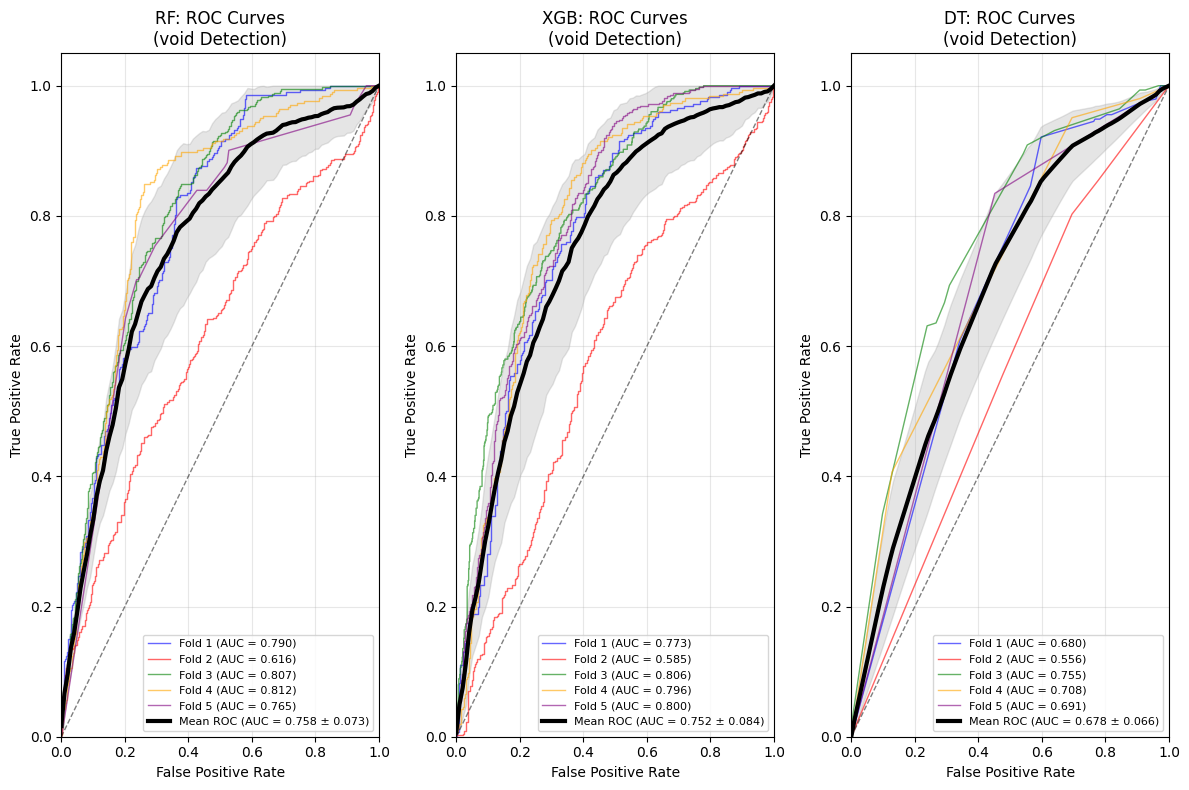

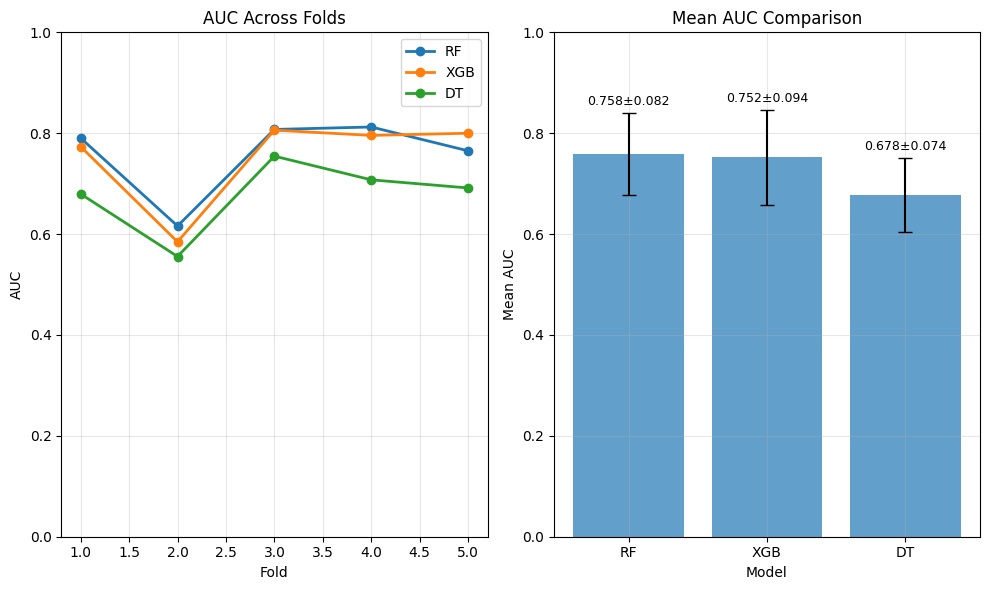

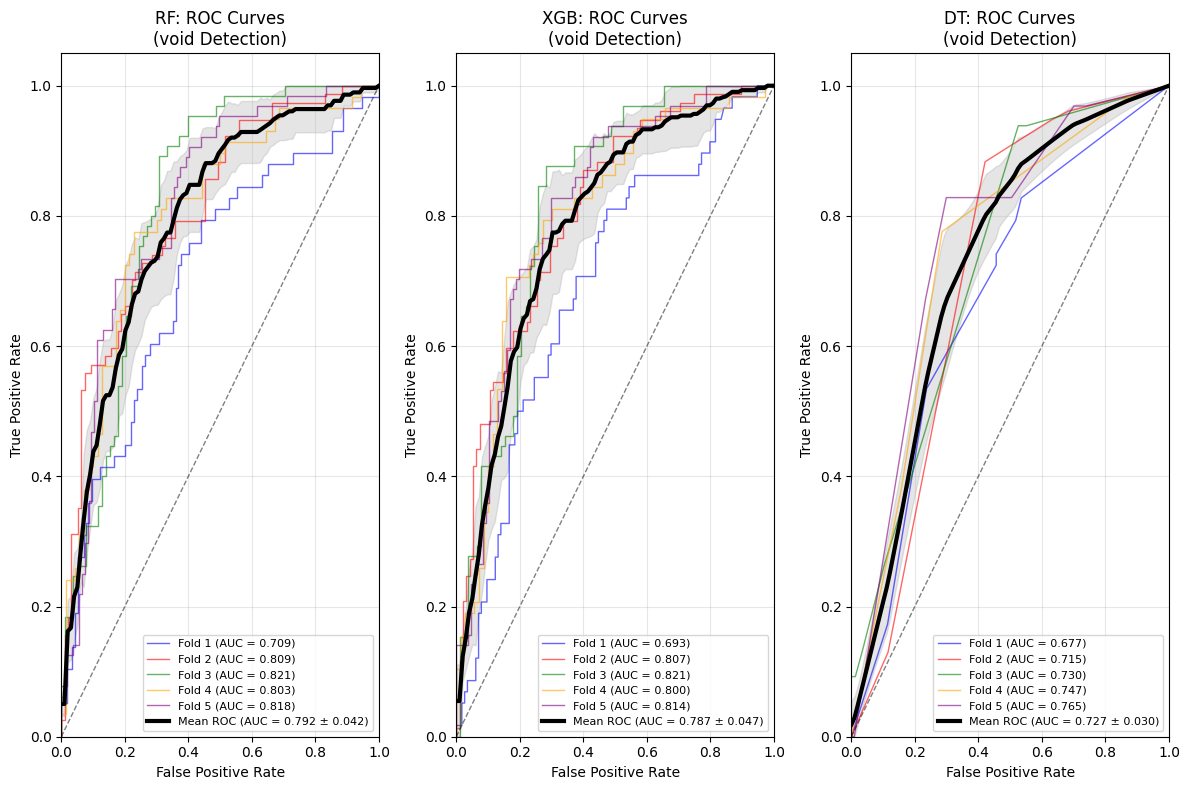

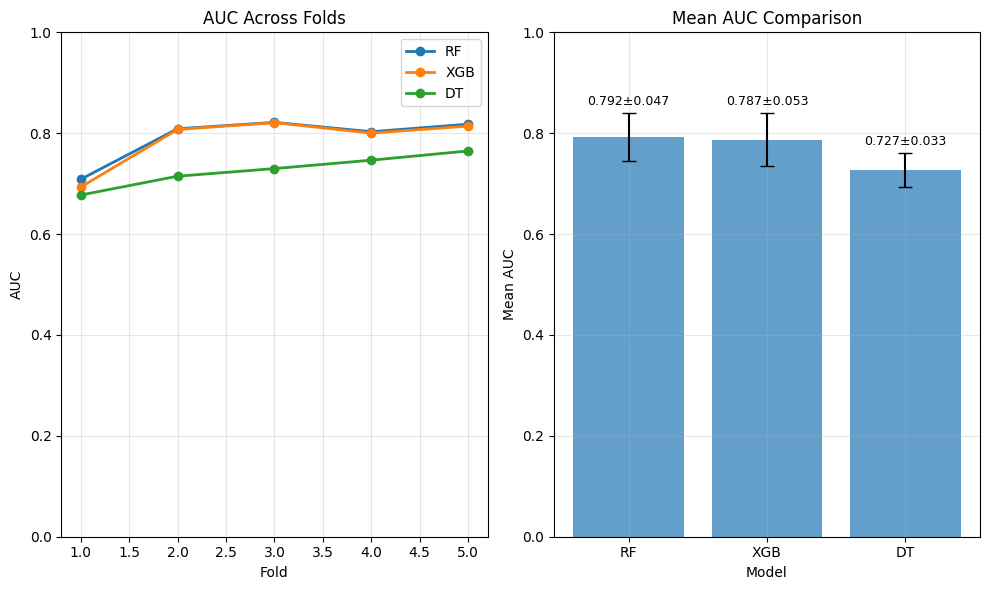

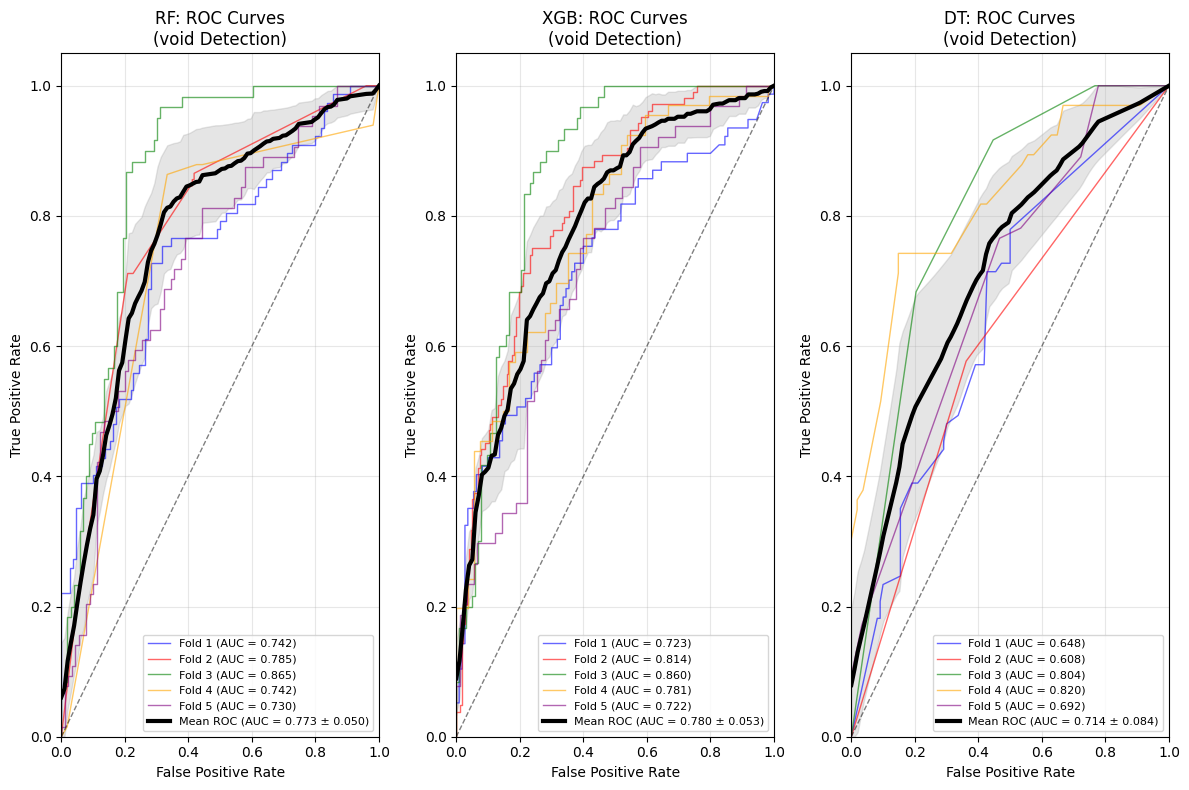

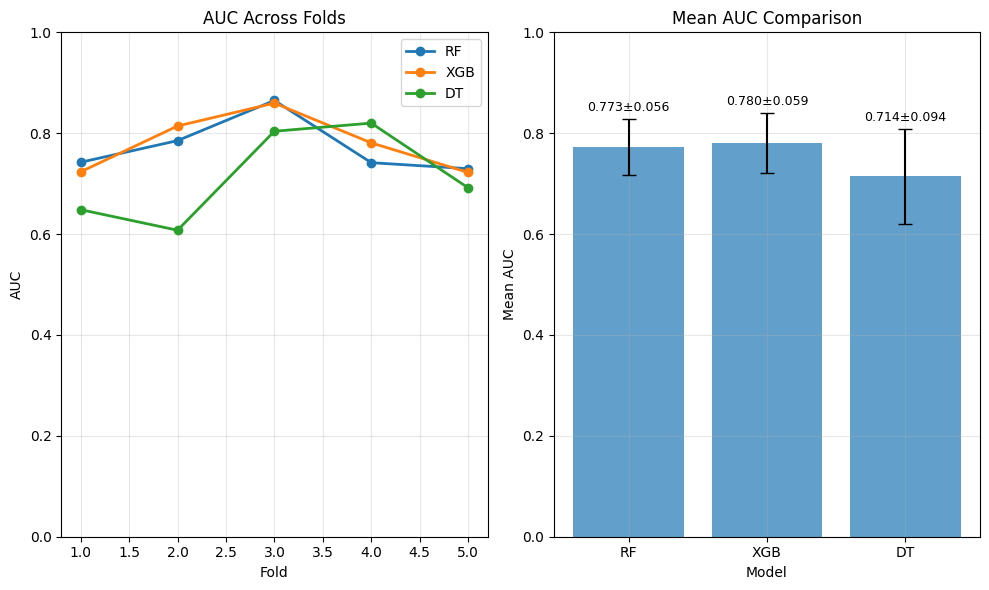

In [8]:
all_results = {}
for file in files:
    data_path = os.path.join(base_path, file)
    features = pd.read_csv(data_path)
    features.drop(columns=['center_time', 'start_time', 'end_time'], inplace=True)
    details = file.split('_')
    exp_name = f"{details[3]}_{details[-1].replace('.csv', '')}"
    print(f"Nested cross-validation for {exp_name}")
    
    X = features.drop(columns=['label', 'experiment_id'])
    y = features['label']
    groups = features['experiment_id']
    
    results_df = nested_cv(X, y, groups, exp_name)

    # Save to csv
    results_df.to_csv(f'/home/edumaba/Public/MPhil_Thesis/Code/wear_uropatch/pipeline/nested_cv/results/two_class/metrics/{exp_name}_nested_cv_zwei.csv')